# Credit Card Approval Prediction Project


#### Problem Statement - Banks were not able to find potential customers for their credit cards.

#### Target Stakeholders - Commercial banks or Third parties who sell credit cards of multiple banks

In [1]:
# installing required libraries

# !pip install imbalanced-learn
# !pip install xgboost
# !pip install catboost

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import missingno as msno # library to examine missing values
import warnings
warnings.filterwarnings('ignore')

# importing imputing library
from sklearn.impute import SimpleImputer
 
#importing scaling and encoding library
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#importing feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_classif

#importing column transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


#importing train test split
from sklearn.model_selection import train_test_split

# importing ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC

#importing metrics score libraries
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             classification_report,roc_auc_score)
from sklearn.metrics import precision_score,recall_score

# importing sampling library
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline

# for displaying pipeline diagram
from sklearn import set_config
set_config(display='diagram')

In [3]:
# changing directory to file path

os.chdir('F:\Odin school\capstone project\Dataset')

In [4]:
# reading csv file

data = pd.read_csv('Credit_card.csv')

In [5]:
# reading lable csv file

lable_data = pd.read_csv('Credit_card_label.csv')

In [6]:
# Checking shape of data

data.shape

(1548, 18)

In [7]:
# Checking shape of data

lable_data.shape

(1548, 2)

In [8]:
#top 5 rows

data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [9]:
#top 5 rows

lable_data.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [10]:
# merging data and label_data

credit_card =data.merge(lable_data,on='Ind_ID')

In [11]:
#top 5 rows

credit_card.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [12]:
# Checking shape of data

credit_card.shape

(1548, 19)

## About Dataset Features :





    Ind_ID: Client ID

    Gender: Gender information

    Car_owner: Having car or not

    Property_Owner: Having property or not

    Children: Count of children

    Annual_Income: Annual income

    Type_Income: Income type

    Education: Education level

    Marital_Status: Marital_status

    Housing_Type: Living style

    Birthday_Count: Use backward count from current day (0), -1 means yesterday.

    Employed_Days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

    Mobile_Phone: Any mobile phone

    Work_Phone: Any work phone

    Phone: Any phone number

    Email_Id: Any email ID (Yes-0 or No-1)

    Type_Occupation: Occupation

    Family_Members: Family size
    
    Label: 0 is application approved and 1 is application rejected. 




In [13]:
# columns of data

credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [14]:
# Correction in name of columns - as there are few columns with Uppercase or few lowercase

credit_card.rename(columns={'Ind_ID':'Ind_Id','GENDER':'Gender','Propert_Owner':'Property_Owner', 'CHILDREN':'Children'
                           ,'Annual_income': 'Annual_Income', 'EDUCATION':'Education'
                           ,'Marital_status':'Marital_Status','Housing_type':'Housing_Type'
                           , 'Birthday_count':'Birthday_Count', 'Employed_days':'Employed_Days'
                           ,'Mobile_phone':'Mobile_Phone'
                           , 'EMAIL_ID':'Email_Id','label':'Label'},inplace=True)

In [15]:
# information about data

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_Income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_Status   1548 non-null   object 
 9   Housing_Type     1548 non-null   object 
 10  Birthday_Count   1526 non-null   float64
 11  Employed_Days    1548 non-null   int64  
 12  Mobile_Phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_Id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
# descriptive stats

credit_card.describe()

Ind_Id     Children  Annual_Income  Birthday_Count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_Days  Mobile_Phone   Work_Phone        Phone     Email_Id  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        Label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

In [17]:
# duplicate values

credit_card.duplicated().sum()

0

In [18]:
# checking null values

credit_card.isnull().sum()

Ind_Id               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

In [19]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label'],
      dtype='object')

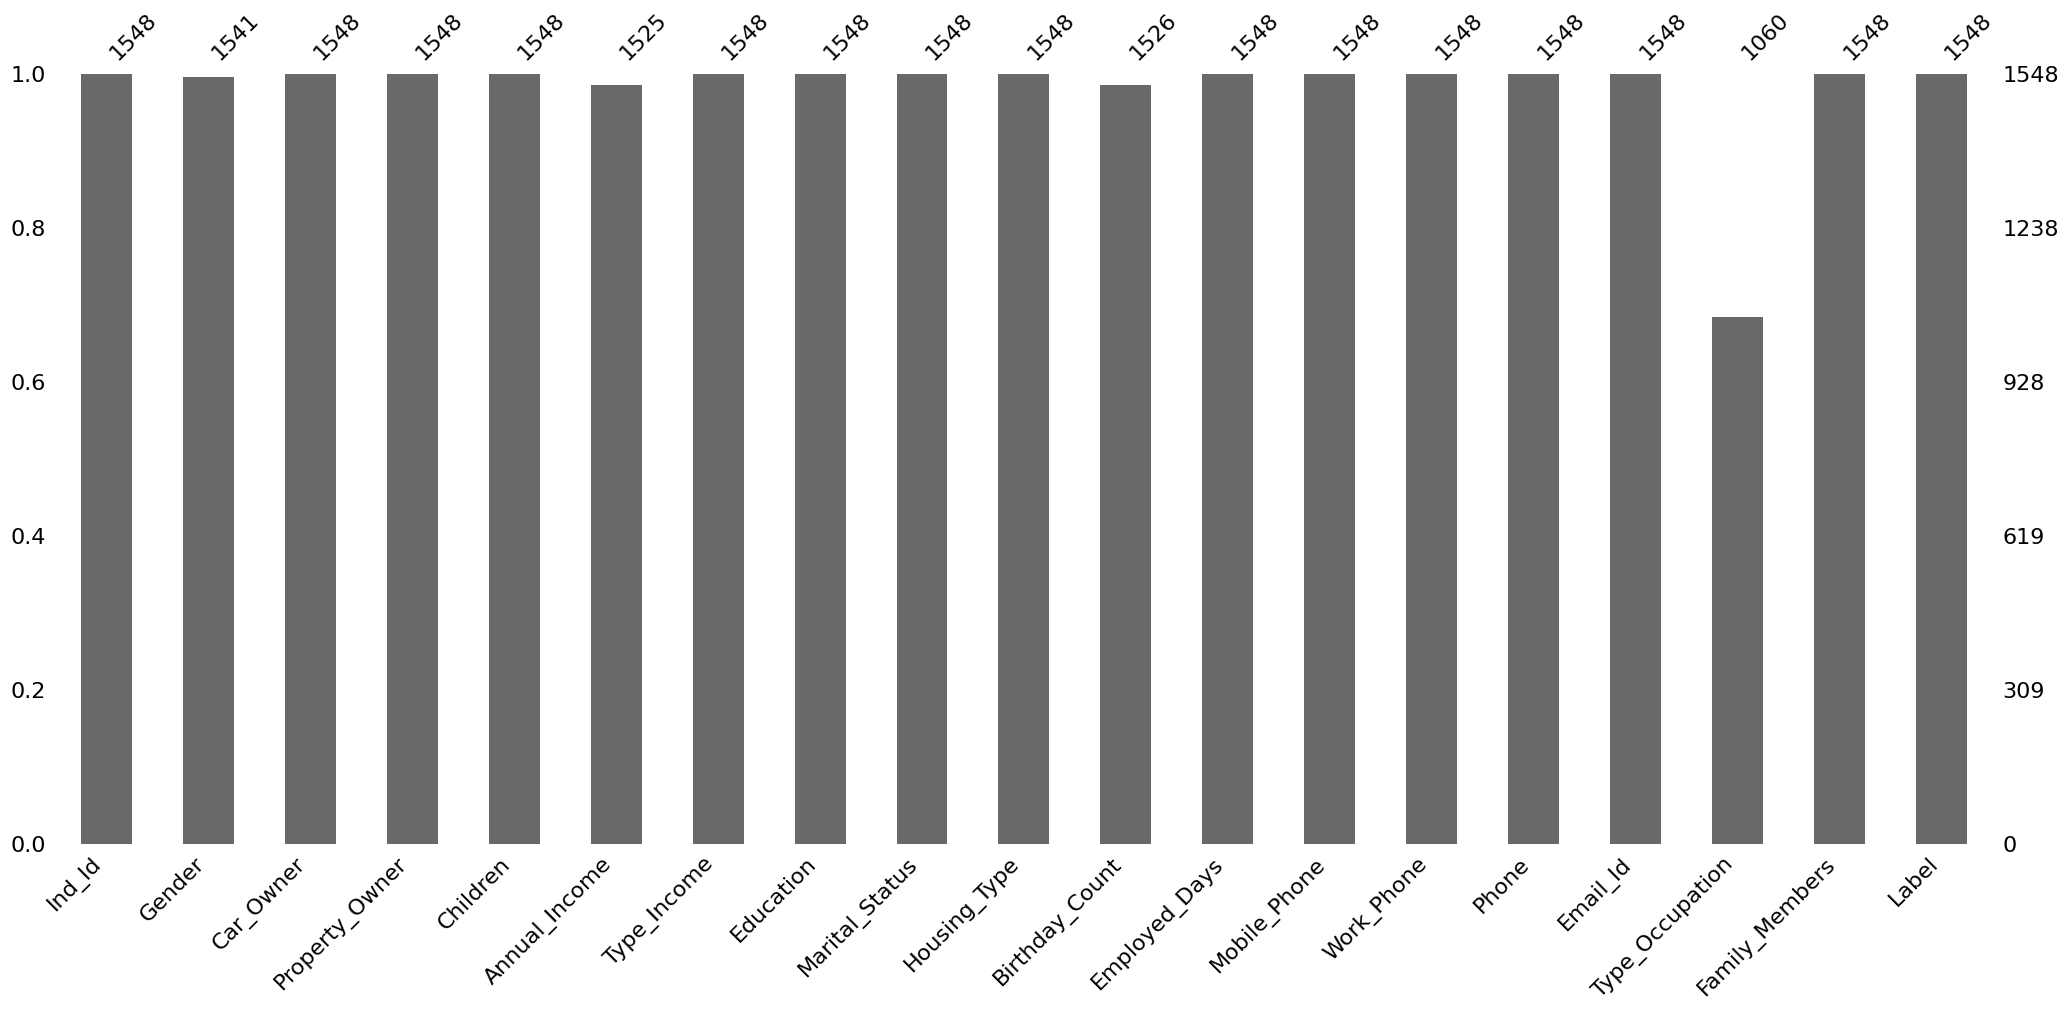

In [20]:
# creating bar plot to see the missing values

msno.bar(credit_card)
plt.show()

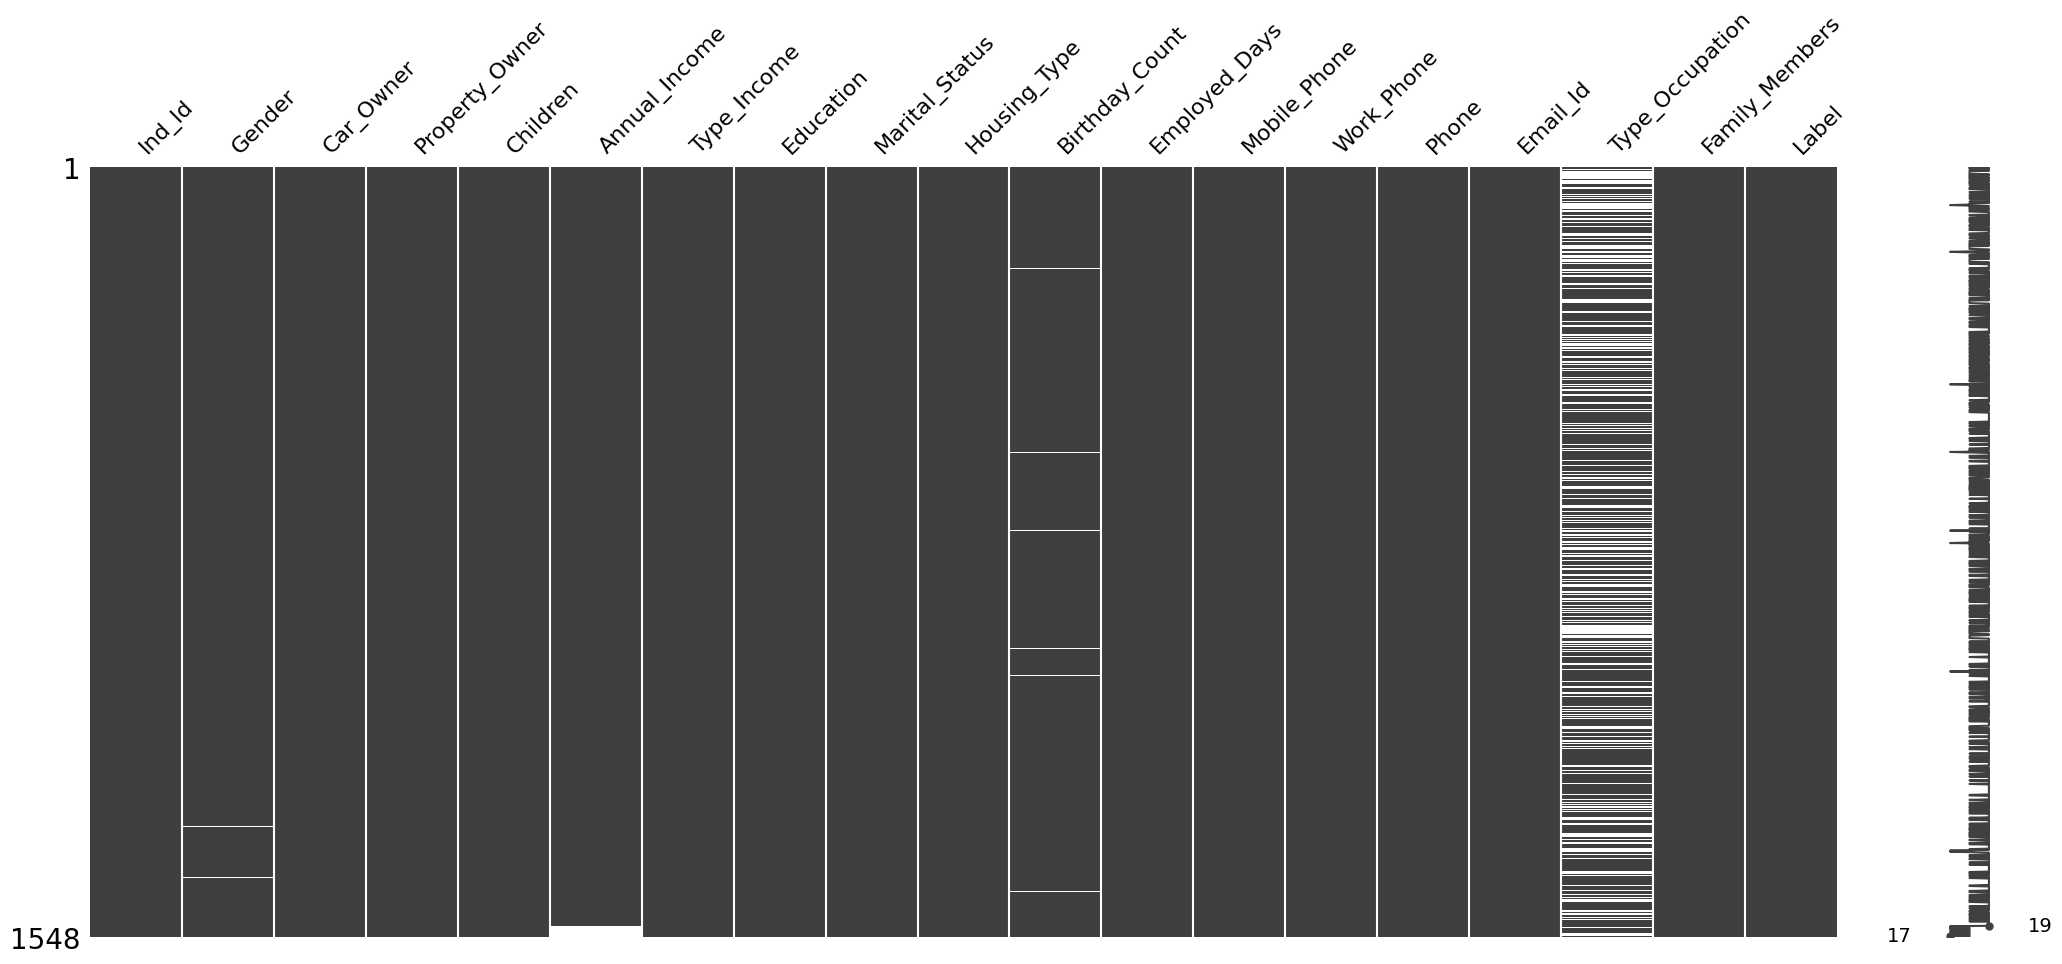

In [21]:
# creating matrix plot to see the missing values pattern

msno.matrix(credit_card.sort_values('Annual_Income'))
plt.show()

- As per Bar and matrix plot- there is no such missing pattern
- Gender column has 7 missing values
- Annual_income columns has 23 missing values
- Birthday_count column has 22 missing values
- Type_Occupation has 488 missing values

## Handling Missing values

In [22]:
# Checking unique values count in 'Gender' column

credit_card['Gender'].value_counts()

Gender
F    973
M    568
Name: count, dtype: int64

In [23]:
# As most of the vaues are of 'F' in 'Gender'--will fill missing values by 'F'

credit_card['Gender']=credit_card['Gender'].fillna(credit_card['Gender'].mode()[0])

In [24]:
# Checking unique values count in 'Type_Occupation' column

credit_card['Type_Occupation'].value_counts(ascending=True)

Type_Occupation
Realty agents              2
IT staff                   2
HR staff                   3
Waiters/barmen staff       5
Secretaries                9
Low-skill Laborers         9
Private service staff     17
Cooking staff             21
Cleaning staff            22
Security staff            25
Accountants               44
Medicine staff            50
High skill tech staff     65
Drivers                   86
Sales staff              122
Managers                 136
Core staff               174
Laborers                 268
Name: count, dtype: int64

In [25]:
# Checking label value_counts as per Null values in Type_Occupation

credit_card[credit_card['Type_Occupation'].isnull()]['Label'].value_counts()

Label
0    431
1     57
Name: count, dtype: int64

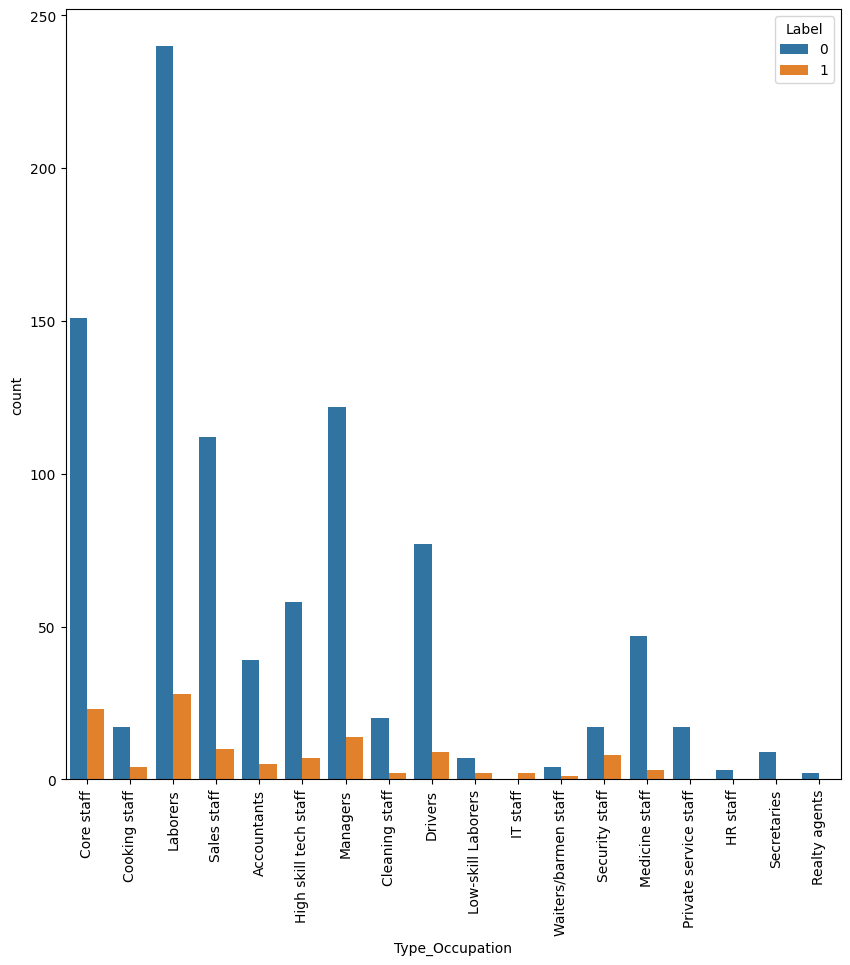

In [26]:
# Checking countplot- label value_counts as per Type_Occupation

plt.figure(figsize=(10,10))
sns.countplot(x='Type_Occupation', data= credit_card, hue= 'Label')
plt.xticks(rotation= 90)
plt.show()

- No clear insight is visible
- label is not dependent on Type_Occupation

In [27]:
# missing value percenatge in 'Type_Occupation' Column

missing_prcnt = credit_card['Type_Occupation'].isnull().sum()/ credit_card['Type_Occupation'].shape[0]
print('Percentage of missing values in "Type_Occupation" : ',missing_prcnt*100)

Percentage of missing values in "Type_Occupation" :  31.52454780361757


In [28]:
# filling 'Type_Occupation Column' null values with 'Other' 

credit_card["Type_Occupation"]= credit_card["Type_Occupation"].fillna('Other')

In [29]:
# top 5 columns

credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0            NaN   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [30]:
# Checking unique values count in 'Annual_Income' column

credit_card['Annual_Income'].value_counts(ascending=True)

Annual_Income
167400.0      1
105750.0      1
333000.0      1
37800.0       1
69372.0       1
           ... 
225000.0    119
157500.0    125
180000.0    137
112500.0    144
135000.0    170
Name: count, Length: 115, dtype: int64

In [31]:
# Checking Unique counts of 'Type_income' whose 'Annual_Income' is null 

credit_card[(credit_card['Annual_Income'].isnull())][[ 'Type_Income']].value_counts()

Type_Income         
Working                 11
Commercial associate     8
Pensioner                4
Name: count, dtype: int64

- 11 Working employees Annual_income is missing
- 8 Commercial associate employees Annual_income is missing
- 4 Pensioner Annual_income is missing

In [32]:
# Checking data whose 'Annual_Income' is null

credit_card[(credit_card['Annual_Income'].isnull())][['Gender',
       'Annual_Income', 'Type_Income',
       'Housing_Type', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone']]


Gender  Annual_Income           Type_Income         Housing_Type  \
3         F            NaN  Commercial associate    House / apartment   
12        F            NaN               Working    House / apartment   
27        F            NaN             Pensioner    House / apartment   
65        F            NaN             Pensioner    House / apartment   
76        M            NaN               Working    House / apartment   
107       M            NaN  Commercial associate  Municipal apartment   
125       F            NaN             Pensioner    House / apartment   
152       M            NaN  Commercial associate    House / apartment   
185       F            NaN               Working    House / apartment   
215       F            NaN  Commercial associate    House / apartment   
273       F            NaN               Working    House / apartment   
324       F            NaN  Commercial associate    House / apartment   
381       M            NaN  Commercial associate    House / apartment   
429       M            NaN  Commercial associate    House / apartment   
474       M            NaN               Working    House / apartment   
561       F            NaN               Working    House / apartment   
720       M            NaN               Working    House / apartment   
915       F            NaN             Pensioner    House / apartment   
1011      F            NaN               Working    House / apartment   
1263      M            NaN               Working    House / apartment   
1299      F            NaN               Working    House / apartment   
1386      M            NaN               Working    House / apartment   
1543      F            NaN  Commercial associate    House / apartment   

      Employed_Days  Mobile_Phone  Work_Phone  Phone  
3              -586             1           1      1  
12            -1002             1           1      1  
27           365243             1           0      1  
65           365243             1           0      0  
76             -137             1           0      0  
107            -606             1           0      1  
125          365243             1           0      0  
152           -4305             1           1      1  
185            -141             1           1      1  
215           -1477             1           0      0  
273           -1496             1           0      0  
324            -962             1           0      1  
381           -3653             1           0      0  
429           -3273             1           0      0  
474           -1931             1           0      1  
561           -1128             1           0      0  
720           -2589             1           0      0  
915          365243             1           0      1  
1011          -1526             1           0      0  
1263           -412             1           1      0  
1299          -3078             1           1      0  
1386          -1072             1           0      0  
1543          -2182             1           0      0

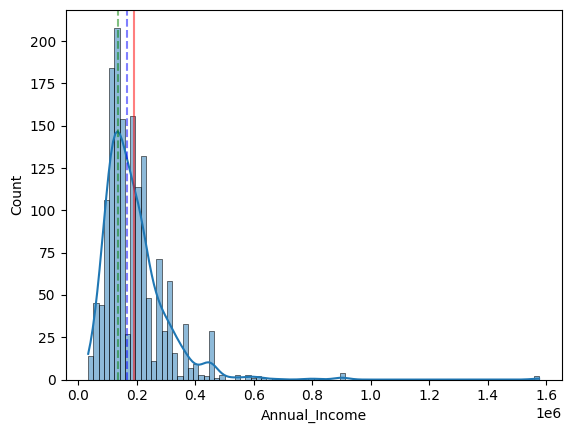

In [33]:
# Plotting histogram to check distribution of 'Annual_Income'

sns.histplot(x=credit_card['Annual_Income'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Annual_Income'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Annual_Income'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.axvline(x=credit_card['Annual_Income'].mode()[0],c='green',ls='--',alpha=0.5,label='Mode')
plt.show()

In [34]:
# Creating dataframe credit of original data -'credit_card'

credit= credit_card.copy()

In [35]:
# filling null values using median as there are outliers in the data

credit['Annual_Income']= credit_card['Annual_Income']=credit_card['Annual_Income'].fillna(credit_card['Annual_Income'].median())

In [36]:
# shape of credit dataframe

credit.shape

(1548, 19)

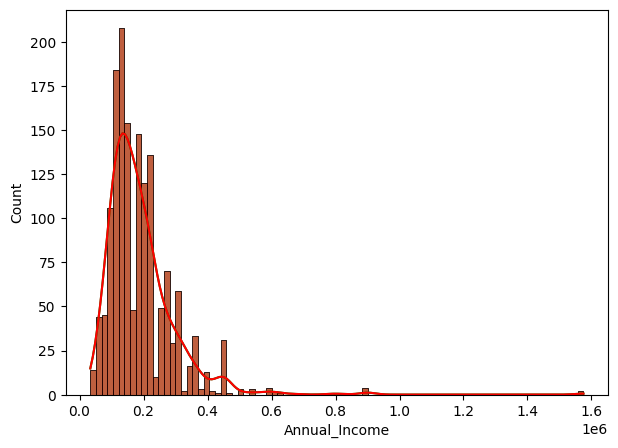

In [37]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with median

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Annual_Income' 

sns.histplot(credit_card['Annual_Income'],color='green',ax=ax, kde= True)


# new data without missing values in 'Annual_Income' 

sns.histplot(credit['Annual_Income'],color='red', ax=ax, kde= True)

plt.show()

In [38]:
# saving new data in old dataframe only

credit_card=credit.copy()

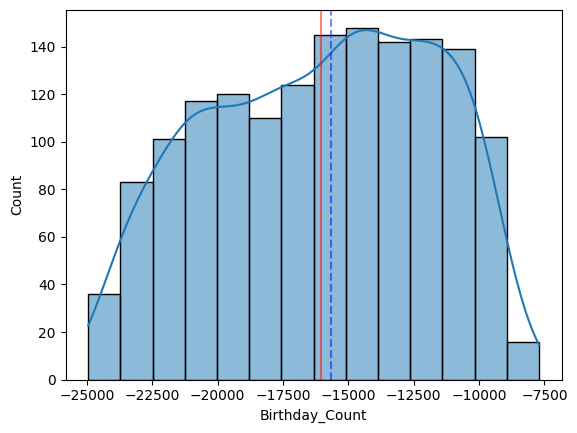

In [39]:
# Plotting histogram to check distribution of 'Birthday_Count'

sns.histplot(x=credit_card['Birthday_Count'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Birthday_Count'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Birthday_Count'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.show()

In [40]:
# checking value_counts

credit_card['Birthday_Count'].value_counts(ascending=False,sort= True)

Birthday_Count
-13557.0    5
-22655.0    5
-14523.0    5
-21363.0    5
-17454.0    4
           ..
-11729.0    1
-15994.0    1
-13456.0    1
-19532.0    1
-16601.0    1
Name: count, Length: 1270, dtype: int64

In [41]:
# null values

credit.isnull().sum()

Ind_Id              0
Gender              0
Car_Owner           0
Property_Owner      0
Children            0
Annual_Income       0
Type_Income         0
Education           0
Marital_Status      0
Housing_Type        0
Birthday_Count     22
Employed_Days       0
Mobile_Phone        0
Work_Phone          0
Phone               0
Email_Id            0
Type_Occupation     0
Family_Members      0
Label               0
dtype: int64

In [42]:
# filling null values using median as outliers are in  data

credit['Birthday_Count']=credit_card['Birthday_Count'].fillna(credit_card['Birthday_Count'].median())

In [43]:
credit.isnull().sum()

Ind_Id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Birthday_Count     0
Employed_Days      0
Mobile_Phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

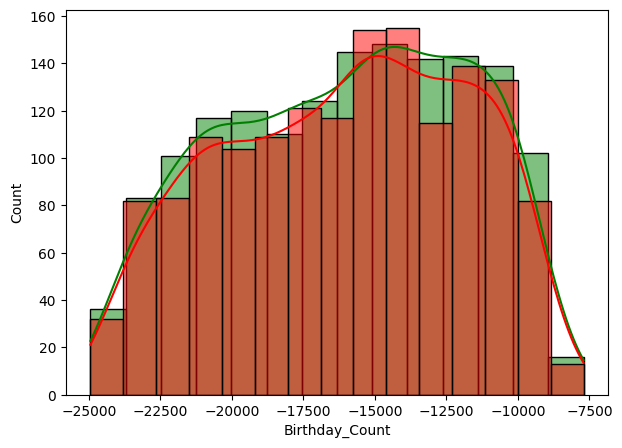

In [44]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with median

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Birthday_Count' 

sns.histplot(credit_card['Birthday_Count'],color='green',ax=ax, kde= True)


# new data without missing values in 'Birthday_Count'  

sns.histplot(credit['Birthday_Count'],color='red', ax=ax, kde= True)

plt.show()

- As kde plot is not overlapping -There is change in distribution after treating missing value.
- I will try to relace missing value with mode for 'Birthday_Count'

In [45]:
# filling null values using mode as outliers in  data

credit['Birthday_Count']=credit_card['Birthday_Count'].fillna(credit_card['Birthday_Count'].mode()[0])

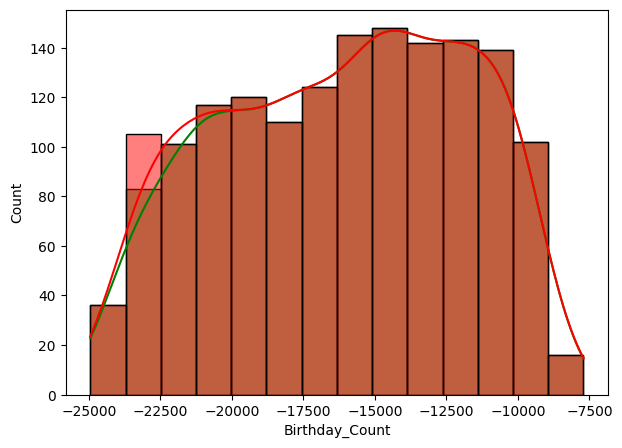

In [46]:
# checking histogram and kde distribution plot 
# for identifying if there is any impact on distribution plot after filling missing values with mode

fig=plt.figure(figsize=(7,5))
ax= fig.add_subplot(111)

# original data with missing values in 'Birthday_Count' 

sns.histplot(credit_card['Birthday_Count'],color='green',ax=ax, kde= True)


# new data without missing values in 'Birthday_Count'  

sns.histplot(credit['Birthday_Count'],color='red', ax=ax, kde= True)

plt.show()

- using mode disribution of data is not changing so much, will go with this one.

In [47]:
# saving new data in old dataframe only

credit_card=credit.copy()

In [48]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -22655.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [49]:
#shape

credit_card.shape

(1548, 19)

#

## 1.How many numerical and categorical columns are in data ? name of those columns

In [50]:
# Function to find categorical and numerical category from dataframe

def column_category(dataframe):

    num_col= list(dataframe.select_dtypes(include=np.number).columns)   # numerical column list
    cat_col =list(dataframe.select_dtypes(include=object).columns)      # categorical column list

    result1 = {"No. of numerical columns are" : len(num_col)}        # count of numerical columns dictionary
    name1 = {"Numerical Names" : num_col}                            # numerical names dictionary
    result2 = {"No. of categorical columns are":len(cat_col)}        # count of categorical columns- dictionary                       
    name2= {"Categorical Names" : cat_col}                           # Categorical names dictionary
    return result1,name1,result2,name2
    

In [51]:
# numerical and category column count and their names in credit card data

column_category(credit_card)

({'No. of numerical columns are': 11},
 {'Numerical Names': ['Ind_Id',
   'Children',
   'Annual_Income',
   'Birthday_Count',
   'Employed_Days',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Property_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [52]:
# All numeric columns are :

num_col = column_category(credit_card)[1]['Numerical Names']
num_col

['Ind_Id',
 'Children',
 'Annual_Income',
 'Birthday_Count',
 'Employed_Days',
 'Mobile_Phone',
 'Work_Phone',
 'Phone',
 'Email_Id',
 'Family_Members',
 'Label']

In [53]:
# All Categirical columns are :

cat_col = column_category(credit_card)[3]['Categorical Names']
cat_col 

['Gender',
 'Car_Owner',
 'Property_Owner',
 'Type_Income',
 'Education',
 'Marital_Status',
 'Housing_Type',
 'Type_Occupation']

#

- Work_Phone, Phone, EMAIL_ID are categorical columns only- converted to numeric values
 - Hence, Numerical columns are - 8 , Categorical colmns are - 11

## Dealing with Categorical columns

In [54]:
cat_col

['Gender',
 'Car_Owner',
 'Property_Owner',
 'Type_Income',
 'Education',
 'Marital_Status',
 'Housing_Type',
 'Type_Occupation']

In [55]:
credit_card['Gender'].value_counts()

Gender
F    980
M    568
Name: count, dtype: int64

In [56]:
credit_card['Car_Owner'].value_counts()

Car_Owner
N    924
Y    624
Name: count, dtype: int64

In [57]:
credit_card['Property_Owner'].value_counts()

Property_Owner
Y    1010
N     538
Name: count, dtype: int64

In [58]:
credit_card['Type_Income'].value_counts()

Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64

In [59]:
credit_card['Education'].value_counts()

Education
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

In [60]:
credit_card['Marital_Status'].value_counts()

Marital_Status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64

In [61]:
credit_card['Housing_Type'].value_counts()

Housing_Type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64

In [62]:
credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status       Housing_Type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_Count  Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -22655.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  Label  
0           Other               2      1  
1           Other               2      1  
2           Other               2      1  
3           Other               2      1  
4           Other               2      1

In [63]:
credit_card['Housing_Type']

0       House / apartment
1       House / apartment
2       House / apartment
3       House / apartment
4       House / apartment
              ...        
1543    House / apartment
1544    House / apartment
1545    House / apartment
1546    House / apartment
1547    House / apartment
Name: Housing_Type, Length: 1548, dtype: object

In [64]:
# # function to correct name in categorical column

def name_change(x):
    if (x == 'House / apartment') | (x=='Single / not married') | (x=='Secondary / secondary special') :
       x= x.split(' /')[0].strip()      
    return x

In [65]:
# changing name of unique value in respective columns using name_change function

credit_card['Housing_Type'] = credit_card['Housing_Type'].apply(name_change)   # apply function works only on series not dataframe
credit_card['Marital_Status'] = credit_card['Marital_Status'].apply(name_change)
credit_card['Education']  = credit_card['Education'].apply(name_change)

## Feature Construction

In [66]:
# creating Column -Year of experience using Employed_Days

credit_card['Year_Of_Experience'] = np.where(credit_card['Employed_Days']<0,-round(credit_card['Employed_Days']/365,1),0)

In [67]:
credit_card['Year_Of_Experience'].value_counts()

Year_Of_Experience
0.0     261
1.4      21
0.4      21
0.6      21
2.5      19
       ... 
22.3      1
37.6      1
25.4      1
25.9      1
11.6      1
Name: count, Length: 227, dtype: int64

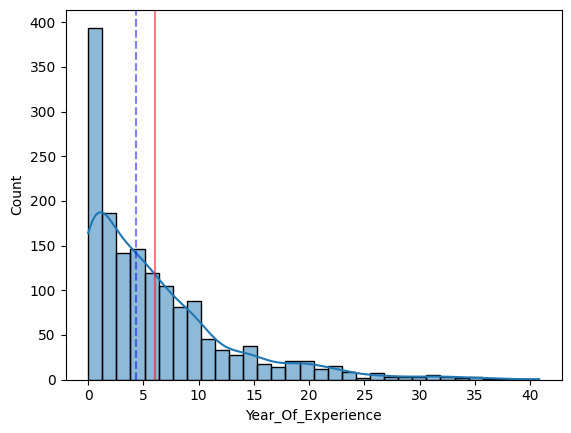

In [68]:
# Plotting histogram to check distribution of 'Year_Of_Experience'

sns.histplot(x=credit_card['Year_Of_Experience'], data= credit_card, kde =True)
plt.axvline(x=credit_card['Year_Of_Experience'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card['Year_Of_Experience'].median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.show()

In [69]:
# creating Column -Age using  Birthday_Count

credit_card['Age'] = -round(credit_card['Birthday_Count']/365,0)

In [70]:
# Column in data

credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [71]:

column_category(credit_card)

({'No. of numerical columns are': 13},
 {'Numerical Names': ['Ind_Id',
   'Children',
   'Annual_Income',
   'Birthday_Count',
   'Employed_Days',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label',
   'Year_Of_Experience',
   'Age']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Property_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [72]:
# shape of data

credit_card.shape

(1548, 21)

In [73]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

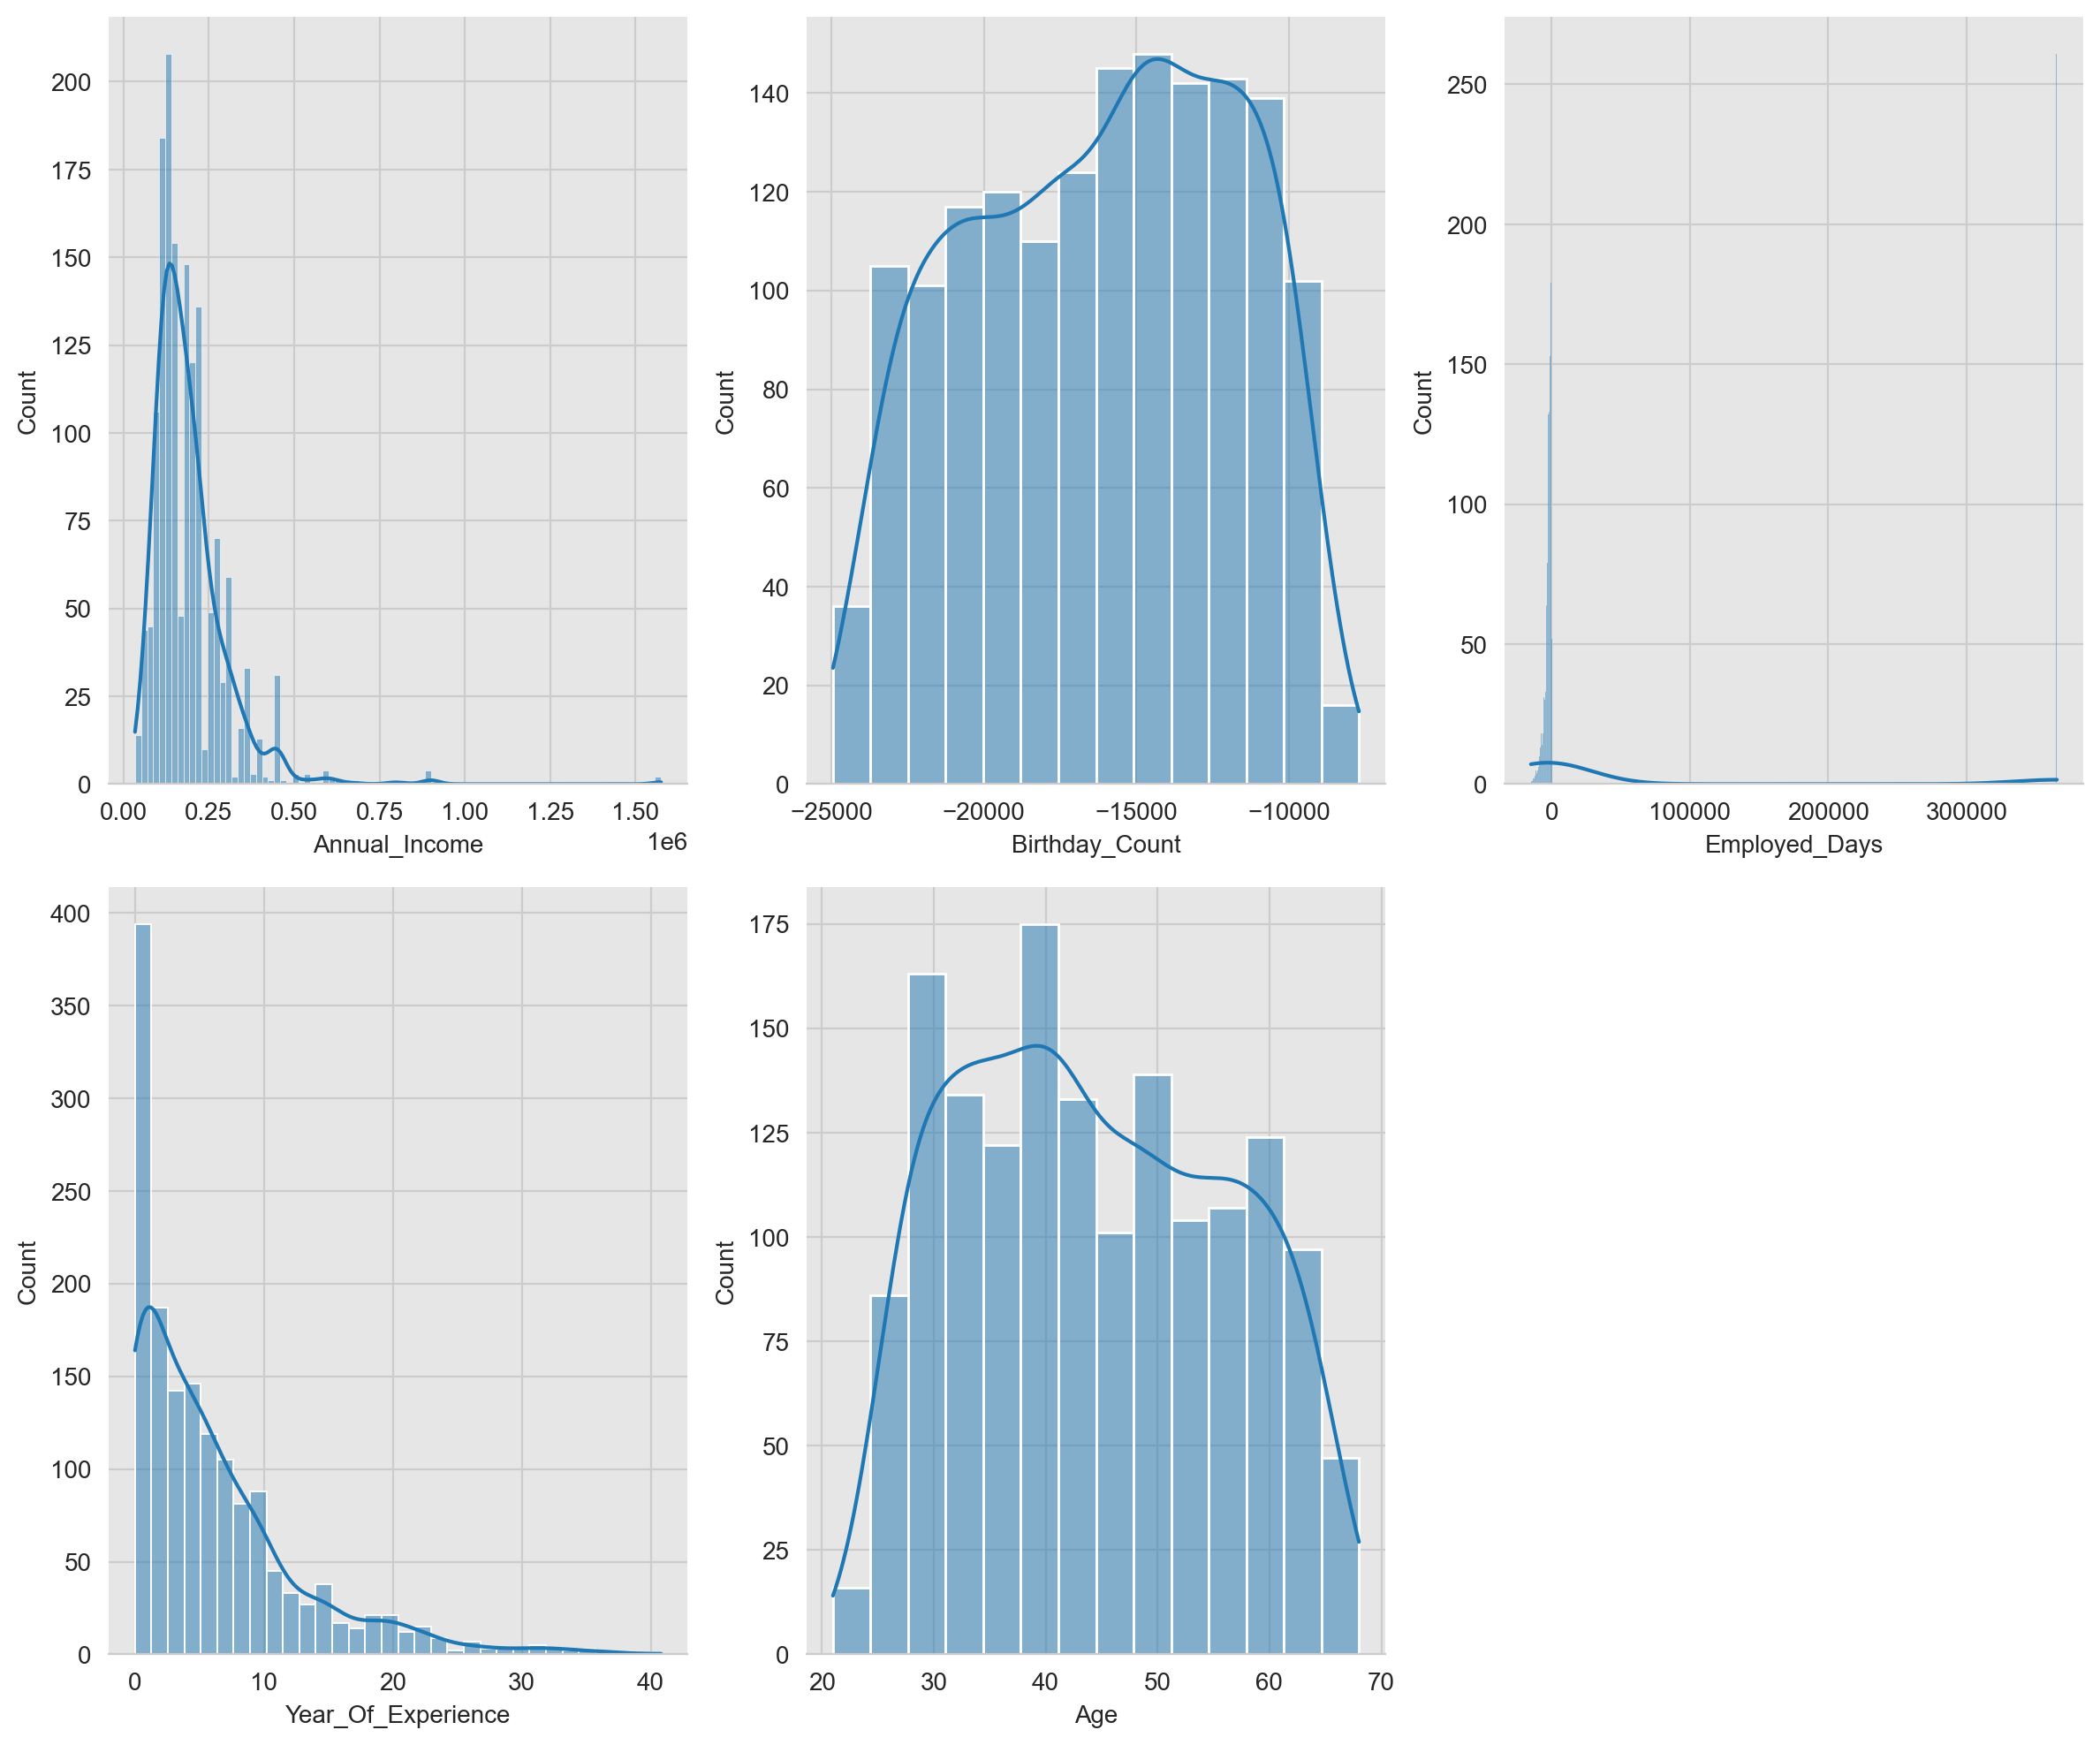

In [74]:
# Checking Distribution of new Columns


col = ['Annual_Income', 'Birthday_Count',
       'Employed_Days','Year_Of_Experience','Age']

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,10))

for x, y in enumerate (credit_card[col]):
    plt.subplot (2,3, x+1)
    bx = sns.histplot(x=credit_card[y],kde=True)
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

- Employed_days column has outliers- will see if column can be dropped as whole
- Year_of Experinece column is not normally distributed

In [75]:
credit_card.shape

(1548, 21)

## 2. Is data Balanced ?

In [76]:
credit_card['Label'].value_counts()

Label
0    1373
1     175
Name: count, dtype: int64

- Data is Imbalanced

## Data Visualization and Analysis

In [77]:
# correlation of variables with each other

credit_card.corr(numeric_only=True)



Ind_Id  Children  Annual_Income  Birthday_Count  \
Ind_Id              1.000000  0.032535       0.031019        0.022856   
Children            0.032535  1.000000       0.078543        0.274722   
Annual_Income       0.031019  0.078543       1.000000        0.108555   
Birthday_Count      0.022856  0.274722       0.108555        1.000000   
Employed_Days      -0.055396 -0.219095      -0.158966       -0.604739   
Mobile_Phone             NaN       NaN            NaN             NaN   
Work_Phone          0.085794  0.035014      -0.070944        0.164044   
Phone               0.008403 -0.004908      -0.006965       -0.035372   
Email_Id           -0.037923  0.025776       0.122354        0.170825   
Family_Members      0.016950  0.890248       0.051522        0.258972   
Label               0.016796 -0.021646       0.024425       -0.042532   
Year_Of_Experience  0.008177  0.074292       0.051321        0.026765   
Age                -0.022116 -0.273592      -0.108221       -0.999709   

                    Employed_Days  Mobile_Phone  Work_Phone     Phone  \
Ind_Id                  -0.055396           NaN    0.085794  0.008403   
Children                -0.219095           NaN    0.035014 -0.004908   
Annual_Income           -0.158966           NaN   -0.070944 -0.006965   
Birthday_Count          -0.604739           NaN    0.164044 -0.035372   
Employed_Days            1.000000           NaN   -0.231184 -0.003403   
Mobile_Phone                  NaN           NaN         NaN       NaN   
Work_Phone              -0.231184           NaN    1.000000  0.352439   
Phone                   -0.003403           NaN    0.352439  1.000000   
Email_Id                -0.118268           NaN   -0.009594  0.018105   
Family_Members          -0.238705           NaN    0.072228  0.005372   
Label                    0.031408           NaN   -0.007046 -0.000664   
Year_Of_Experience      -0.429916           NaN    0.120305  0.033388   
Age                      0.604537           NaN   -0.163380  0.034688   

                    Email_Id  Family_Members     Label  Year_Of_Experience  \
Ind_Id             -0.037923        0.016950  0.016796            0.008177   
Children            0.025776        0.890248 -0.021646            0.074292   
Annual_Income       0.122354        0.051522  0.024425            0.051321   
Birthday_Count      0.170825        0.258972 -0.042532            0.026765   
Employed_Days      -0.118268       -0.238705  0.031408           -0.429916   
Mobile_Phone             NaN             NaN       NaN                 NaN   
Work_Phone         -0.009594        0.072228 -0.007046            0.120305   
Phone               0.018105        0.005372 -0.000664            0.033388   
Email_Id            1.000000        0.035098  0.012921           -0.039198   
Family_Members      0.035098        1.000000 -0.030709            0.093448   
Label               0.012921       -0.030709  1.000000           -0.096765   
Year_Of_Experience -0.039198        0.093448 -0.096765            1.000000   
Age                -0.170645       -0.257536  0.042562           -0.026069   

                         Age  
Ind_Id             -0.022116  
Children           -0.273592  
Annual_Income      -0.108221  
Birthday_Count     -0.999709  
Employed_Days       0.604537  
Mobile_Phone             NaN  
Work_Phone         -0.163380  
Phone               0.034688  
Email_Id           -0.170645  
Family_Members     -0.257536  
Label               0.042562  
Year_Of_Experience -0.026069  
Age                 1.000000

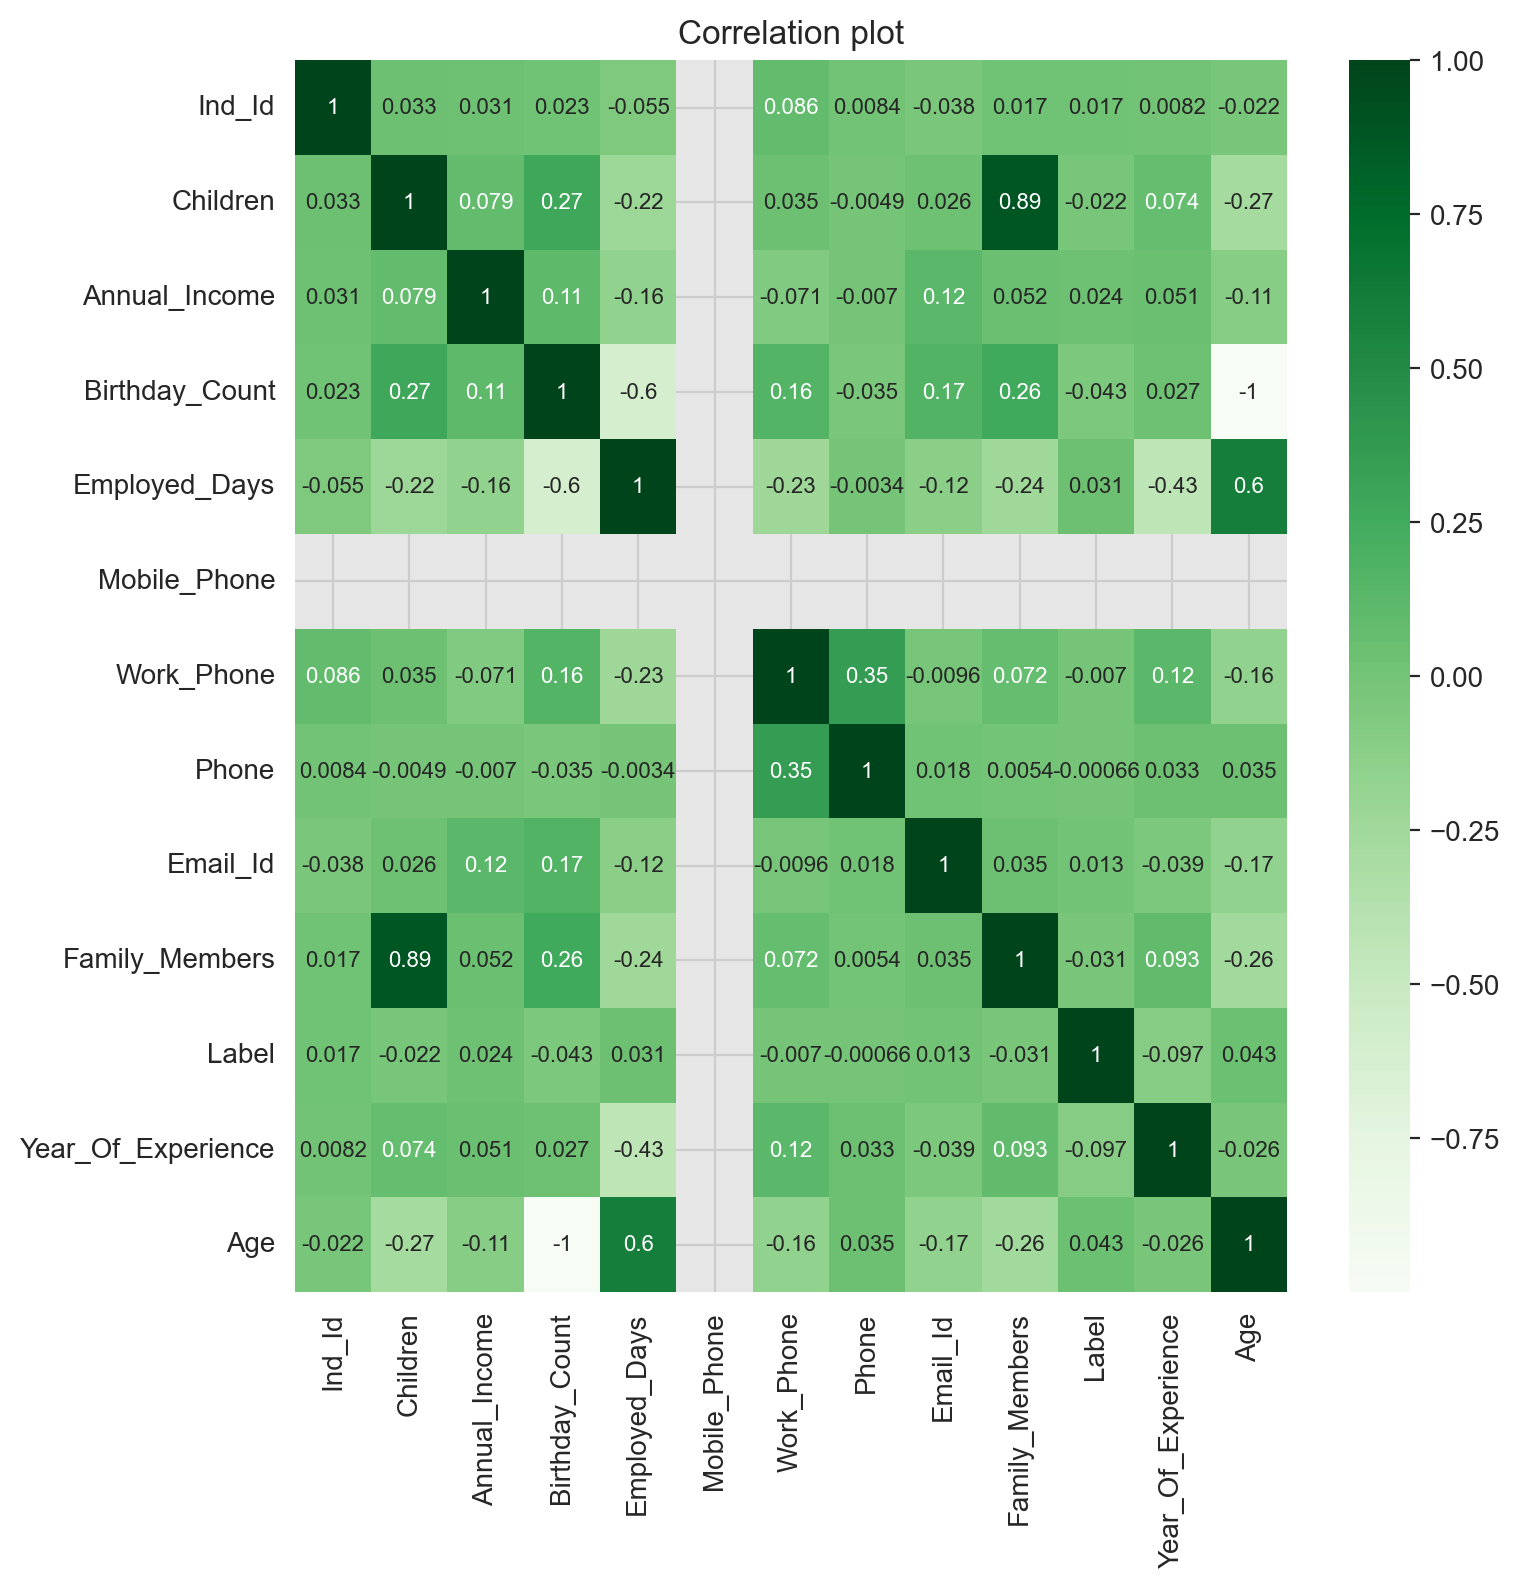

In [78]:
# visualising correlation- heatmap
 
plt.figure(figsize=(8,8))
sns.heatmap(credit_card.corr(numeric_only=True), annot= True, cmap= "Greens", annot_kws={"size" : 8})
plt.title('Correlation plot', loc = "center")
plt.show()
%config InlineBackend.figure_format='retina'


## Insight

- Children and Family_Members are highly correlated

In [79]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

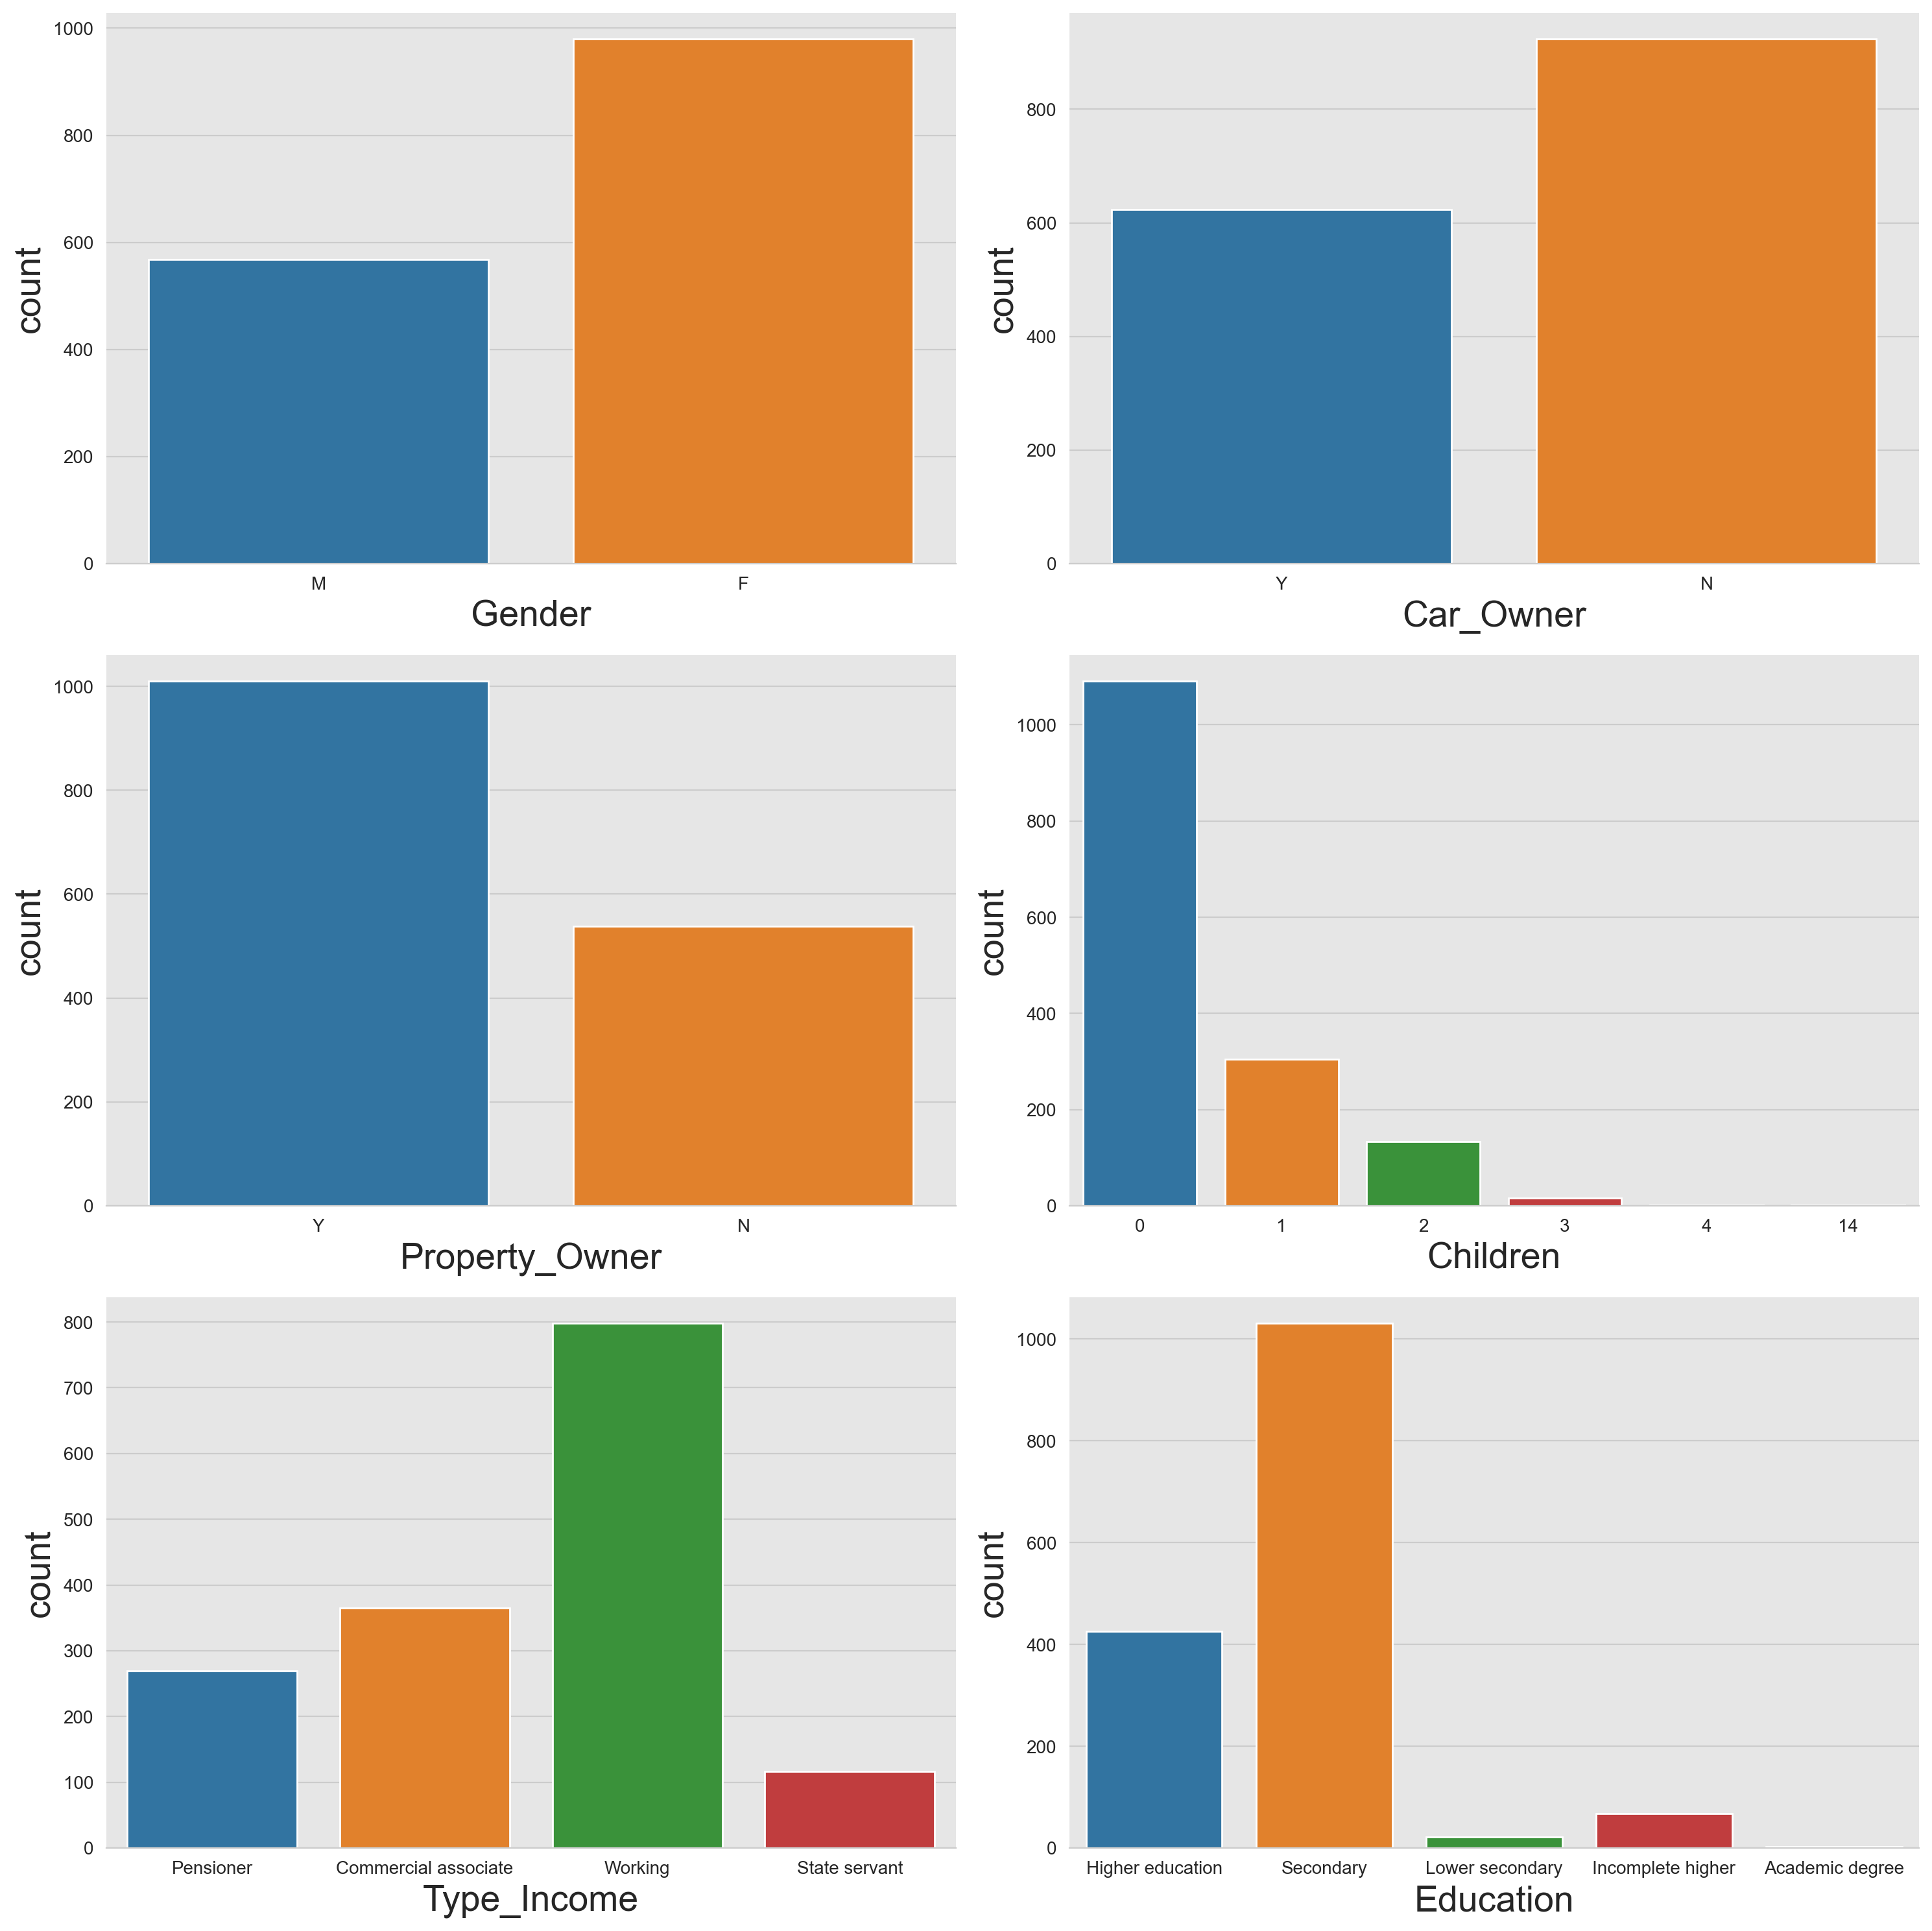

In [80]:
# Checking countplot of columns


col = ['Gender', 'Car_Owner', 'Property_Owner', 'Children'
       , 'Type_Income', 'Education']



sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (3,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight


- 1. Female users are more than male user(970 approx- F)
- 2. Most of the people doesn't have car (apprx 900)
- 3. Many people are owning their house(approx 1000)
- 4. People having 0 child are more (approx 1030)
- 5. People majorly are 'working' of Type_Income(780 approx), 2nd max - Commercial_associate,Minimum of all- State servannt
- 7. People having Education as 'Secondary' are maximum (1020 approx), Academic Degree are minimum

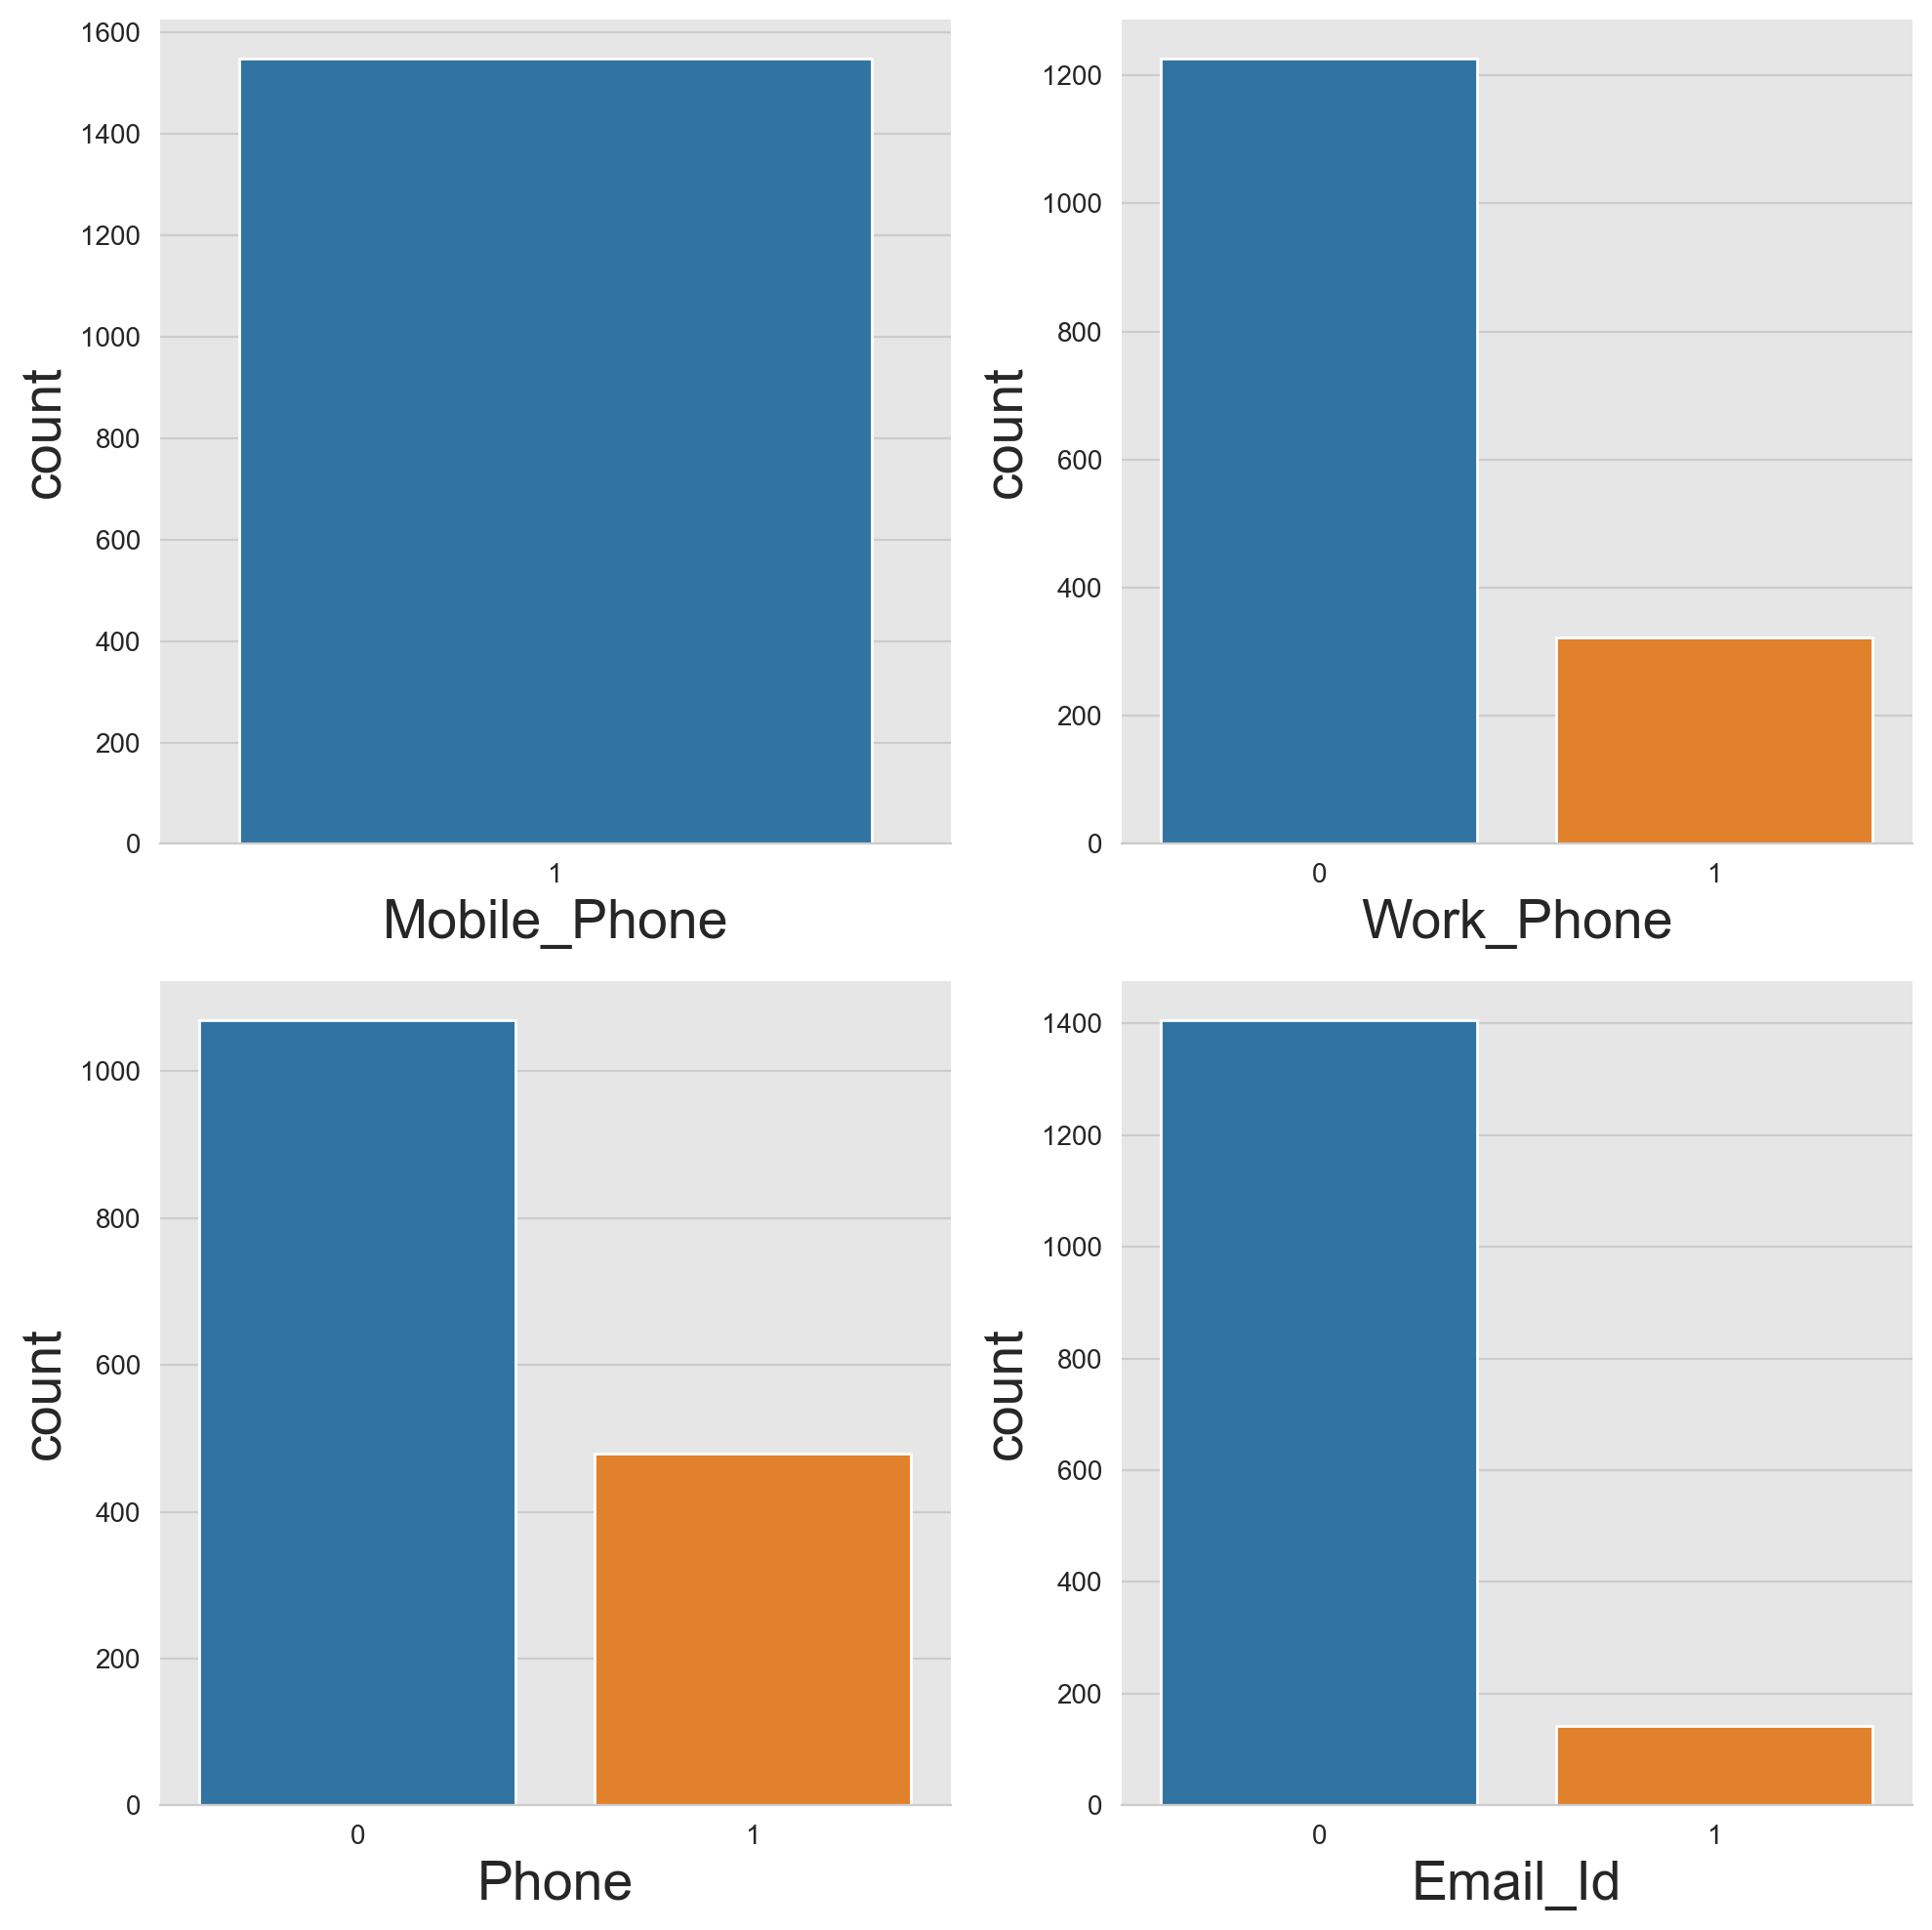

In [81]:
# Checking countplot of columns

col=['Mobile_Phone','Work_Phone', 'Phone', 
       'Email_Id']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,10))

for x, y in enumerate (credit_card[col]):

    plt.subplot (2,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [82]:
credit_card['Mobile_Phone'].value_counts()

Mobile_Phone
1    1548
Name: count, dtype: int64

In [83]:
credit_card['Work_Phone'].value_counts()

Work_Phone
0    1226
1     322
Name: count, dtype: int64

In [84]:
credit_card['Phone'].value_counts()

Phone
0    1069
1     479
Name: count, dtype: int64

In [85]:
credit_card['Email_Id'].value_counts()

Email_Id
0    1405
1     143
Name: count, dtype: int64

## Insight




- 1. All People have Mobile_Phone
- 2. 322 People out of 1548 has Work_Phone
- 3. 479 People out of 1548 has Phone
- 4. 143 People only using email out of 1548 people

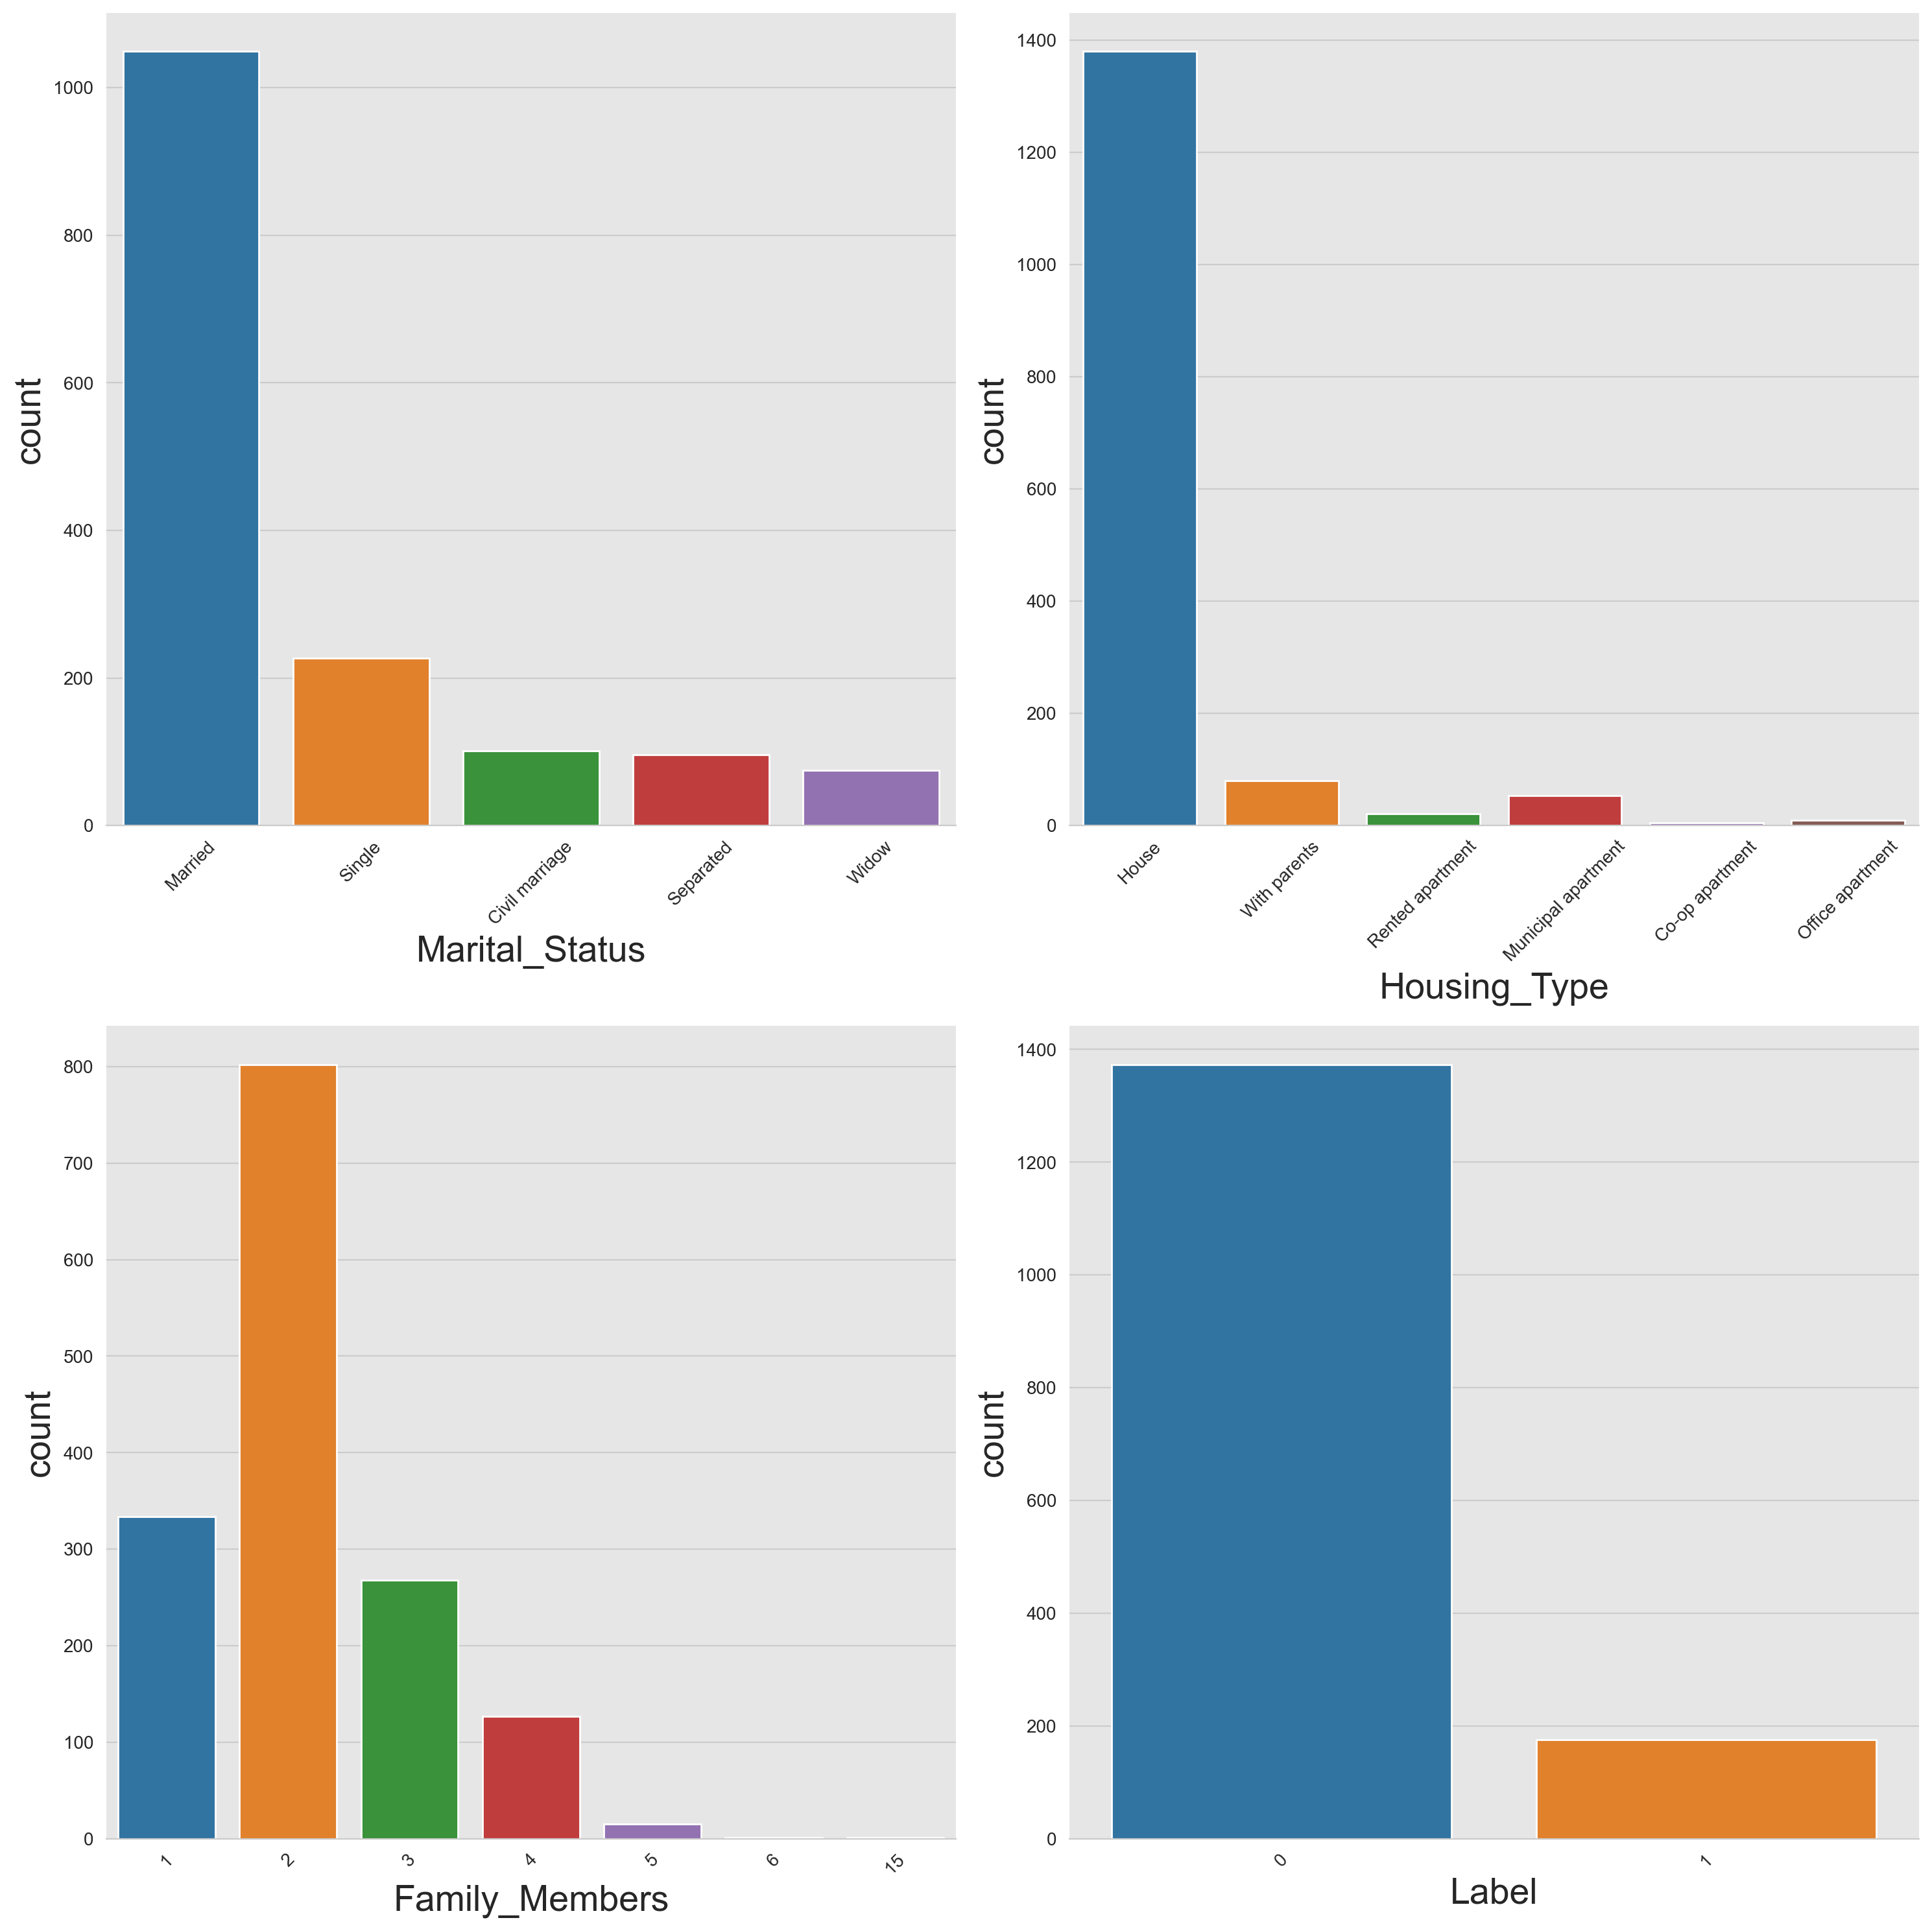

In [86]:
# Checking countplot of columns

col=['Marital_Status',
       'Housing_Type', 'Family_Members', 'Label']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (2,2, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    plt.xticks(rotation =45)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight



- 1. Most people are married
- 2. Most people have houses, co-op aparment people are less
- 3. Mostly family consists of 2 people, Family having 5 people are lesser
- 4. Approved applications are more than rejected ,(data is imbalanced)

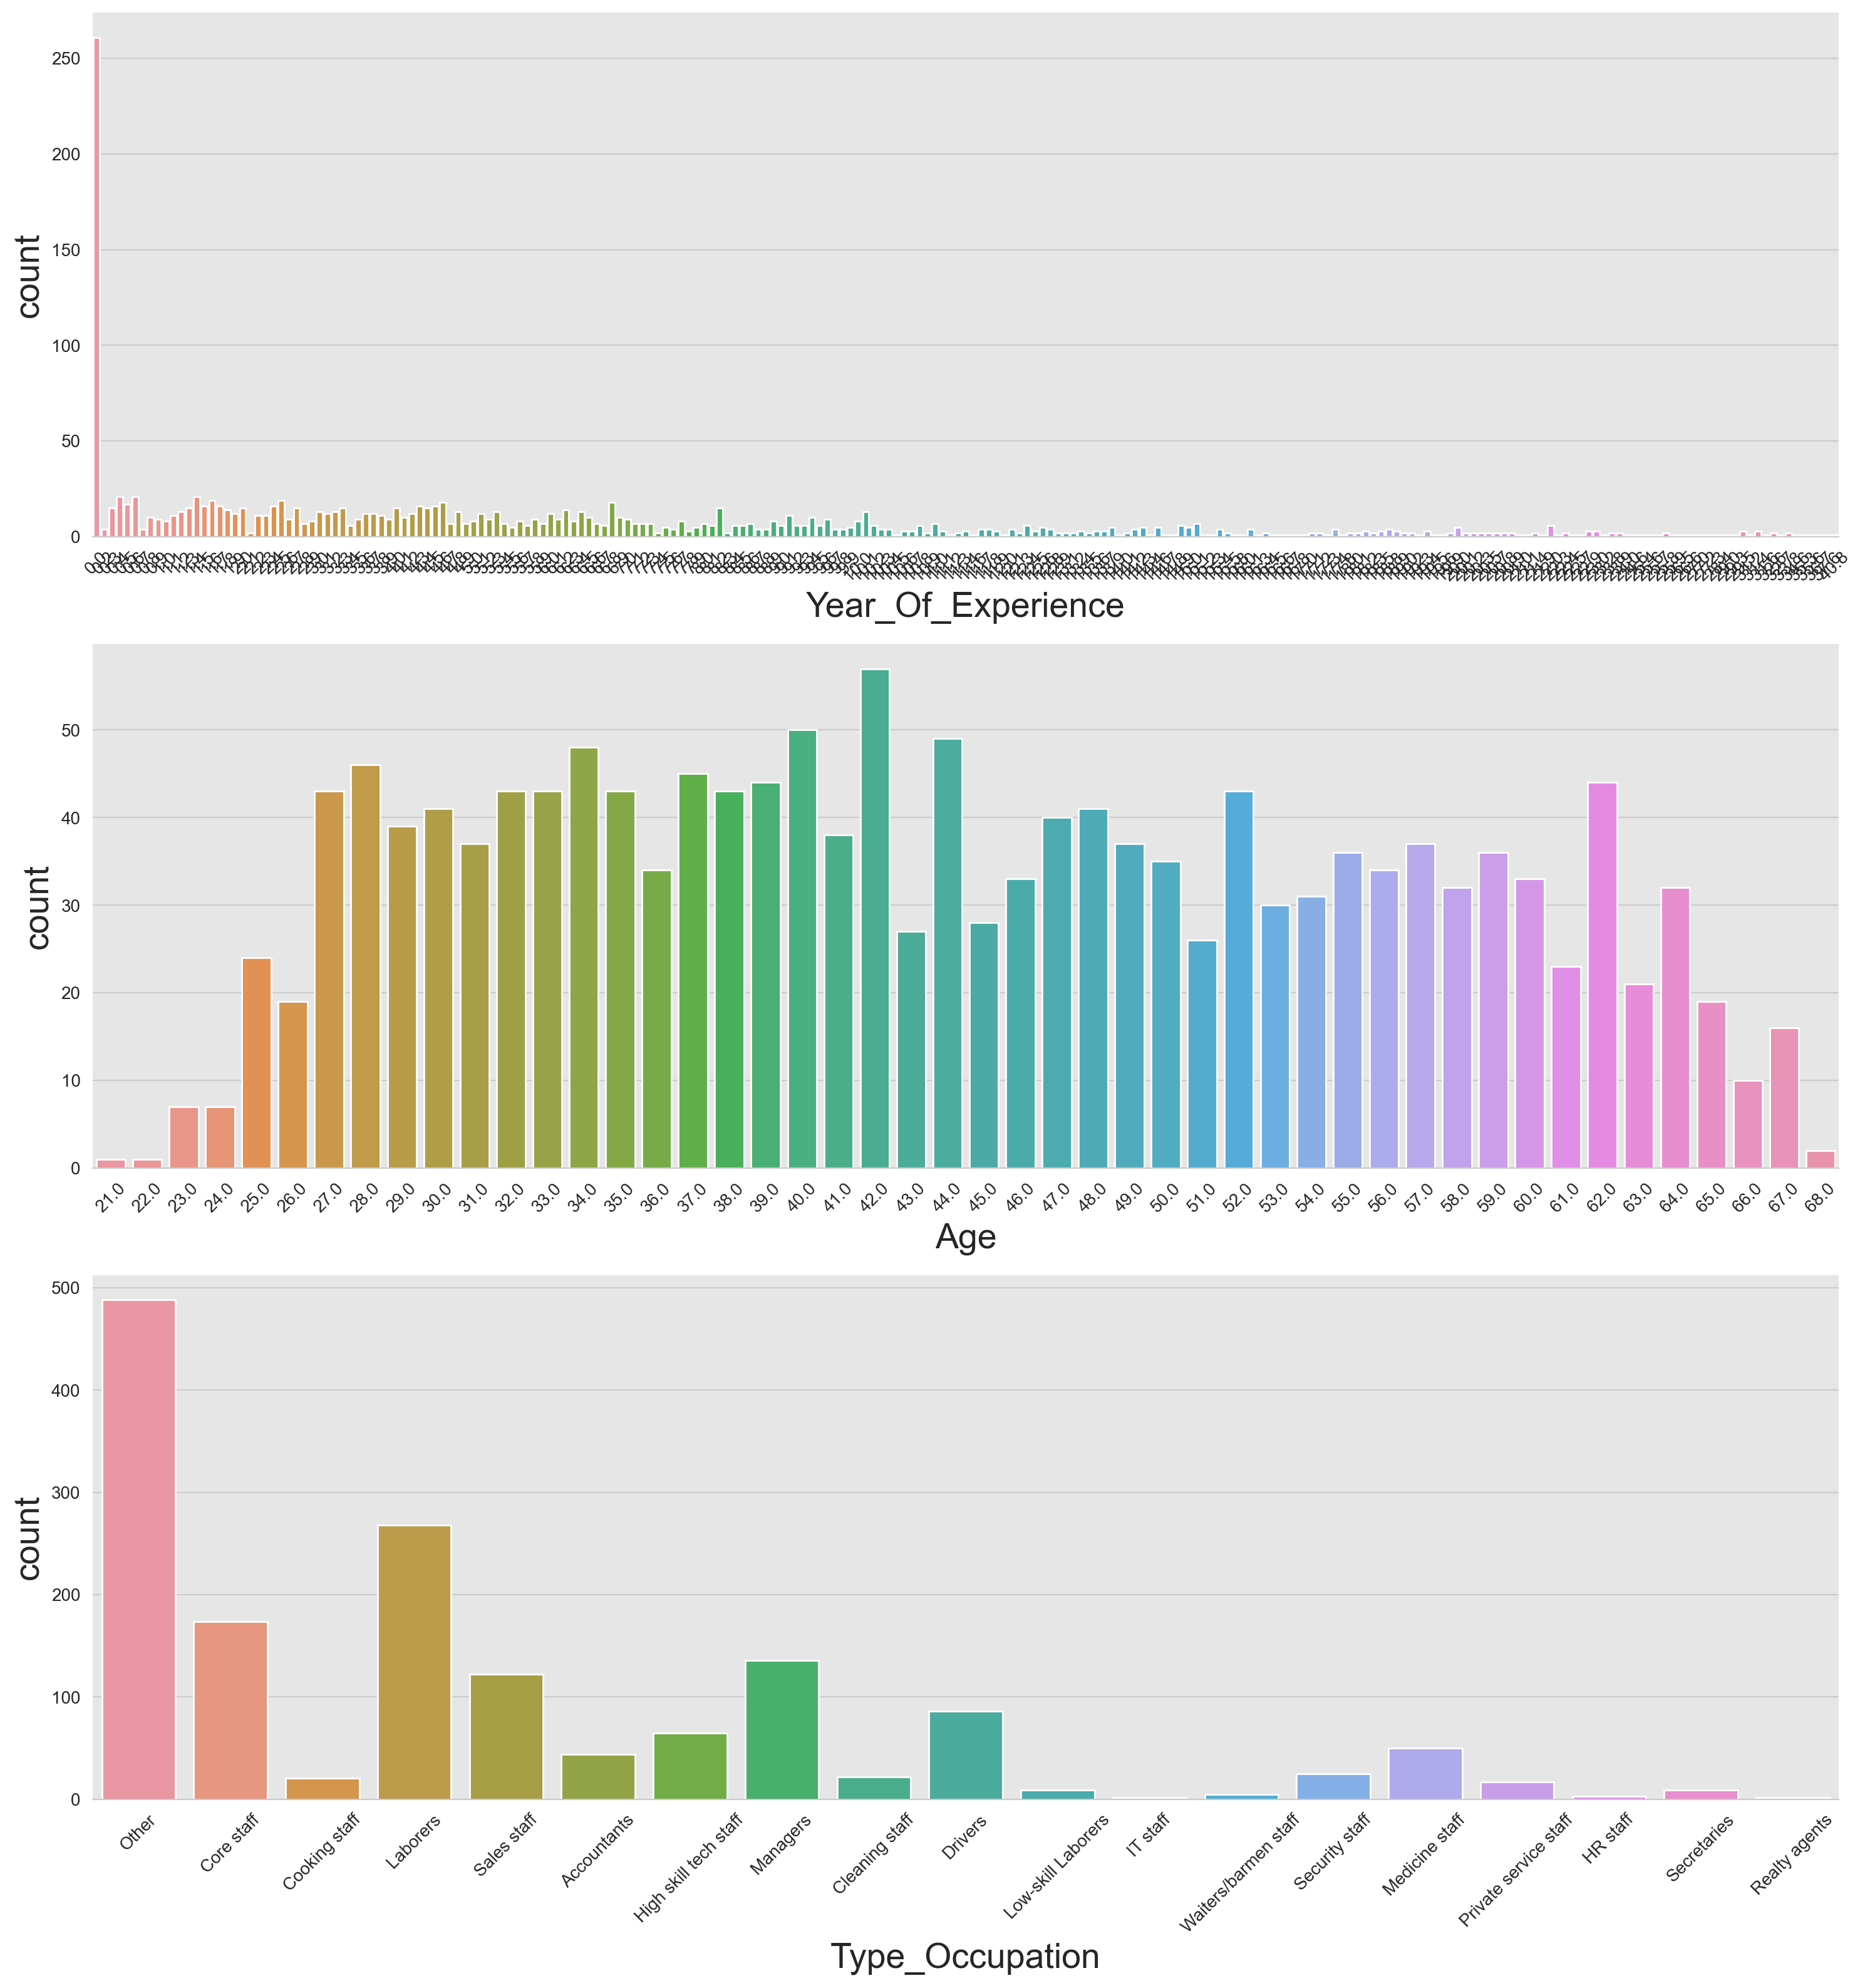

In [87]:
# Checking countplot of columns

col=['Year_Of_Experience','Age','Type_Occupation']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(15,15))

for x, y in enumerate (credit_card[col]):

    plt.subplot (3,1, x+1)
    bx = sns.countplot(x=credit_card[y])
    plt.tight_layout()
    plt.xlabel(y,fontsize=20)
    plt.ylabel('count',fontsize=20)
    sns.despine(left=True)
    plt.xticks(rotation =45)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [88]:
credit_card['Year_Of_Experience'].max()

40.8

## Insight

- 1. People with '0' experience are more, max experience is 40.8 Years
- 2. 21,22 Age people are lesser and 42 Age people are maximum , mostly people are in range 27-60 Age
- 3. 'Other' -Type_Occipation is maximim, 2nd max is Laborers

In [89]:
credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

In [90]:
credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

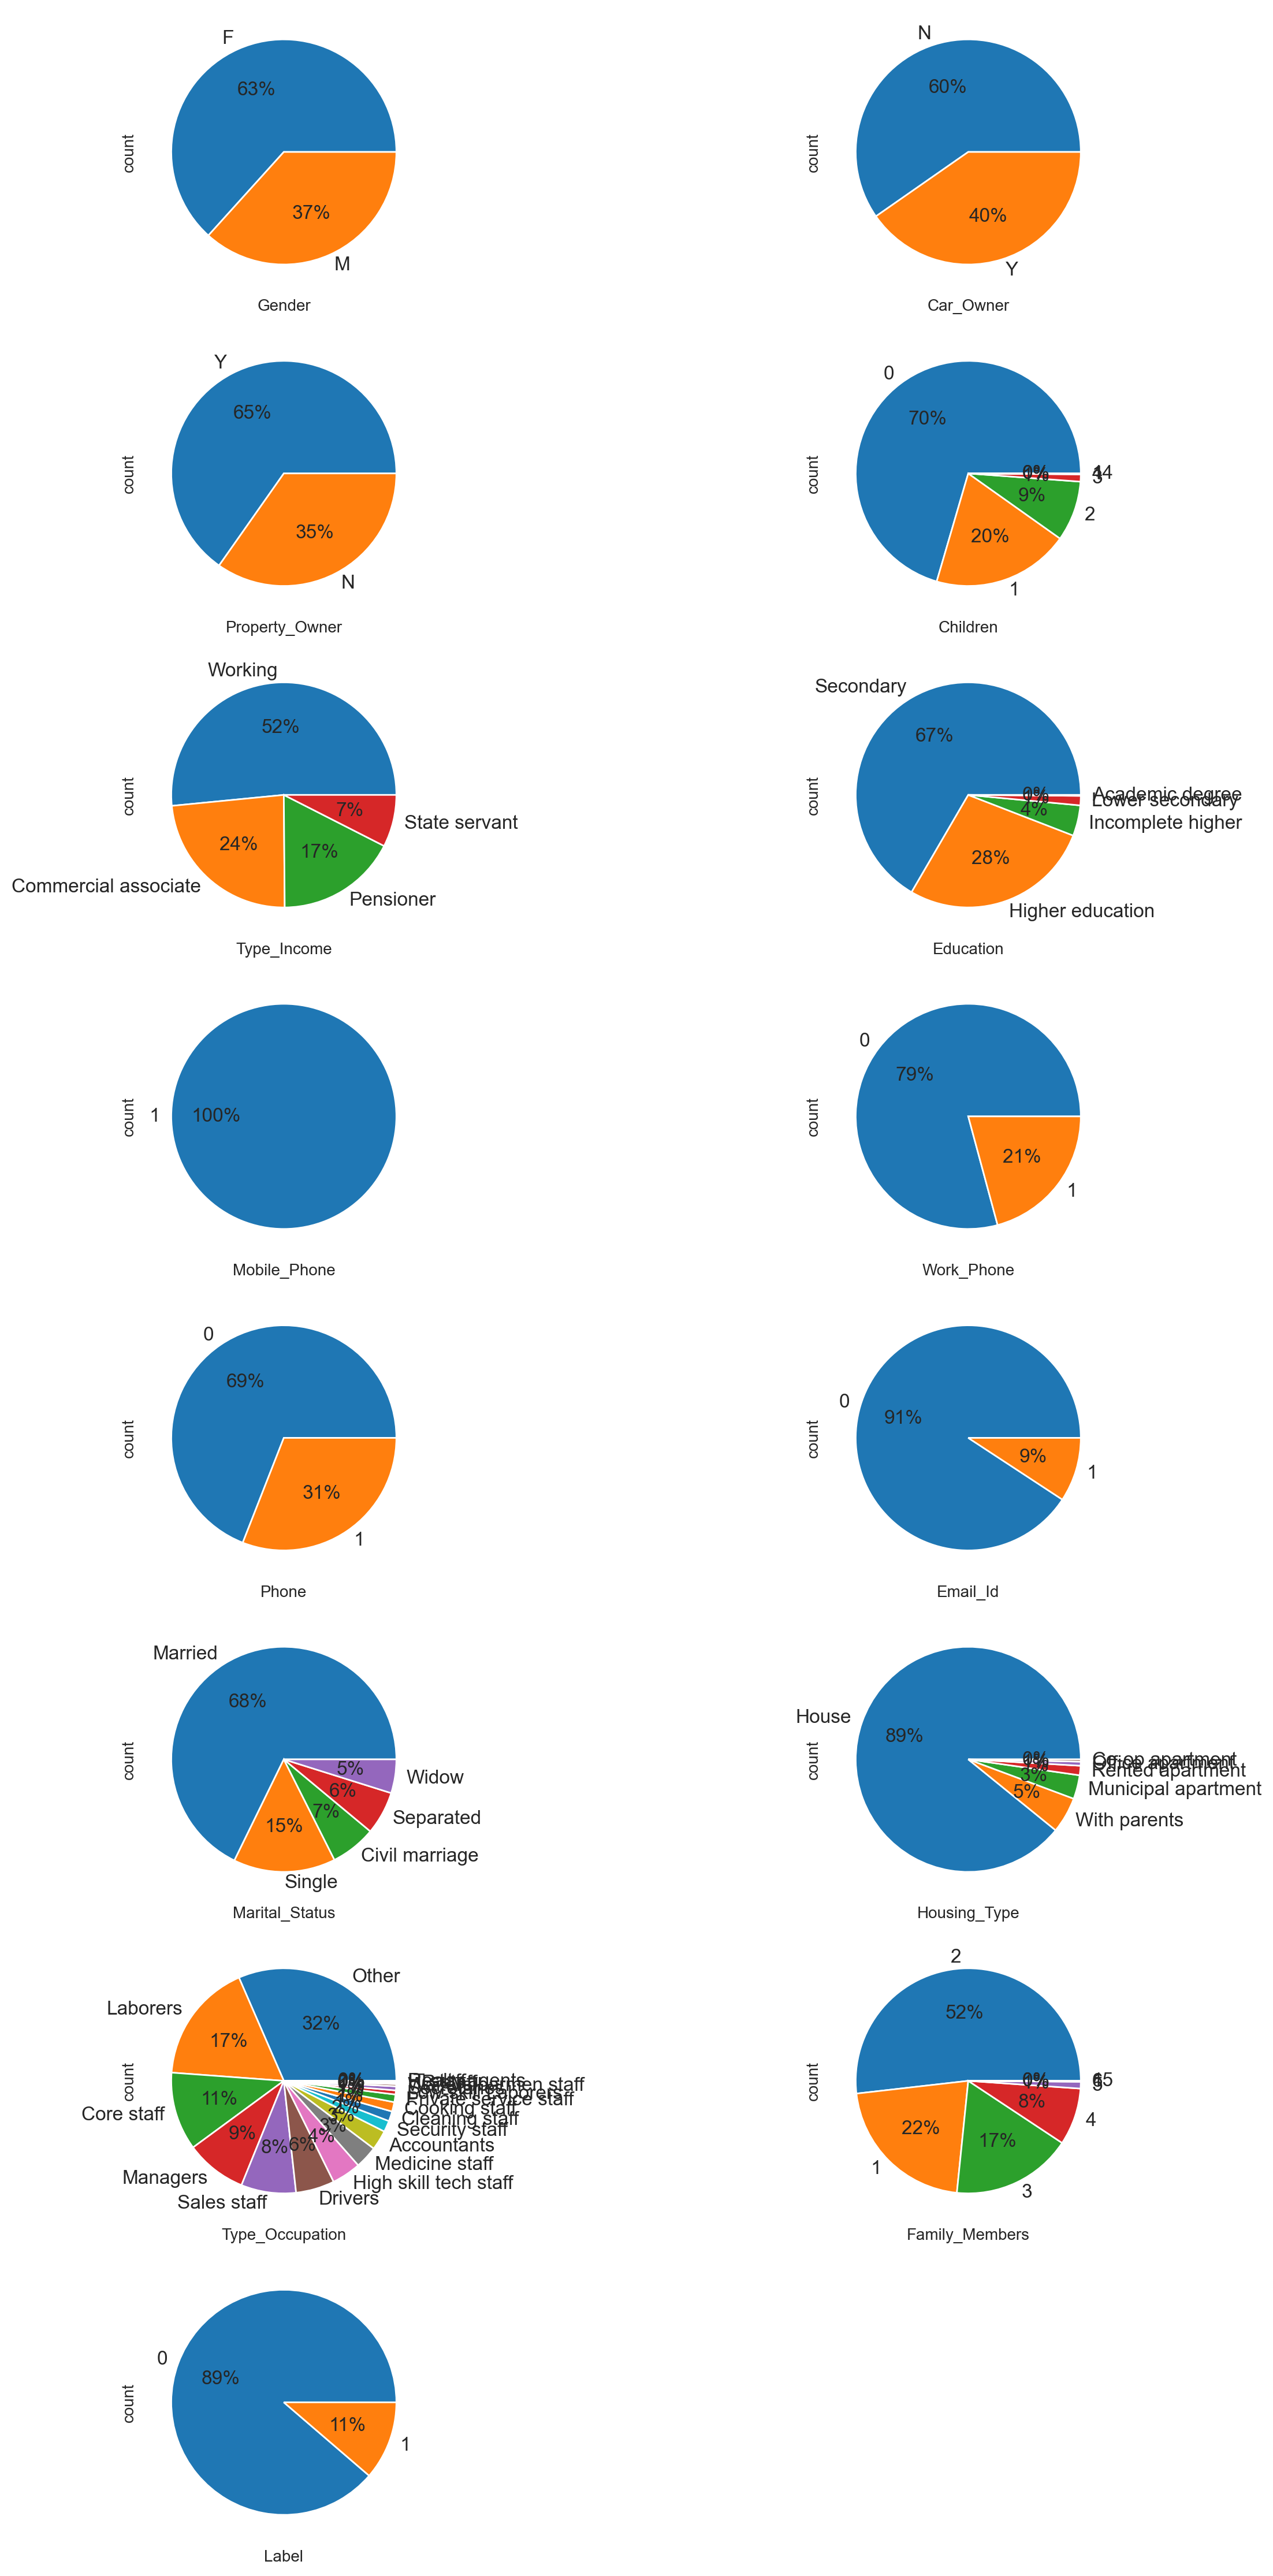

In [91]:
# Checking Pie chart for finding percentage values in each categorical column

col= ['Gender', 'Car_Owner', 'Property_Owner', 'Children','Type_Income', 'Education','Mobile_Phone','Work_Phone', 'Phone', 
       'Email_Id','Marital_Status',
       'Housing_Type','Type_Occupation','Family_Members', 'Label']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,25))

for x, y in enumerate (credit_card[col]):

    plt.subplot (9,2, x+1)
    plt.pie(x=credit_card[y].value_counts(),labels = credit_card[y].value_counts().index, autopct='%.0f%%',textprops={'fontsize': 12})
    plt.tight_layout()
    plt.xlabel(y,fontsize=10)
    plt.ylabel('count',fontsize=10)
    sns.despine(left=True)
  
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight


- 1. 63% are females in given data
- 2. 60% People not owning car
- 3. 65% People own property
- 4. 70% people having no child
- 5. 52% People are working ,24 % are Commercial associate, 17% are pensioners
- 6. 67% people are Secondary qualified
- 7. All People have mobile phone
- 8. 21% people have work_phone
- 9. 31% People have phone
- 10. only 9% people use email_id
- 11. 68% people are married and 15% single
- 12. 89% people having their house, 5% are living with parents
- 13. 32 % are in other category of Type_Occupation, 17% are Laborers
- 13. 52% people have 2 members only in family 
- 14. 89% Applications have been approved for credit card

## 3. Does male credit card application has more approval as compared to female ?

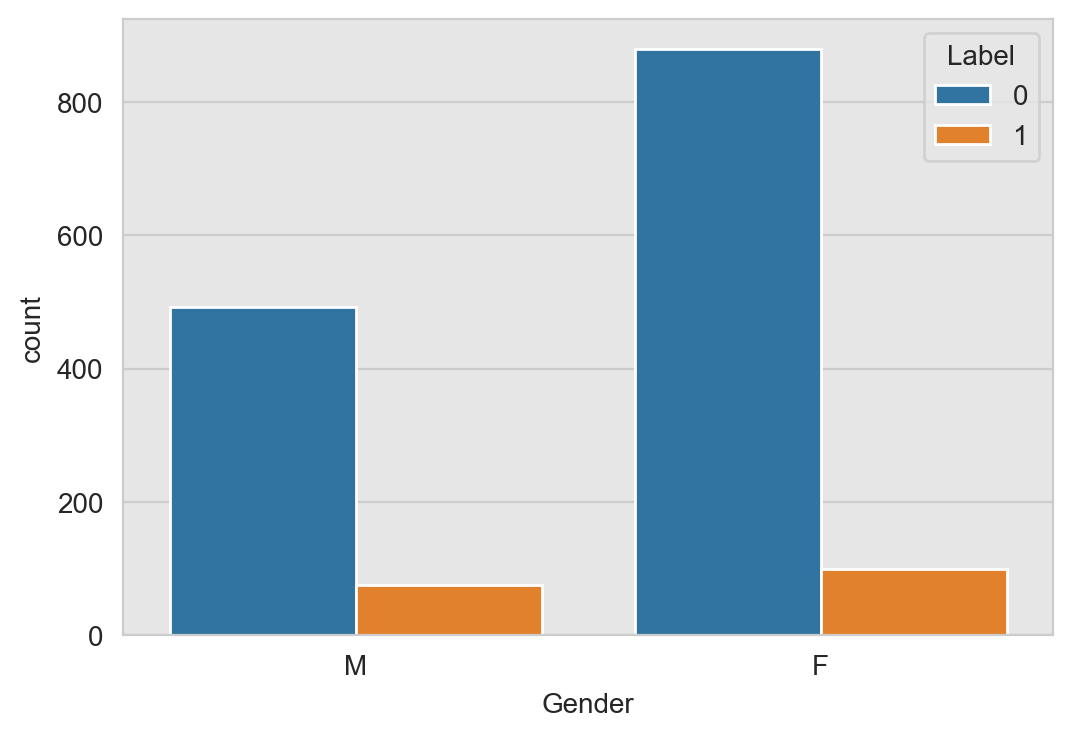

In [92]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Gender'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


- Females are having more no. of approvals than male

## 4. Having car makes the person eligible for credit card ?

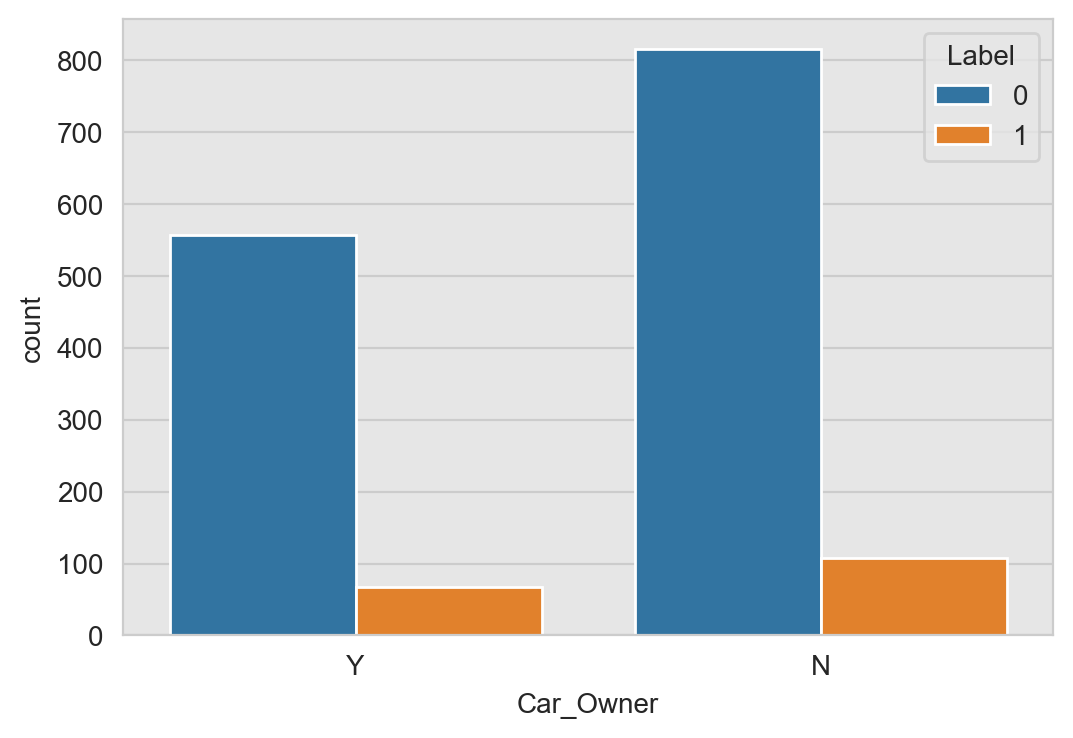

In [93]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Car_Owner'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- Not having car also having high approvals of credit card - having or not having car doesn't affect approval

## 5. Having property makes the person eligible for credit card ?

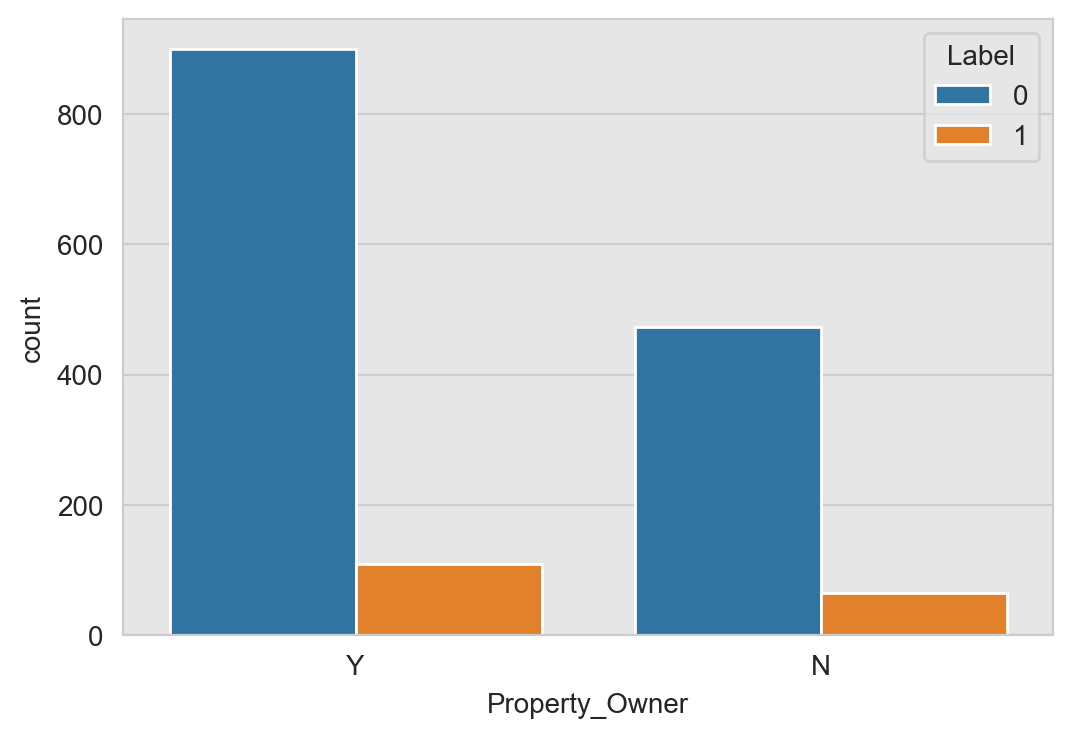

In [94]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Property_Owner'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- People who own property are having approval more than not having property
- All property owner not having approval yet

## 6. What is the age range of most approved credit card applications ?

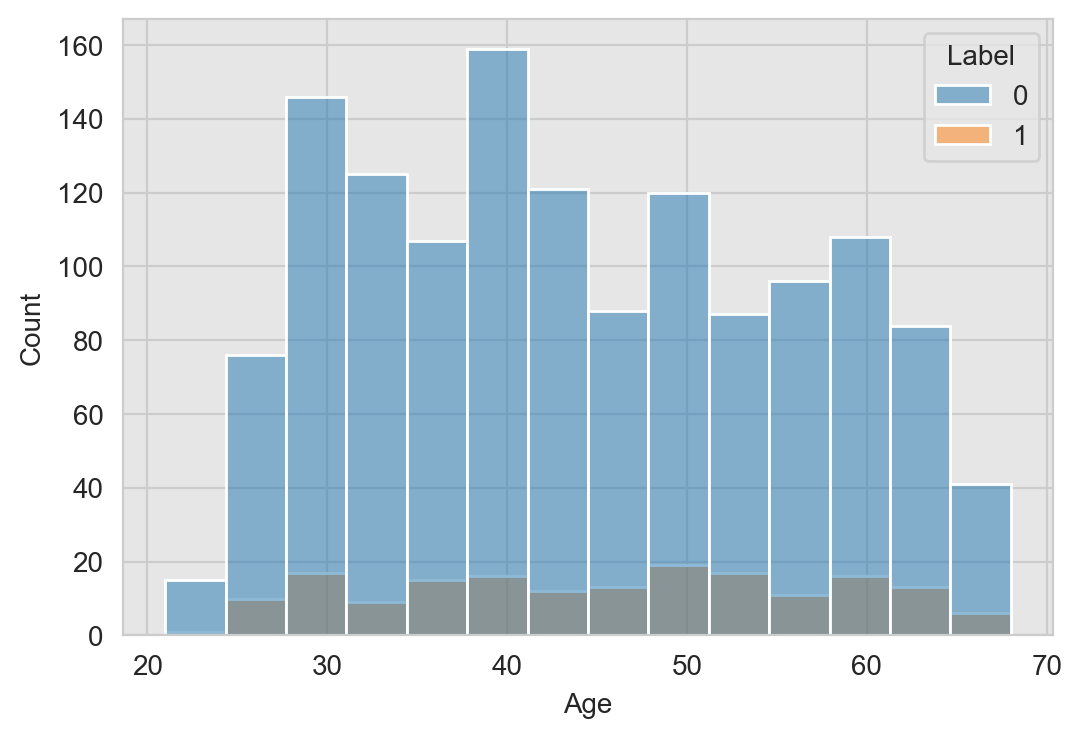

In [95]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.histplot(x=credit_card['Age'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- 25-65 years of people are using credit card mostly
- 20-25 years age people are using less credit cards


## 7. Pensioner would not be using credit card, Hence application will not be approved.

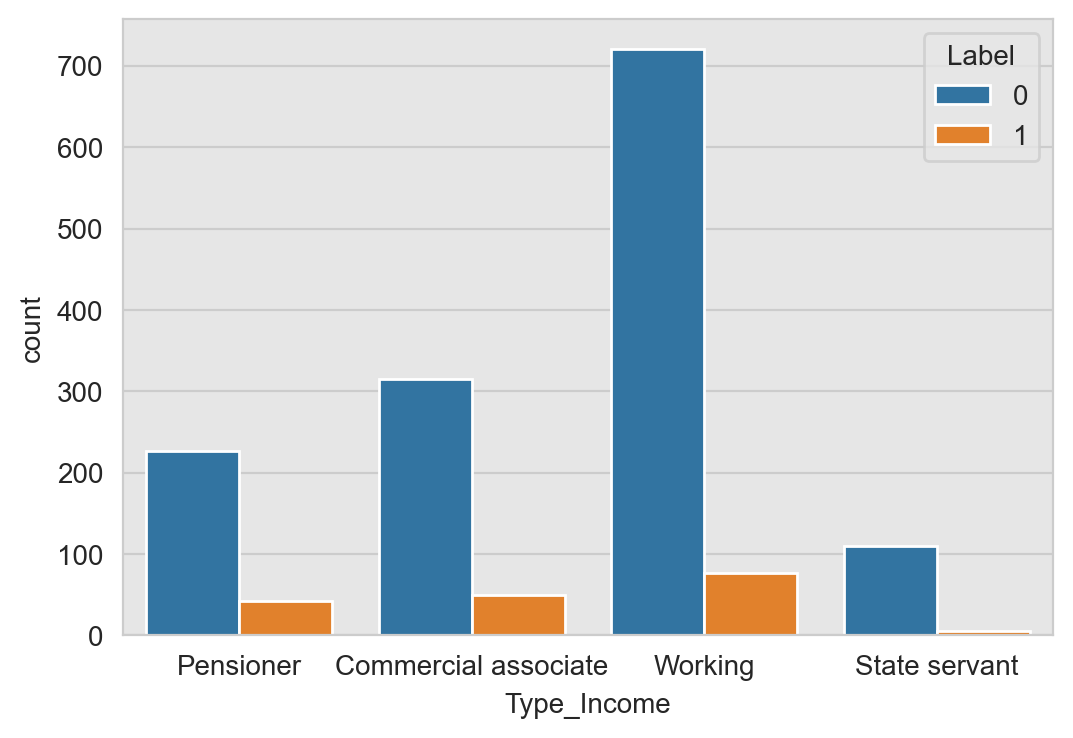

In [96]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Type_Income'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- 1. Pensioner are using credit cards also
- 2. 'Working' class has more approval of credit card
- 2. 'State servant' class has no rejection
- 3. rate of approval is 100% in 'State servant class'

## 8. In which Type_Income catgory male and female are working ?

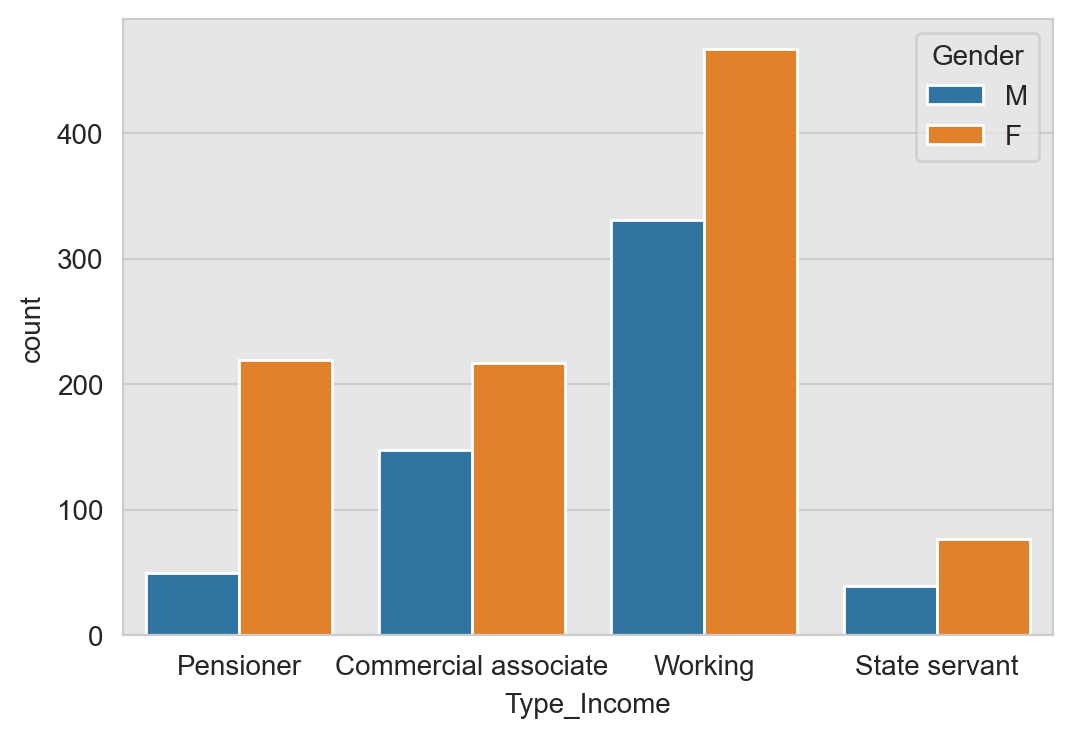

In [97]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Type_Income'],hue=credit_card['Gender'])
  
%config InlineBackend.figure_format='retina'

plt.show()

- In each "Type_Income" category Female are more as compared to Male


## 9. More no. of Married people credit card applications gets approved as compared to unmarried ?

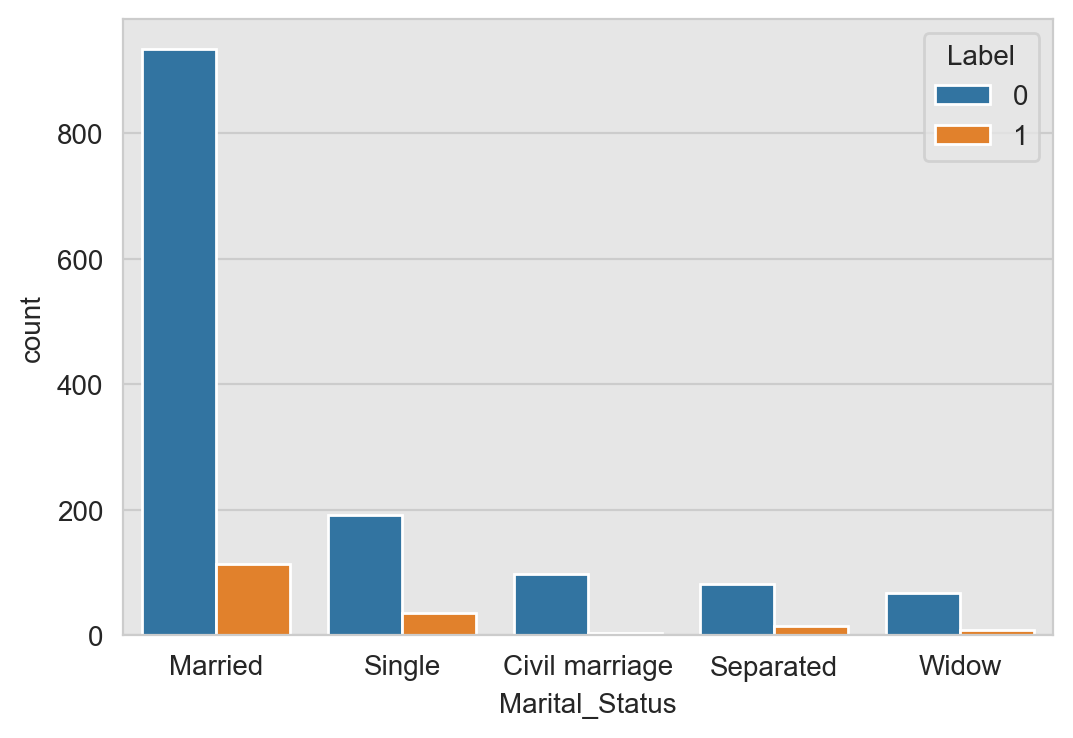

In [98]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Marital_Status'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()

In [99]:
total_married=credit_card['Marital_Status'][credit_card['Marital_Status']=='Married'].value_counts()
married_with_approved_card=credit_card[(credit_card['Label']==0) & (credit_card['Marital_Status']=='Married')]['Marital_Status'].value_counts()

In [100]:
# married people card approval rate

married_card_approval_rate=(married_with_approved_card/total_married)*100
married_card_approval_rate

Marital_Status
Married    89.132507
Name: count, dtype: float64

In [101]:
total_single=credit_card['Marital_Status'][credit_card['Marital_Status']=='Single'].value_counts()
single_with_approved_card=credit_card[(credit_card['Label']==0) & (credit_card['Marital_Status']=='Single')]['Marital_Status'].value_counts()

In [102]:
# single people card approval rate

single_card_approval_rate=(single_with_approved_card/total_single)*100
single_card_approval_rate

Marital_Status
Single    84.581498
Name: count, dtype: float64

## Insight

- married people approval rate is 89%
- single people card approval rate is 84.5%
- civil marriage card approval rate is 100%

## 10. What is min income required to get credit card ?

In [103]:
# minimum income of people for approval of credit card

min_income_for_approval=credit_card['Annual_Income'][(credit_card['Label']==0) & (credit_card['Annual_Income']==credit_card['Annual_Income'].min())]

In [104]:
min_income_for_approval

1038    33750.0
Name: Annual_Income, dtype: float64

# 11. Is there any family which only has children living alone ?


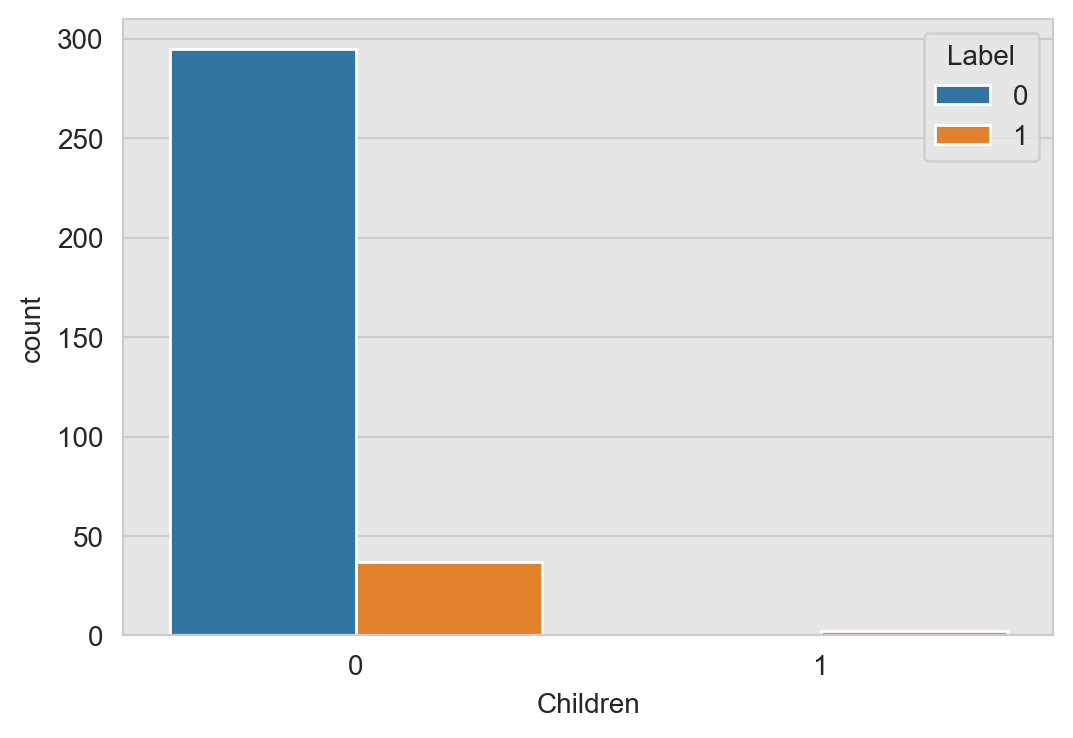

In [105]:


card_FM_one= credit_card[credit_card['Family_Members']==1] # data having one family member only


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=card_FM_one['Children'],hue=card_FM_one['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


In [106]:
card_FM_one['Children'].value_counts()

Children
0    332
1      2
Name: count, dtype: int64

- There are 2 children who are living alone with approved credit card

# 12. As per family_member counts which category is having more approved cards ?

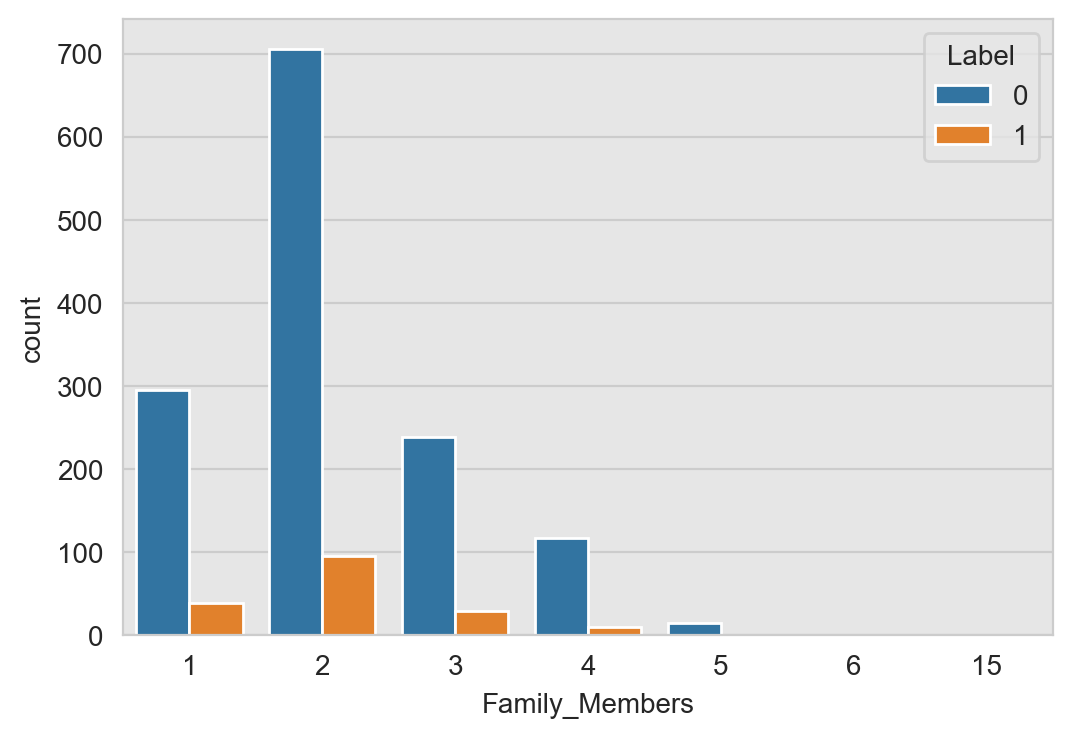

In [107]:

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(6,4))
sns.countplot(x=credit_card['Family_Members'],hue=credit_card['Label'])
  
%config InlineBackend.figure_format='retina'

plt.show()


- Family_Members having 2 members are having more approved cards than others

In [108]:
# credit card data which has approved applications only

Card_approval_data = credit_card[credit_card['Label']==0]

In [109]:
Card_approval_data.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
175  5118538      F         N              Y         1        81000.0   
176  5069057      M         Y              N         0       225000.0   
177  5066689      F         N              Y         0       180000.0   
178  5086062      F         N              Y         0       135000.0   
179  5113717      F         N              N         1       135000.0   

              Type_Income         Education  Marital_Status  \
175               Working         Secondary         Married   
176  Commercial associate         Secondary         Married   
177  Commercial associate  Higher education  Civil marriage   
178         State servant         Secondary         Married   
179               Working         Secondary         Married   

            Housing_Type  ...  Employed_Days  Mobile_Phone  Work_Phone  Phone  \
175  Municipal apartment  ...          -6367             1           1      1   
176                House  ...          -2484             1           0      0   
177                House  ...           -341             1           0      1   
178                House  ...          -9422             1           0      1   
179                House  ...          -3054             1           0      0   

     Email_Id        Type_Occupation Family_Members  Label  \
175         0         Cleaning staff              3      0   
176         0               Laborers              2      0   
177         1            Sales staff              2      0   
178         0             Core staff              2      0   
179         1  Private service staff              3      0   

     Year_Of_Experience   Age  
175                17.4  43.0  
176                 6.8  49.0  
177                 0.9  35.0  
178                25.8  56.0  
179                 8.4  45.0  

[5 rows x 21 columns]

In [110]:
# shape of data which has approced applications

Card_approval_data.shape

(1373, 21)

#

## Handling Outliers

In [111]:
# top 5 rows

credit_card.head()

Ind_Id Gender Car_Owner Property_Owner  Children  Annual_Income  \
0  5008827      M         Y              Y         0       180000.0   
1  5009744      F         Y              N         0       315000.0   
2  5009746      F         Y              N         0       315000.0   
3  5009749      F         Y              N         0       166500.0   
4  5009752      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  ...  \
0             Pensioner  Higher education        Married        House  ...   
1  Commercial associate  Higher education        Married        House  ...   
2  Commercial associate  Higher education        Married        House  ...   
3  Commercial associate  Higher education        Married        House  ...   
4  Commercial associate  Higher education        Married        House  ...   

   Employed_Days  Mobile_Phone  Work_Phone  Phone  Email_Id  Type_Occupation  \
0         365243             1           0      0         0            Other   
1           -586             1           1      1         0            Other   
2           -586             1           1      1         0            Other   
3           -586             1           1      1         0            Other   
4           -586             1           1      1         0            Other   

  Family_Members  Label  Year_Of_Experience   Age  
0              2      1                 0.0  51.0  
1              2      1                 1.6  37.0  
2              2      1                 1.6  62.0  
3              2      1                 1.6  37.0  
4              2      1                 1.6  37.0  

[5 rows x 21 columns]

In [112]:
# columns of data

credit_card.columns

Index(['Ind_Id', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_Income', 'Type_Income', 'Education', 'Marital_Status',
       'Housing_Type', 'Birthday_Count', 'Employed_Days', 'Mobile_Phone',
       'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation', 'Family_Members',
       'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [113]:
credit_card.shape

(1548, 21)

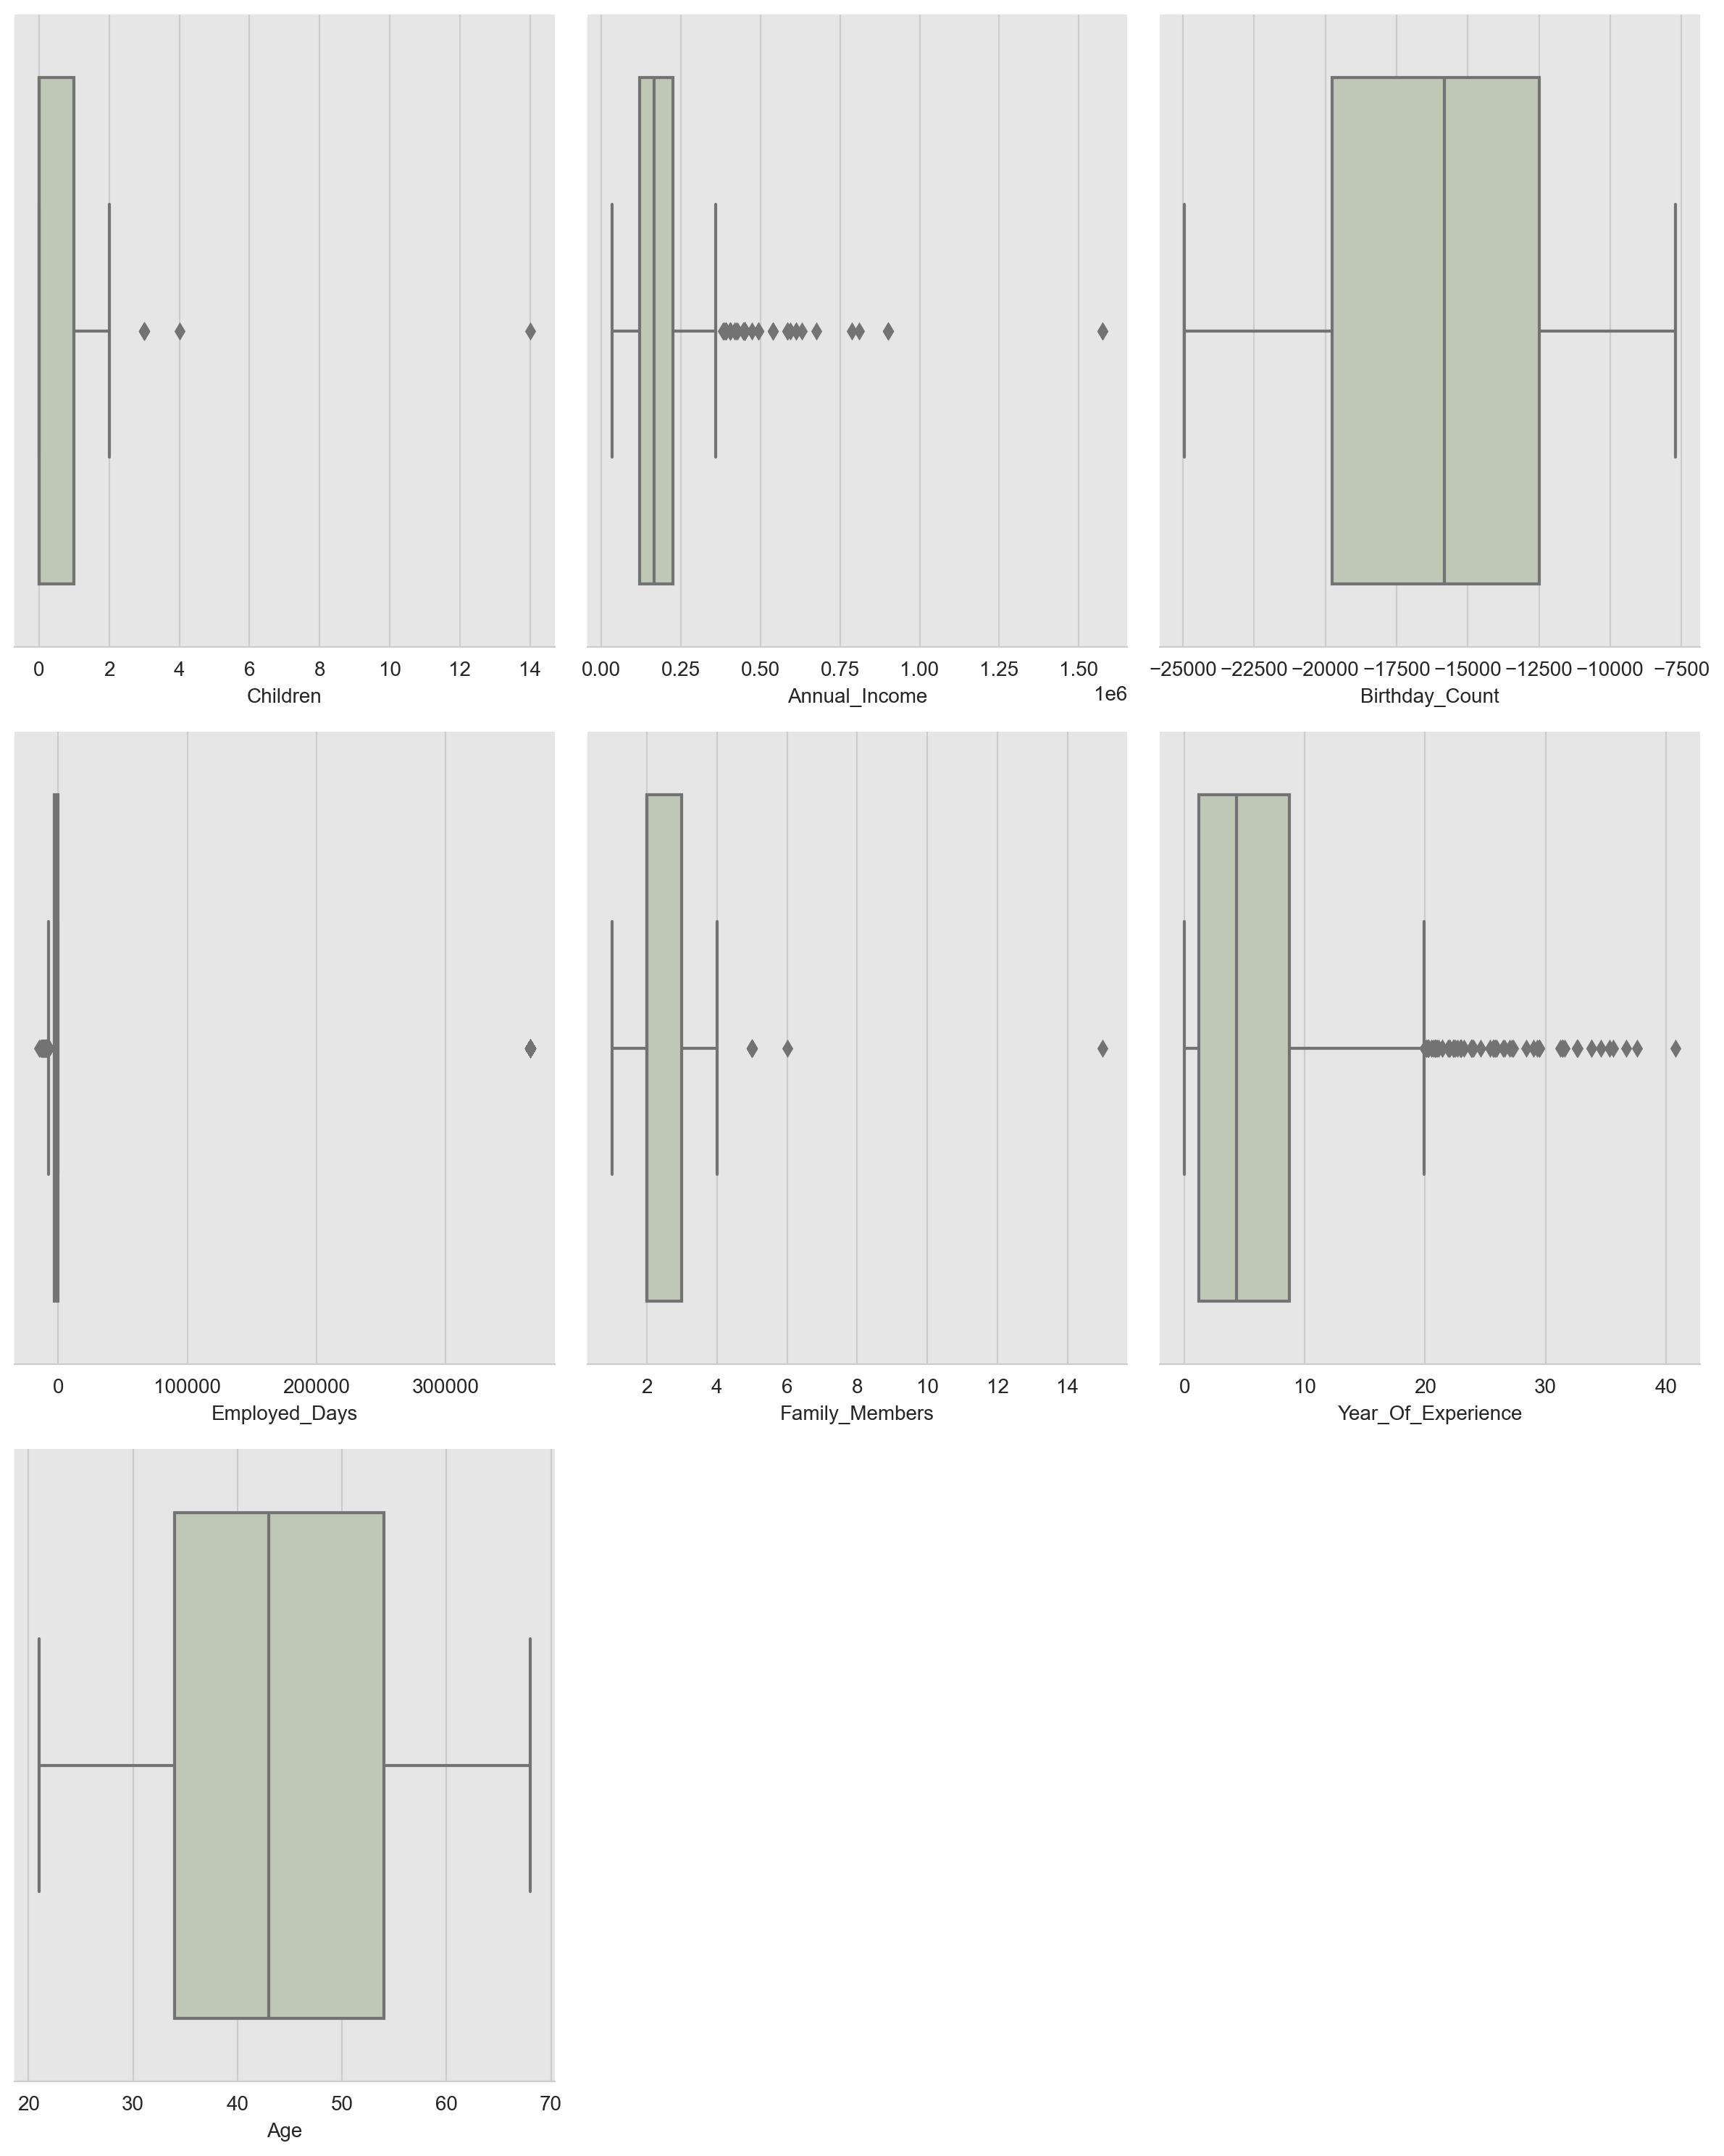

In [114]:
# Checking ouliers using boxplot

col = ['Children', 'Annual_Income', 'Birthday_Count',
       'Employed_Days','Family_Members','Year_Of_Experience', 'Age']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,15))

for x, y in enumerate (credit_card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.boxplot(x=credit_card[y], color = "#BFCAB4")
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

## Insight

- Children, Annual_Income, Employeed_Days, Family_Members, Year_Of Experience columns are having some outliers


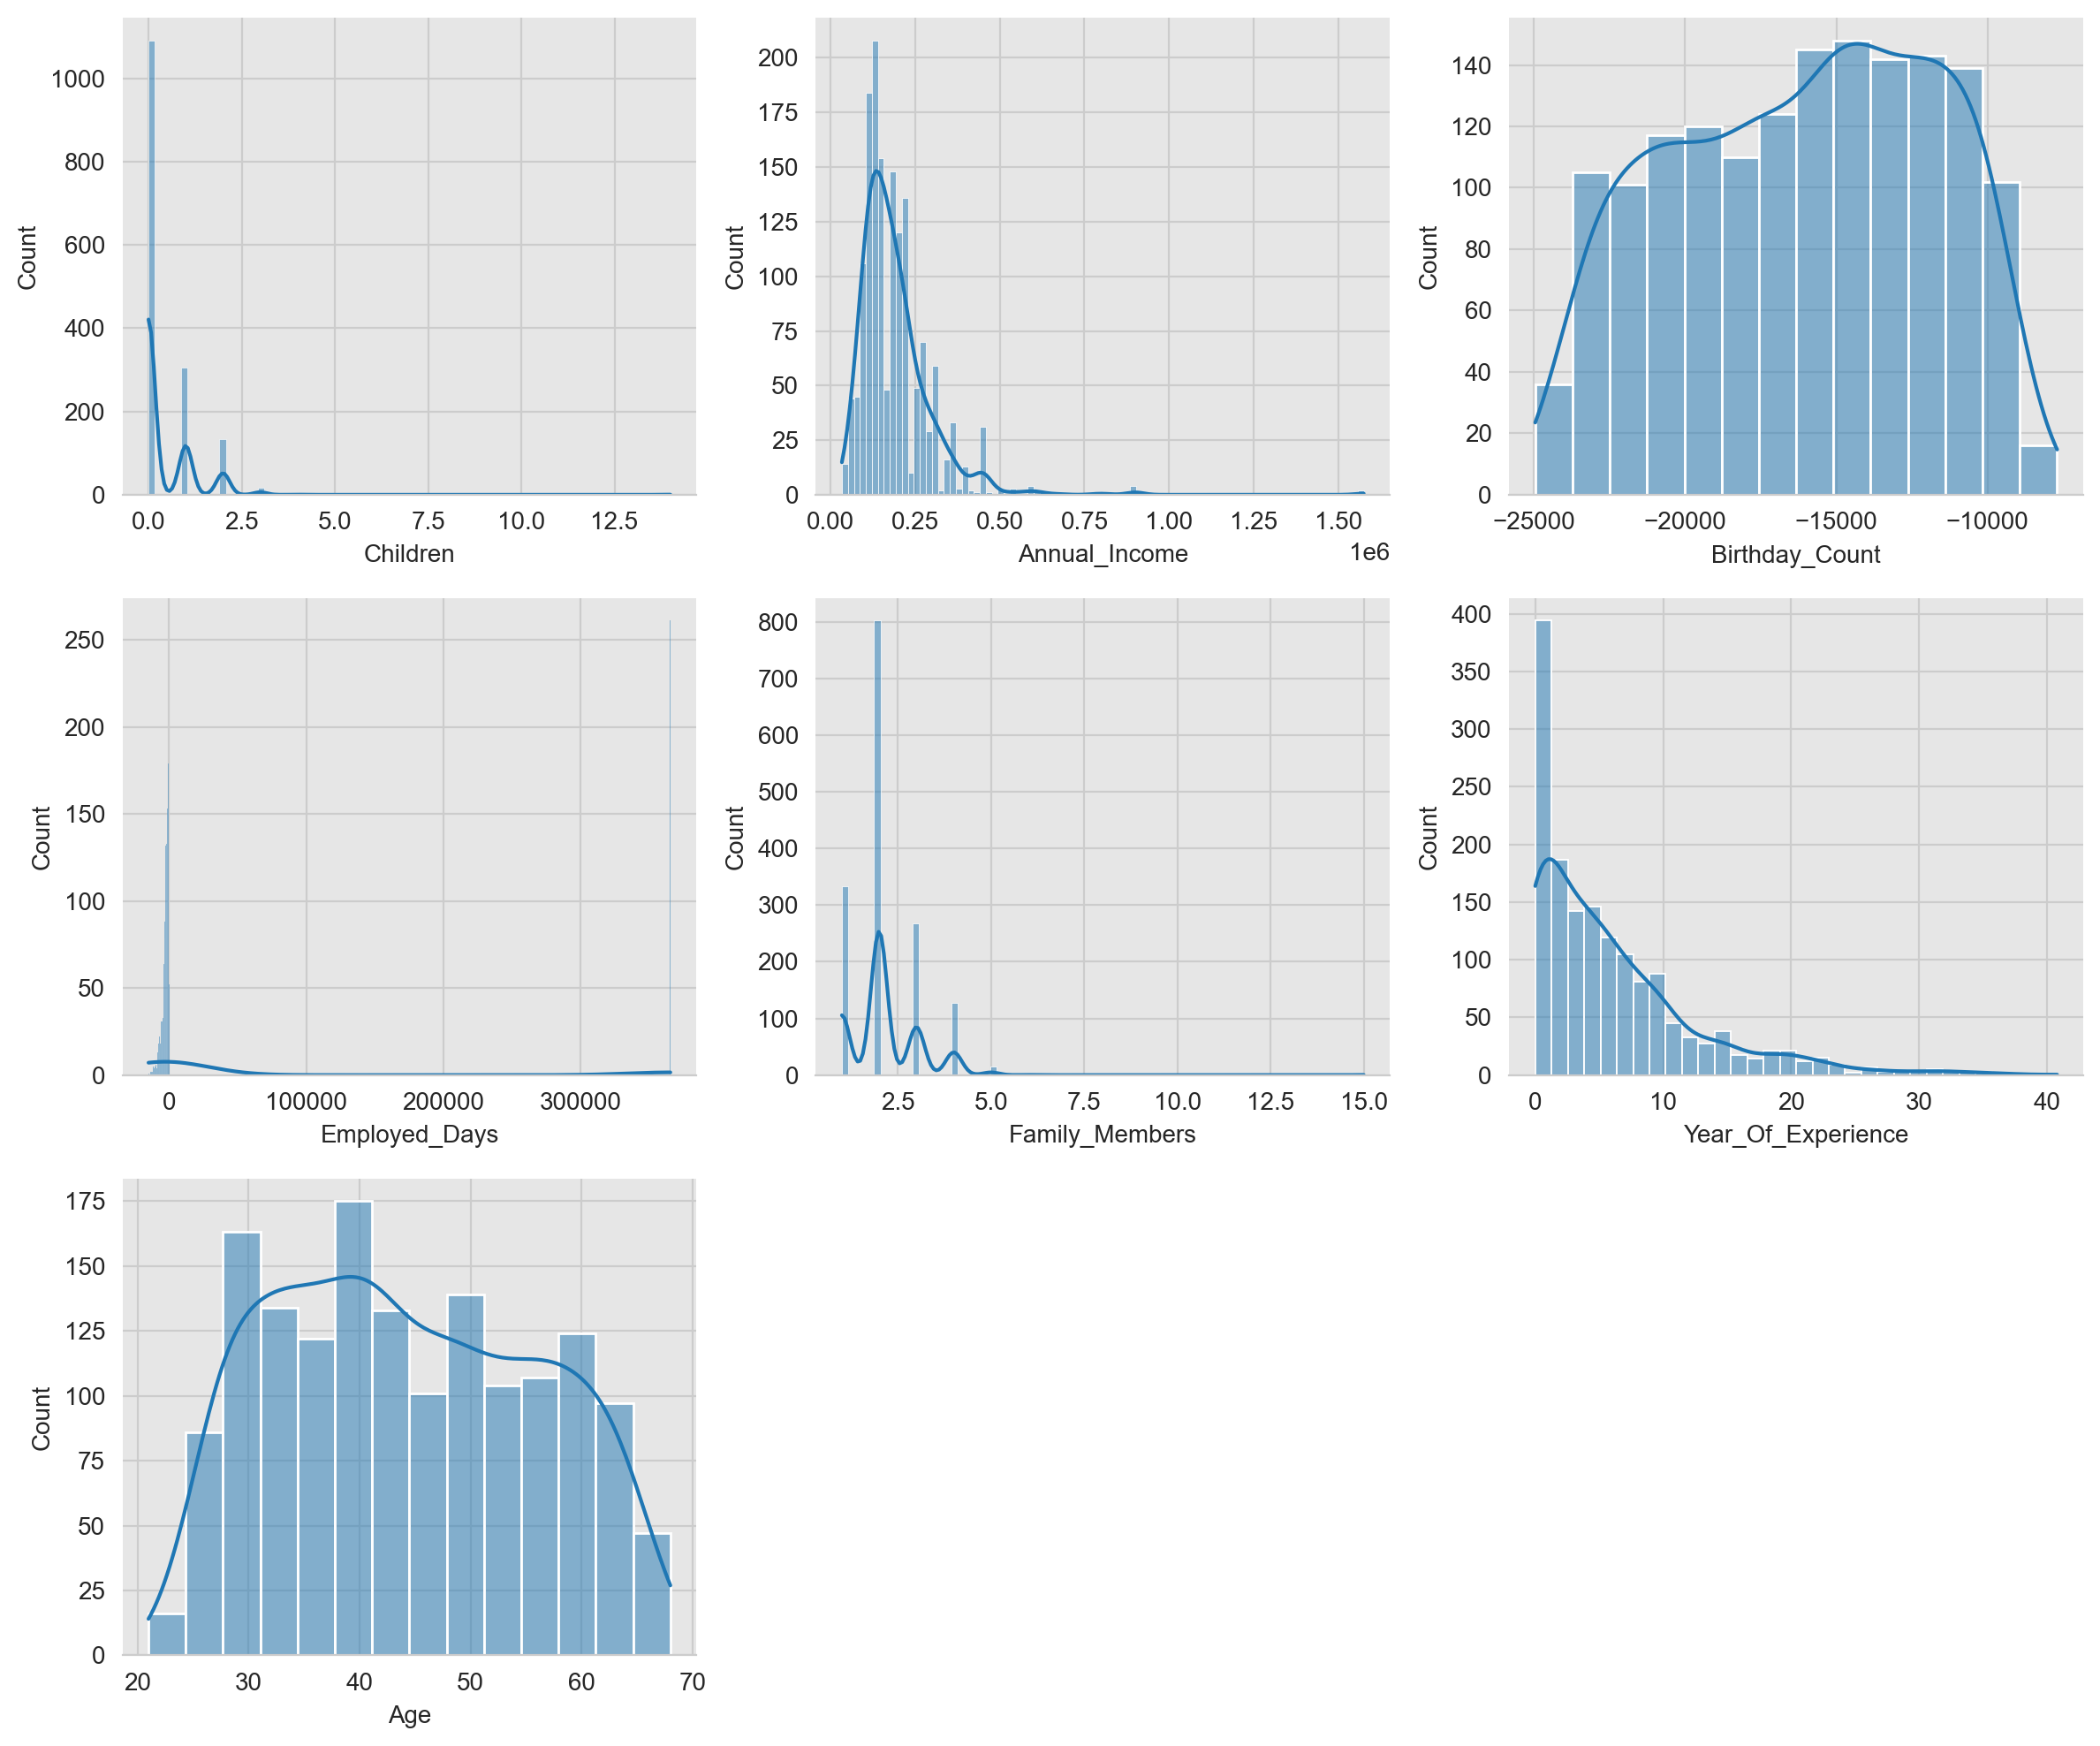

In [115]:
# Checking Distribution of Columns


col = ['Children', 'Annual_Income', 'Birthday_Count',
       'Employed_Days','Family_Members','Year_Of_Experience', 'Age']

sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,10))

for x, y in enumerate (credit_card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.histplot(x=credit_card[y],kde=True)
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [116]:
# Saving dataframe to csv file to work in MYSQL with cleaned data

credit_card.to_csv('data.csv')

In [117]:
# dropping irrelevant columns 

credit_card_2 = credit_card.copy()
credit_card_2 =credit_card_2.drop(columns=['Ind_Id','Birthday_Count','Employed_Days'])

In [118]:
# checking column present - data without removing outliers.

credit_card_2.columns

Index(['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

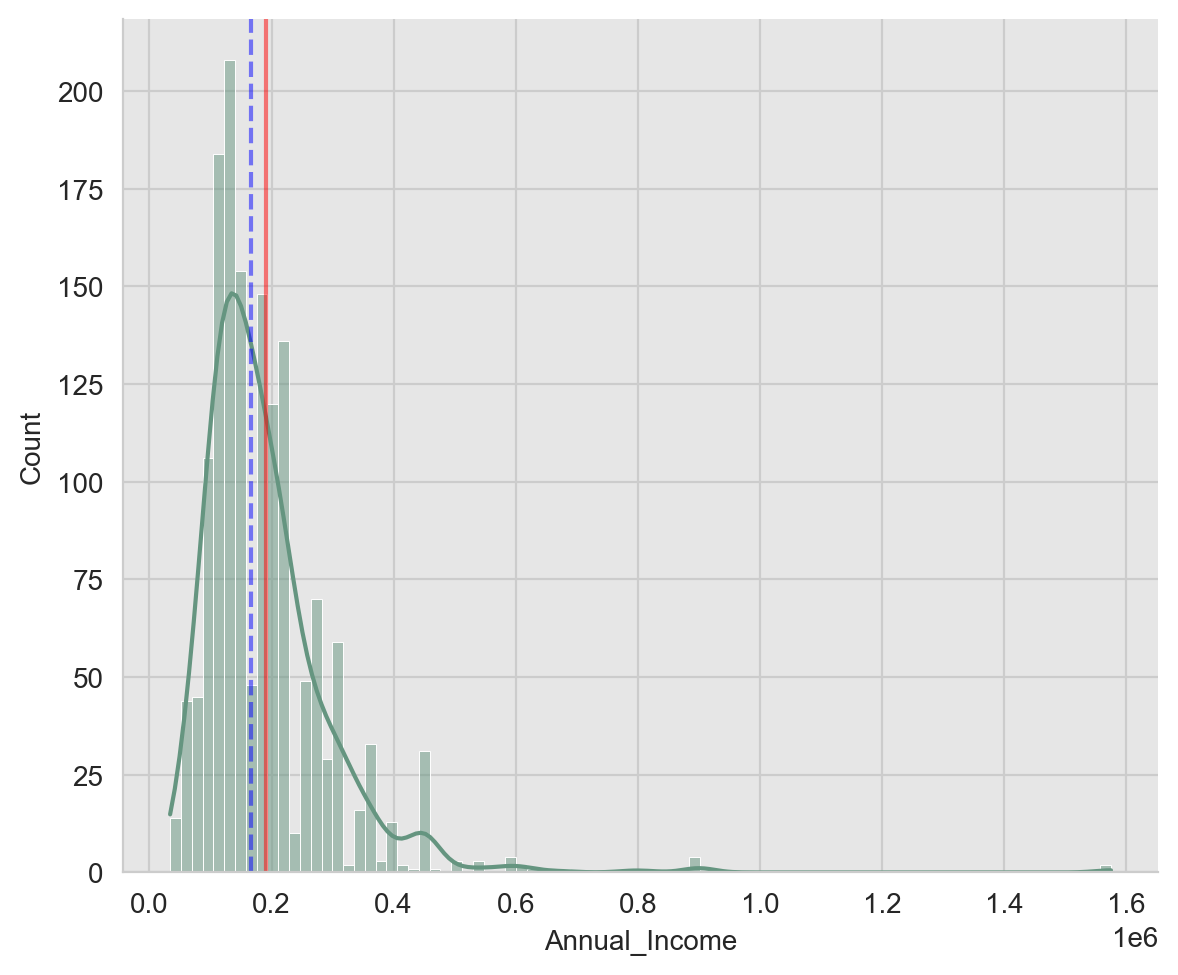

In [119]:
# Plotting histogram, median and mean lines to check distribution of 'Annual_Income'

plt.figure(figsize=(6,5))
sns.histplot(x=credit_card_2['Annual_Income'], data= credit_card_2, kde =True,color = "#659580")
plt.axvline(x=credit_card_2['Annual_Income'].mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=credit_card_2['Annual_Income'].median(),c='blue',ls='--',alpha=0.5,label='Median')

plt.tight_layout()
sns.despine(bottom=False, left= False)

%config InlineBackend.figure_format='retina'
plt.show()

In [120]:
# Counting outlier counts in columns

col = ['Children', 'Annual_Income','Family_Members','Year_Of_Experience', 'Age']

for column in col:
    q1,q3 = np.percentile(credit_card_2[column],[25,75])
    IQR = q3-q1
    lower_val = q1 - (1.5*IQR)
    upper_val = q3 + (1.5*IQR)
    up_value= credit_card_2[column][credit_card_2[column]>upper_val].count()
    low_value= credit_card_2[column][credit_card_2[column]<lower_val].count()
    print(f'outlier count in {column} : {up_value+low_value}')

outlier count in Children : 18
outlier count in Annual_Income : 73
outlier count in Family_Members : 17
outlier count in Year_Of_Experience : 81
outlier count in Age : 0


In [121]:
# outlier finding function

outlier_dict={}  # dictionary to save outliers

def outlier_find(data):
    
    """
    function to find oultliers in data 
    
    """
    
    q1,q3 = np.percentile(data,[25,75])  #finding q1 and q3 from data
    IQR = q3-q1                           
    lower_val = q1 - (1.5*IQR)           # lower value of data below which ouliers can be found
    upper_val = q3 + (1.5*IQR)           # upper value of data below which ouliers can be found
    
    upper_bound_outlier= data[data>upper_val].count()      #outlier counts above upper value
    lower_bound_outlier= data[data<lower_val].count()      #outlier counts below lower value
    
    outlier_dict["upper_bound_outlier"]= upper_bound_outlier   #saving outliers count above upper value in dictionary
    outlier_dict["lower_bound_outlier"]= lower_bound_outlier   #saving outliers count below lower  value in dictionary
    
    return outlier_dict,lower_val,upper_val                    # returning outlier dictionary, lower value and upper value

In [122]:
# outlier removing function


def removing_outlier(dataframe,data):
    
    """
    function to remove outliers from data if present
    
    """
    card = dataframe.copy()
    card = dataframe[data==(data.clip(lower=outlier_find(data)[1],upper=outlier_find(data)[2]))]
    
    return card


In [123]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Annual_Income'

outlier_find(credit_card_2['Annual_Income'])


({'upper_bound_outlier': 73, 'lower_bound_outlier': 0}, -33750.0, 380250.0)

In [124]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Children'

outlier_find(credit_card_2['Children'])


({'upper_bound_outlier': 18, 'lower_bound_outlier': 0}, -1.5, 2.5)

In [125]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Family_Members'

outlier_find(credit_card_2['Family_Members'])


({'upper_bound_outlier': 17, 'lower_bound_outlier': 0}, 0.5, 4.5)

In [126]:
# finding outlier counts above upper and lower bound value, along with lower and upper value -'Year_Of_Experience'

outlier_find(credit_card_2['Year_Of_Experience'])

({'upper_bound_outlier': 81, 'lower_bound_outlier': 0},
 -10.049999999999999,
 19.949999999999996)

## Outlier removing operation

In [127]:
# copying credit_card_2 dataframe in card

card = credit_card_2.copy()

In [128]:
# removing outliers from Annual_Income

outlier_find(card['Annual_Income'])

card= removing_outlier(card,card['Annual_Income'])

In [129]:
# removing outliers from Children

outlier_find(card['Children'])

card= removing_outlier(card,card['Children'])

In [130]:
# shape of dataset

card.shape

(1457, 18)

In [131]:
# removing outliers from Year_Of_Experience

outlier_find(card['Year_Of_Experience'])

card= removing_outlier(card,card['Year_Of_Experience'])

In [132]:
card.shape

(1376, 18)

In [133]:
# removing outliers from Year_Of_Experience

outlier_find(card['Year_Of_Experience'])

card= removing_outlier(card,card['Year_Of_Experience'])

In [134]:
card.shape

(1349, 18)

In [135]:
# removing outliers from Family_Members

outlier_find(card['Family_Members'])
card= removing_outlier(card,card['Family_Members'])


In [136]:
# checking shape of data after removing outliers

card.shape

(1349, 18)

In [137]:
# checking 'Label' column after removing outliers

card['Label'].value_counts()

Label
0    1202
1     147
Name: count, dtype: int64

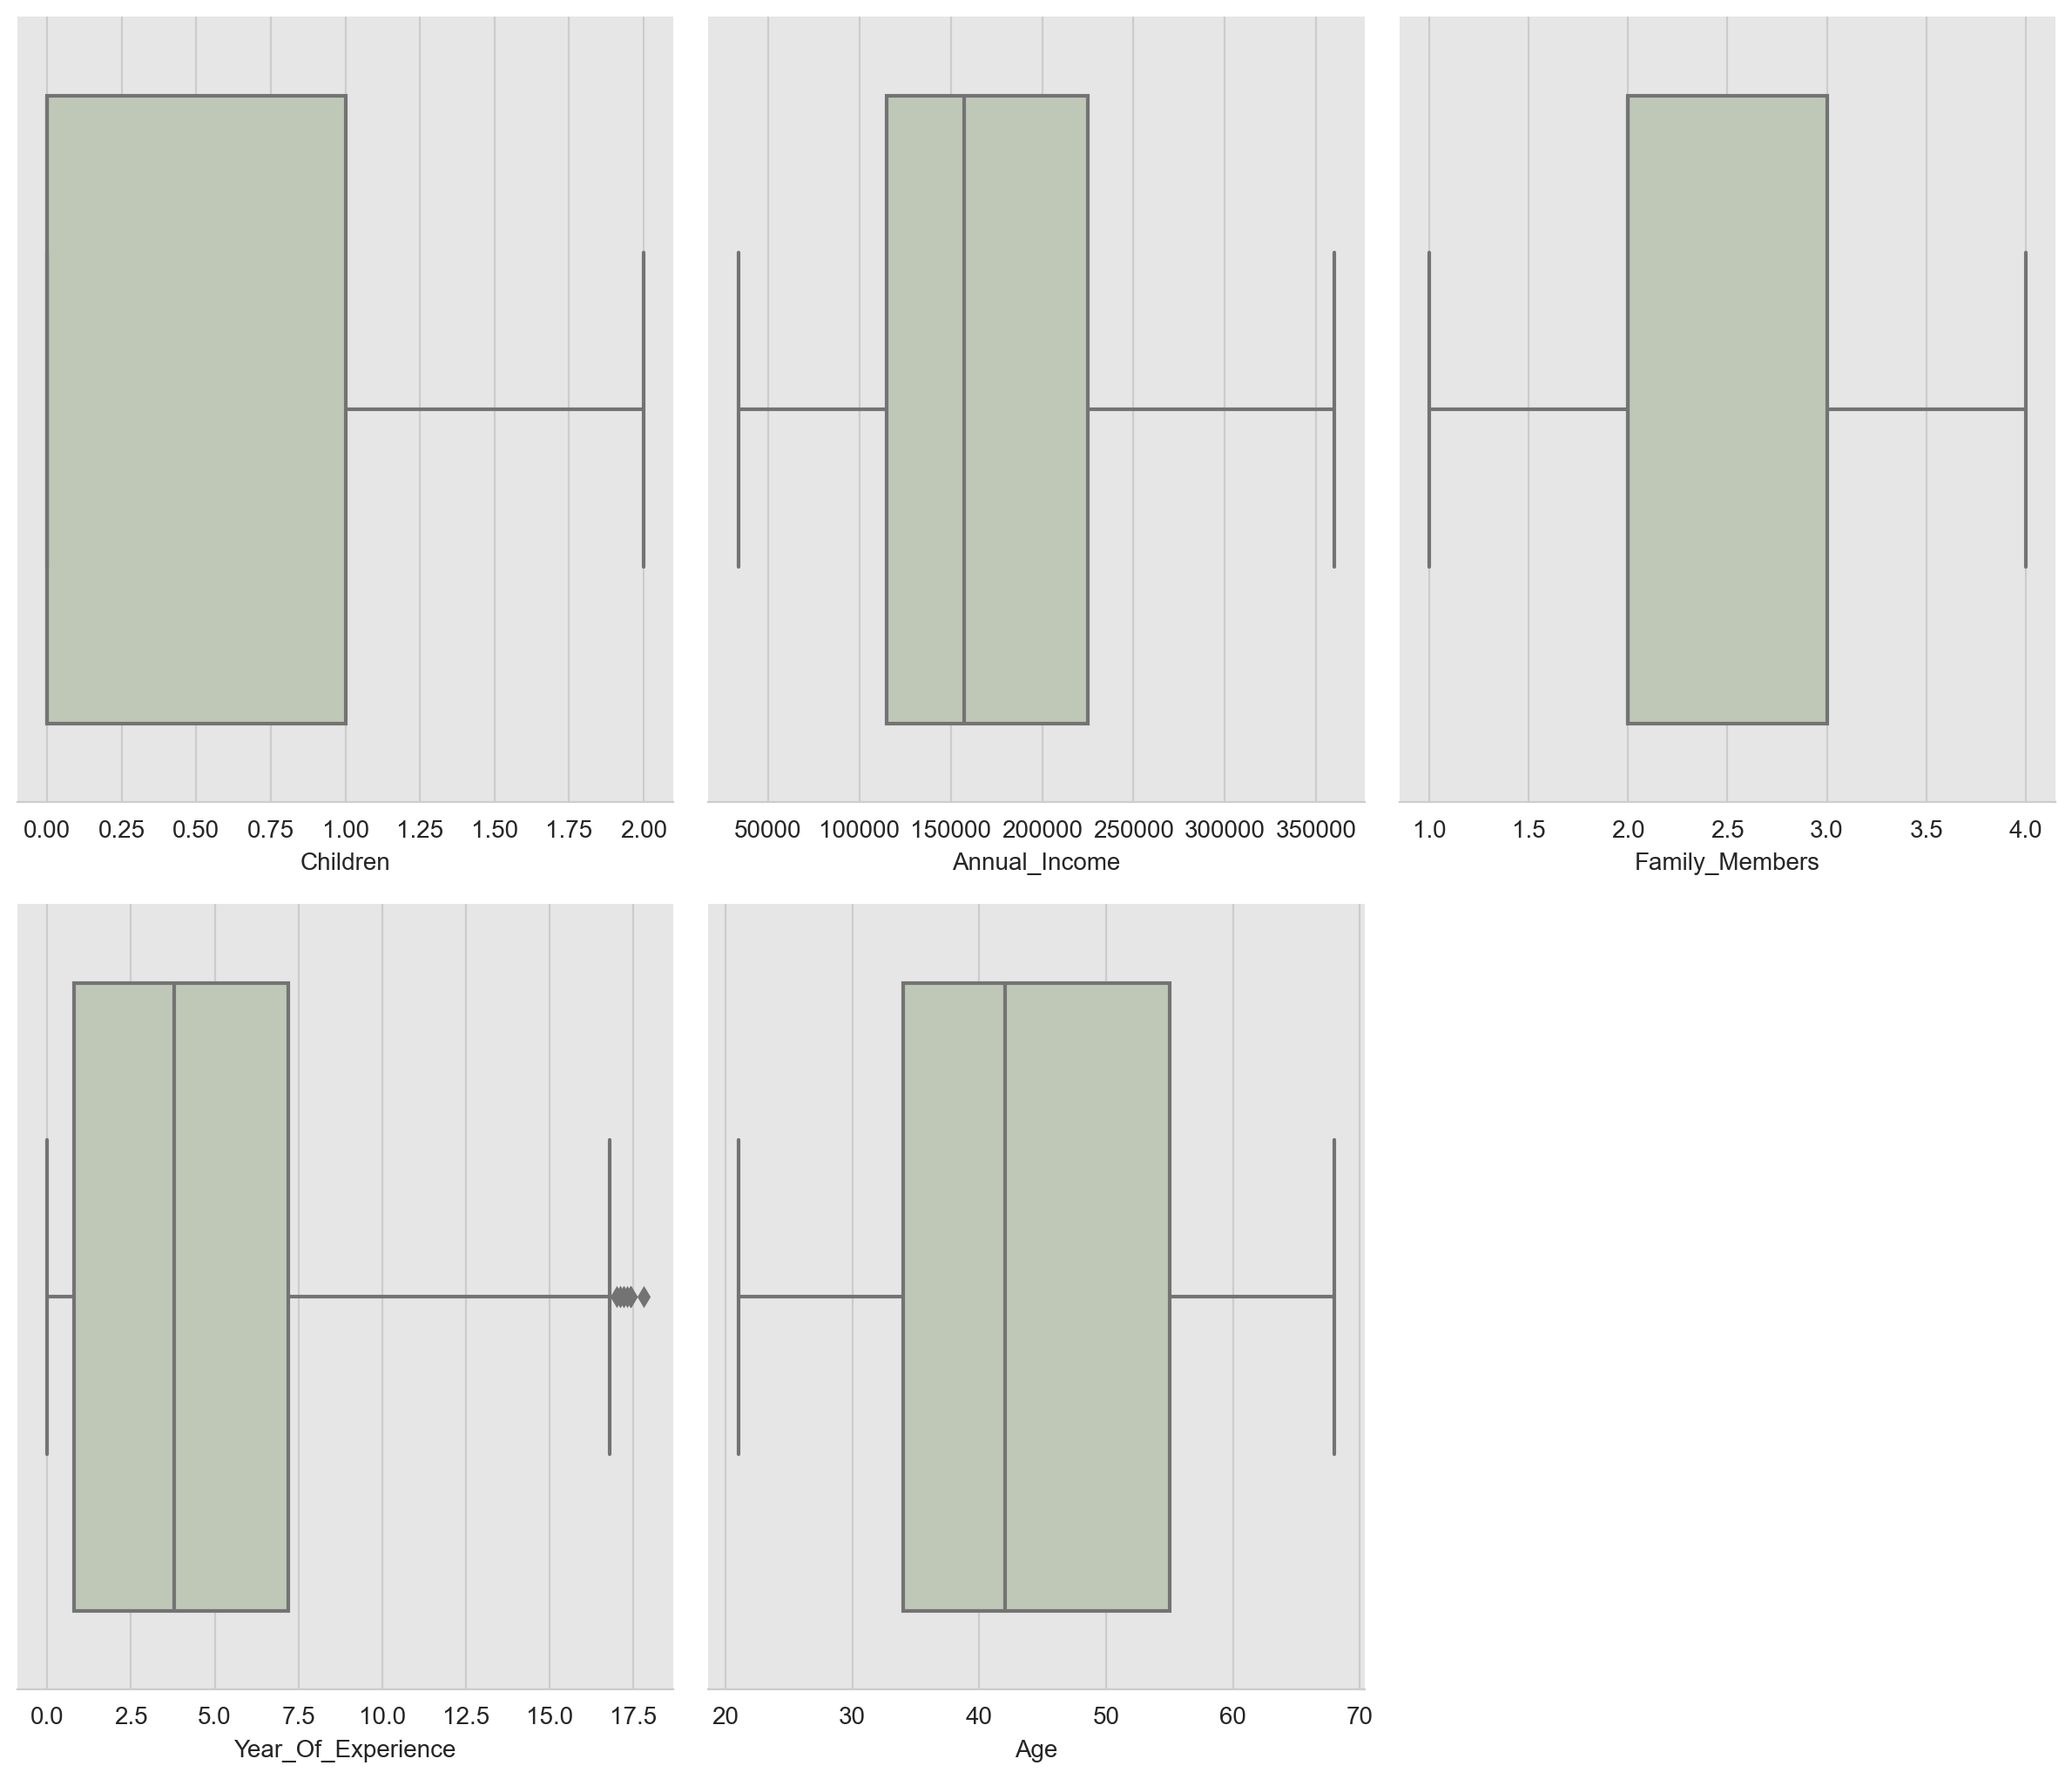

In [138]:
# Checking ouliers using boxplot

col = ['Children', 'Annual_Income','Family_Members','Year_Of_Experience', 'Age']


sns.set_style("whitegrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(12,15))

for x, y in enumerate (card[col]):
    plt.subplot (3,3, x+1)
    bx = sns.boxplot(x=card[y], color = "#BFCAB4")
    plt.tight_layout()
    sns.despine(left=True)
    
%config InlineBackend.figure_format='retina'

plt.show()

In [139]:
card.isnull().sum()

Gender                0
Car_Owner             0
Property_Owner        0
Children              0
Annual_Income         0
Type_Income           0
Education             0
Marital_Status        0
Housing_Type          0
Mobile_Phone          0
Work_Phone            0
Phone                 0
Email_Id              0
Type_Occupation       0
Family_Members        0
Label                 0
Year_Of_Experience    0
Age                   0
dtype: int64

## Train-Test Split

In [140]:
card.shape

(1349, 18)

In [141]:
card.Age.min()

21.0

In [142]:
# creating 'X' independent columns

X=card.drop(['Label'],axis=1)

In [143]:
X.head()

Gender Car_Owner Property_Owner  Children  Annual_Income  \
0      M         Y              Y         0       180000.0   
1      F         Y              N         0       315000.0   
2      F         Y              N         0       315000.0   
3      F         Y              N         0       166500.0   
4      F         Y              N         0       315000.0   

            Type_Income         Education Marital_Status Housing_Type  \
0             Pensioner  Higher education        Married        House   
1  Commercial associate  Higher education        Married        House   
2  Commercial associate  Higher education        Married        House   
3  Commercial associate  Higher education        Married        House   
4  Commercial associate  Higher education        Married        House   

   Mobile_Phone  Work_Phone  Phone  Email_Id Type_Occupation  Family_Members  \
0             1           0      0         0           Other               2   
1             1           1      1         0           Other               2   
2             1           1      1         0           Other               2   
3             1           1      1         0           Other               2   
4             1           1      1         0           Other               2   

   Year_Of_Experience   Age  
0                 0.0  51.0  
1                 1.6  37.0  
2                 1.6  62.0  
3                 1.6  37.0  
4                 1.6  37.0

In [144]:
# creating 'y' Label column

y=card['Label']

In [145]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [146]:
# splitting data in to training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
X_train.shape

(903, 17)

In [148]:
X_test.shape

(446, 17)

## Oversampling the data

In [149]:
X_train.columns

Index(['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [150]:
X_train.head()

Gender Car_Owner Property_Owner  Children  Annual_Income  \
863       F         Y              N         1       135000.0   
1177      F         N              Y         0       180000.0   
1331      F         N              Y         0        81000.0   
1090      F         N              Y         0       157500.0   
1412      F         N              N         0        67500.0   

               Type_Income         Education  Marital_Status  \
863                Working  Higher education         Married   
1177  Commercial associate         Secondary         Married   
1331             Pensioner         Secondary         Married   
1090             Pensioner         Secondary       Separated   
1412  Commercial associate         Secondary  Civil marriage   

          Housing_Type  Mobile_Phone  Work_Phone  Phone  Email_Id  \
863   Rented apartment             1           0      0         1   
1177             House             1           0      0         0   
1331             House             1           0      0         0   
1090             House             1           0      0         0   
1412             House             1           0      0         0   

     Type_Occupation  Family_Members  Year_Of_Experience   Age  
863      Accountants               3                 1.5  31.0  
1177     Sales staff               2                 8.6  41.0  
1331           Other               2                 0.0  59.0  
1090           Other               1                 0.0  58.0  
1412        Laborers               2                 0.5  52.0

In [151]:
# oversampling using randomsampling

RS = RandomOverSampler(random_state=42)
              

In [152]:
# oversampling the training data

X_train_os,y_train_os=RS.fit_resample(X_train,y_train)

In [153]:
# checking shape of training independent data

X_train_os.shape

(1592, 17)

In [154]:
# checking if lable data is balanced or not

y_train_os.value_counts()

Label
0    796
1    796
Name: count, dtype: int64

In [155]:
#checking categorical columns and numerical columns

column_category(card)

({'No. of numerical columns are': 10},
 {'Numerical Names': ['Children',
   'Annual_Income',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Label',
   'Year_Of_Experience',
   'Age']},
 {'No. of categorical columns are': 8},
 {'Categorical Names': ['Gender',
   'Car_Owner',
   'Property_Owner',
   'Type_Income',
   'Education',
   'Marital_Status',
   'Housing_Type',
   'Type_Occupation']})

In [156]:
card.columns

Index(['Gender', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Type_Income', 'Education', 'Marital_Status', 'Housing_Type',
       'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id', 'Type_Occupation',
       'Family_Members', 'Label', 'Year_Of_Experience', 'Age'],
      dtype='object')

In [157]:
# numerical columns

num_col= ['Children',
   'Mobile_Phone',
   'Work_Phone',
   'Phone',
   'Email_Id',
   'Family_Members',
   'Year_Of_Experience',
   'Age']

In [158]:
# Annual_income column

ann=[['Annual_Income']]

In [159]:
# type_occupation column

ty_occu =[['Type_Occupation']]

In [160]:
#edu income column

edu =[['Education']]

In [161]:
#categorical column

cat_col = ['Gender',
   'Car_Owner',
   'Property_Owner',
   'Type_Income',
   'Marital_Status',
   'Housing_Type']

#### we have data without missing values , even though we are considering imputation techniques in pipeline for further use in pycharm

In [162]:
# numerical columns pipeline

num_pipe=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                   ('scaling',StandardScaler(with_mean=False))])

In [163]:
# Annual_income column pipeline

Ann_income_pipe=Pipeline([('imputer',SimpleImputer(strategy='median')),
                   ('scaling',StandardScaler(with_mean=False))])

In [164]:
# Type_occupation column pipeline

Ty_Occup_pipe=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Other')),
                    ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore')),
                     ('scaling',StandardScaler(with_mean=False))])

In [165]:
# education column pipeline

edu_pipe =Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Other')),
                    ('ord_encoder',OrdinalEncoder(categories =[['Lower secondary','Secondary','Incomplete higher','Higher education','Academic degree']])),
                     ('scaling',StandardScaler(with_mean=False))])

In [166]:
#categprical pipeline

cat_pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                    ('OHE',OneHotEncoder(drop='first',handle_unknown='ignore')),
                     ('scaling',StandardScaler(with_mean=False))])

In [167]:
# column transformer of all pipeline

ct = ColumnTransformer(transformers=[
                    ("Ann_pipe",Ann_income_pipe,ann[0]),
                    ("Ty_occup_pipe",Ty_Occup_pipe,ty_occu[0]),
                    ("edu_pipe",edu_pipe,edu[0]),
                    ("num_pipe",num_pipe,num_col),
                    ("cat_pipe",cat_pipe,cat_col)])

In [168]:
# feature selection method
# chi-square doesn't support negative values

feature_selection_transfomer= SelectKBest()

In [169]:
# feature selection transformer

ct2 = ColumnTransformer(transformers=[
                    ("feature_selection_transfomer",feature_selection_transfomer,slice(0,43))])

#

## Model Defining

In [170]:
# Logistic Regression classsification

LR = LogisticRegression(penalty='l2',C=0.001,max_iter=1000)

In [171]:
# Classification model using decision tree

DT= DecisionTreeClassifier()

In [172]:
# Classification model using Random Forest classifier

RF =RandomForestClassifier()

In [173]:
# Classification model using Ada boost classifier

AB=AdaBoostClassifier()

In [174]:
# XGBoost Model

XG = xgb.XGBClassifier(n_estimators=20,max_depth=10)

In [175]:
# CatBoost Model

CB=CatBoostClassifier()

In [176]:
# Gradient-Boost Model

GB=GradientBoostingClassifier()

In [177]:
# Support vector classification Model

SV = SVC(probability=True)

In [178]:
# K-Nearest Neighbour Model

KNN= KNeighborsClassifier()

In [179]:
# pipeline creation

pipe=make_pipeline(ct,ct2)

In [180]:
# fitting pipeline to training data

pipe.fit(X_train_os,y_train_os) 

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(transformers=[('Ann_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Annual_Income']),
                                                 ('Ty_occup_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_u...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Gender', 'Car_Owner',
                                                   'Property_Owner',
                                                   'Type_Income',
                                                   'Marital_Status',
                                                   'Housing_Type'])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('feature_selection_transfomer',
                                                  SelectKBest(),
                                                  slice(0, 43, None))]))])

In [181]:
## getting hypertuning parameters names 

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer-1', 'columntransformer-2', 'columntransformer-1__n_jobs', 'columntransformer-1__remainder', 'columntransformer-1__sparse_threshold', 'columntransformer-1__transformer_weights', 'columntransformer-1__transformers', 'columntransformer-1__verbose', 'columntransformer-1__verbose_feature_names_out', 'columntransformer-1__Ann_pipe', 'columntransformer-1__Ty_occup_pipe', 'columntransformer-1__edu_pipe', 'columntransformer-1__num_pipe', 'columntransformer-1__cat_pipe', 'columntransformer-1__Ann_pipe__memory', 'columntransformer-1__Ann_pipe__steps', 'columntransformer-1__Ann_pipe__verbose', 'columntransformer-1__Ann_pipe__imputer', 'columntransformer-1__Ann_pipe__scaling', 'columntransformer-1__Ann_pipe__imputer__add_indicator', 'columntransformer-1__Ann_pipe__imputer__copy', 'columntransformer-1__Ann_pipe__imputer__fill_value', 'columntransformer-1__Ann_pipe__imputer__keep_empty_features', 'columntransformer-1__Ann_pipe__imputer__miss

In [182]:
# write parameters of selectkbest here

param={'columntransformer-2__feature_selection_transfomer__k':[10,15,20,30,40,43]}

## Model Building after Oversampling and adding best features using SelectKbest

In [183]:
# model accuracy as per predictions after oversamling and adding best features using SelectKbest 

Model_list ={"Logistic Regression":LR,"Decision Tree": DT,"Adaboost": AB,"Catboost":CB,"Gradient Boosting":GB,
             "Random Forest":RF,"XG Boost":XG,"Support Vector Classification":SV,
             "K Nearest Neigbour": KNN}

auc_report = {}
precision_report ={}

for model_name,model in Model_list.items():
    pipe=make_pipeline(ct,ct2,model)    # making pipeline of tranformers

    gs= GridSearchCV(pipe,cv=10,param_grid=param,n_jobs=-1,scoring='accuracy')
    gs.fit(X_train_os,y_train_os)
    pipe.set_params(**gs.best_params_)
    pipe.fit(X_train_os,y_train_os)                              # ftting pipeline to train data  
    

    y_pred_on_train=pipe.predict(X_train_os)                     # predicting y_pred from training data
    y_pred_on_test=pipe.predict(X_test)                          # predicting y_pred from test data
    y_pred_prob_test =pipe.predict_proba(X_test)[:,1]            # predicting y_pred probability from test data    
    n_errors_train =  (y_pred_on_train!=y_train_os).sum()        # no. of errors in training data 
    n_errors_test =  (y_pred_on_test!=y_test).sum()              # no. of errors in  testing data
    training_report = classification_report(y_train_os, y_pred_on_train,output_dict=True)  # classification report from training data
    df_classification_report_train = pd.DataFrame(training_report).transpose()             # converting report to dataframe
    testing_report = classification_report(y_test, y_pred_on_test,output_dict=True)        # clasification report from testing data
    df_classification_report_test = pd.DataFrame(testing_report).transpose()               # converting report to dataframe
    auc_score_test=roc_auc_score(y_test, y_pred_prob_test)                                 # auc score on testing data
    auc_report[model_name]= auc_score_test
    precision = precision_score(y_test, y_pred_on_test)
    precision_report[model_name] =precision
             
   
    print(f"-----Metrics score of {model_name}----- \n")        #printing model name
    print(f"best params K :{gs.best_params_}")
    print(f"errors on training data {n_errors_train} : \n")     # printing errors on training data
    print(f"Accuracy Score on training data : {accuracy_score(y_train_os, y_pred_on_train)}") # printing accuracy score on train data
    print(f"Confusion Matrix on training data : \n {confusion_matrix(y_train_os, y_pred_on_train)}") #training data confusion matrix
    print(f"Classification Report on training data :\n {df_classification_report_train}\n")         # classification report on train data
  
    
    print("\n")     # next line
    print(f"errors on testing data {n_errors_test} : \n")   # printing errors on testing data
    print(f"Accuracy Score on test data : {accuracy_score(y_test, y_pred_on_test)}\n")  # printing accuracy score on testing data
    print(f"Confusion Matrix on testing data : \n {confusion_matrix(y_test, y_pred_on_test)}") #training data confusion matrix
    print(f"Classification Report on testing data : \n {df_classification_report_test}\n")   # classification report printing
    print(f"Auc_score on testing data : \n {auc_score_test}")  #auc score printing
    print(f"Precision Score on test data : {precision_score(y_test, y_pred_on_test)}\n") # precision score on test data
    


best_model_auc = max(auc_report.values())
best_model = [i for i,j in auc_report.items() if j==best_model_auc]
print(f"best model is :  {best_model} with auc score {best_model_auc}") 

best_model_precision = max(precision_report.values())
best_model_prec_name = [i for i,j in precision_report.items() if j==best_model_precision]
print(f"best model_precision is :  {best_model_prec_name} with precision score {best_model_precision}") 
    
    
    
    
    

-----Metrics score of Logistic Regression----- 

best params K :{'columntransformer-2__feature_selection_transfomer__k': 30}
errors on training data 545 : 

Accuracy Score on training data : 0.6576633165829145
Confusion Matrix on training data : 
 [[523 273]
 [272 524]]
Classification Report on training data :
               precision    recall  f1-score      support
0              0.657862  0.657035  0.657448   796.000000
1              0.657465  0.658291  0.657878   796.000000
accuracy       0.657663  0.657663  0.657663     0.657663
macro avg      0.657664  0.657663  0.657663  1592.000000
weighted avg   0.657664  0.657663  0.657663  1592.000000



errors on testing data 178 : 

Accuracy Score on test data : 0.600896860986547

Confusion Matrix on testing data : 
 [[250 156]
 [ 22  18]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.919118  0.615764  0.737463  406.000000
1              0.103448  0.450000  0.168224   40

96:	learn: 0.4858253	total: 1.47s	remaining: 13.7s
97:	learn: 0.4835023	total: 1.49s	remaining: 13.7s
98:	learn: 0.4829397	total: 1.49s	remaining: 13.6s
99:	learn: 0.4818032	total: 1.5s	remaining: 13.5s
100:	learn: 0.4810549	total: 1.51s	remaining: 13.5s
101:	learn: 0.4793912	total: 1.52s	remaining: 13.4s
102:	learn: 0.4762536	total: 1.54s	remaining: 13.4s
103:	learn: 0.4756710	total: 1.55s	remaining: 13.4s
104:	learn: 0.4746510	total: 1.56s	remaining: 13.3s
105:	learn: 0.4731021	total: 1.58s	remaining: 13.3s
106:	learn: 0.4718363	total: 1.58s	remaining: 13.2s
107:	learn: 0.4701854	total: 1.6s	remaining: 13.2s
108:	learn: 0.4671616	total: 1.61s	remaining: 13.2s
109:	learn: 0.4662499	total: 1.63s	remaining: 13.2s
110:	learn: 0.4646620	total: 1.64s	remaining: 13.1s
111:	learn: 0.4638916	total: 1.65s	remaining: 13.1s
112:	learn: 0.4627441	total: 1.66s	remaining: 13s
113:	learn: 0.4606503	total: 1.68s	remaining: 13s
114:	learn: 0.4598254	total: 1.69s	remaining: 13s
115:	learn: 0.4587676	to

257:	learn: 0.3349234	total: 3.56s	remaining: 10.2s
258:	learn: 0.3338911	total: 3.59s	remaining: 10.3s
259:	learn: 0.3328308	total: 3.61s	remaining: 10.3s
260:	learn: 0.3319230	total: 3.62s	remaining: 10.2s
261:	learn: 0.3313595	total: 3.63s	remaining: 10.2s
262:	learn: 0.3309678	total: 3.65s	remaining: 10.2s
263:	learn: 0.3303907	total: 3.67s	remaining: 10.2s
264:	learn: 0.3299924	total: 3.68s	remaining: 10.2s
265:	learn: 0.3292556	total: 3.69s	remaining: 10.2s
266:	learn: 0.3287165	total: 3.7s	remaining: 10.2s
267:	learn: 0.3280387	total: 3.71s	remaining: 10.1s
268:	learn: 0.3274669	total: 3.72s	remaining: 10.1s
269:	learn: 0.3269358	total: 3.73s	remaining: 10.1s
270:	learn: 0.3260448	total: 3.74s	remaining: 10.1s
271:	learn: 0.3249973	total: 3.76s	remaining: 10.1s
272:	learn: 0.3248045	total: 3.79s	remaining: 10.1s
273:	learn: 0.3242654	total: 3.8s	remaining: 10.1s
274:	learn: 0.3238303	total: 3.81s	remaining: 10s
275:	learn: 0.3224981	total: 3.82s	remaining: 10s
276:	learn: 0.3220

422:	learn: 0.2477935	total: 5.61s	remaining: 7.66s
423:	learn: 0.2477553	total: 5.62s	remaining: 7.63s
424:	learn: 0.2471350	total: 5.63s	remaining: 7.62s
425:	learn: 0.2466889	total: 5.66s	remaining: 7.62s
426:	learn: 0.2465217	total: 5.67s	remaining: 7.6s
427:	learn: 0.2458363	total: 5.68s	remaining: 7.59s
428:	learn: 0.2456125	total: 5.69s	remaining: 7.57s
429:	learn: 0.2453336	total: 5.7s	remaining: 7.55s
430:	learn: 0.2451226	total: 5.71s	remaining: 7.54s
431:	learn: 0.2445524	total: 5.72s	remaining: 7.52s
432:	learn: 0.2443311	total: 5.73s	remaining: 7.5s
433:	learn: 0.2438887	total: 5.74s	remaining: 7.49s
434:	learn: 0.2435122	total: 5.76s	remaining: 7.48s
435:	learn: 0.2433407	total: 5.76s	remaining: 7.46s
436:	learn: 0.2430587	total: 5.78s	remaining: 7.44s
437:	learn: 0.2425735	total: 5.79s	remaining: 7.43s
438:	learn: 0.2423208	total: 5.8s	remaining: 7.42s
439:	learn: 0.2416283	total: 5.81s	remaining: 7.4s
440:	learn: 0.2412943	total: 5.83s	remaining: 7.38s
441:	learn: 0.240

583:	learn: 0.1946540	total: 7.69s	remaining: 5.48s
584:	learn: 0.1945430	total: 7.7s	remaining: 5.46s
585:	learn: 0.1943061	total: 7.71s	remaining: 5.45s
586:	learn: 0.1939684	total: 7.72s	remaining: 5.43s
587:	learn: 0.1936354	total: 7.73s	remaining: 5.42s
588:	learn: 0.1934153	total: 7.74s	remaining: 5.4s
589:	learn: 0.1929875	total: 7.75s	remaining: 5.39s
590:	learn: 0.1925837	total: 7.77s	remaining: 5.38s
591:	learn: 0.1923540	total: 7.77s	remaining: 5.36s
592:	learn: 0.1921479	total: 7.79s	remaining: 5.34s
593:	learn: 0.1917707	total: 7.8s	remaining: 5.33s
594:	learn: 0.1915618	total: 7.81s	remaining: 5.31s
595:	learn: 0.1912849	total: 7.82s	remaining: 5.3s
596:	learn: 0.1910080	total: 7.83s	remaining: 5.29s
597:	learn: 0.1906907	total: 7.84s	remaining: 5.27s
598:	learn: 0.1902603	total: 7.85s	remaining: 5.26s
599:	learn: 0.1899656	total: 7.87s	remaining: 5.24s
600:	learn: 0.1895817	total: 7.87s	remaining: 5.23s
601:	learn: 0.1890589	total: 7.89s	remaining: 5.21s
602:	learn: 0.18

759:	learn: 0.1517529	total: 9.77s	remaining: 3.09s
760:	learn: 0.1514022	total: 9.79s	remaining: 3.07s
761:	learn: 0.1510482	total: 9.8s	remaining: 3.06s
762:	learn: 0.1507390	total: 9.81s	remaining: 3.05s
763:	learn: 0.1505562	total: 9.81s	remaining: 3.03s
764:	learn: 0.1504500	total: 9.83s	remaining: 3.02s
765:	learn: 0.1501779	total: 9.84s	remaining: 3s
766:	learn: 0.1501440	total: 9.85s	remaining: 2.99s
767:	learn: 0.1500745	total: 9.86s	remaining: 2.98s
768:	learn: 0.1500503	total: 9.87s	remaining: 2.96s
769:	learn: 0.1499888	total: 9.88s	remaining: 2.95s
770:	learn: 0.1499145	total: 9.89s	remaining: 2.94s
771:	learn: 0.1497998	total: 9.91s	remaining: 2.93s
772:	learn: 0.1496964	total: 9.92s	remaining: 2.91s
773:	learn: 0.1494706	total: 9.93s	remaining: 2.9s
774:	learn: 0.1493076	total: 9.94s	remaining: 2.89s
775:	learn: 0.1491706	total: 9.95s	remaining: 2.87s
776:	learn: 0.1489094	total: 9.96s	remaining: 2.86s
777:	learn: 0.1487213	total: 9.97s	remaining: 2.85s
778:	learn: 0.148

930:	learn: 0.1215515	total: 12s	remaining: 890ms
931:	learn: 0.1213986	total: 12s	remaining: 877ms
932:	learn: 0.1213729	total: 12s	remaining: 864ms
933:	learn: 0.1211845	total: 12s	remaining: 851ms
934:	learn: 0.1210402	total: 12.1s	remaining: 843ms
935:	learn: 0.1208366	total: 12.1s	remaining: 830ms
936:	learn: 0.1206389	total: 12.2s	remaining: 817ms
937:	learn: 0.1206272	total: 12.2s	remaining: 805ms
938:	learn: 0.1204451	total: 12.2s	remaining: 793ms
939:	learn: 0.1202732	total: 12.2s	remaining: 780ms
940:	learn: 0.1201611	total: 12.2s	remaining: 767ms
941:	learn: 0.1200051	total: 12.3s	remaining: 755ms
942:	learn: 0.1197968	total: 12.3s	remaining: 742ms
943:	learn: 0.1196603	total: 12.3s	remaining: 729ms
944:	learn: 0.1194073	total: 12.3s	remaining: 715ms
945:	learn: 0.1193805	total: 12.3s	remaining: 702ms
946:	learn: 0.1191855	total: 12.3s	remaining: 689ms
947:	learn: 0.1190728	total: 12.3s	remaining: 676ms
948:	learn: 0.1190059	total: 12.3s	remaining: 663ms
949:	learn: 0.118870

91:	learn: 0.4920610	total: 1.03s	remaining: 10.2s
92:	learn: 0.4908302	total: 1.04s	remaining: 10.2s
93:	learn: 0.4896853	total: 1.05s	remaining: 10.2s
94:	learn: 0.4882542	total: 1.06s	remaining: 10.1s
95:	learn: 0.4876165	total: 1.07s	remaining: 10.1s
96:	learn: 0.4858253	total: 1.08s	remaining: 10.1s
97:	learn: 0.4835023	total: 1.09s	remaining: 10.1s
98:	learn: 0.4829397	total: 1.11s	remaining: 10.1s
99:	learn: 0.4818032	total: 1.12s	remaining: 10.1s
100:	learn: 0.4810549	total: 1.13s	remaining: 10.1s
101:	learn: 0.4793912	total: 1.14s	remaining: 10.1s
102:	learn: 0.4762536	total: 1.16s	remaining: 10.1s
103:	learn: 0.4756710	total: 1.17s	remaining: 10.1s
104:	learn: 0.4746510	total: 1.18s	remaining: 10s
105:	learn: 0.4731021	total: 1.19s	remaining: 10s
106:	learn: 0.4718363	total: 1.2s	remaining: 10s
107:	learn: 0.4701854	total: 1.21s	remaining: 9.98s
108:	learn: 0.4671616	total: 1.22s	remaining: 9.98s
109:	learn: 0.4662499	total: 1.23s	remaining: 9.98s
110:	learn: 0.4646620	total:

251:	learn: 0.3409740	total: 2.99s	remaining: 8.88s
252:	learn: 0.3403339	total: 3s	remaining: 8.86s
253:	learn: 0.3397070	total: 3.02s	remaining: 8.86s
254:	learn: 0.3392209	total: 3.02s	remaining: 8.84s
255:	learn: 0.3381855	total: 3.04s	remaining: 8.84s
256:	learn: 0.3363813	total: 3.05s	remaining: 8.83s
257:	learn: 0.3349234	total: 3.06s	remaining: 8.82s
258:	learn: 0.3338911	total: 3.08s	remaining: 8.81s
259:	learn: 0.3328308	total: 3.09s	remaining: 8.79s
260:	learn: 0.3319230	total: 3.11s	remaining: 8.81s
261:	learn: 0.3313595	total: 3.12s	remaining: 8.79s
262:	learn: 0.3309678	total: 3.14s	remaining: 8.79s
263:	learn: 0.3303907	total: 3.15s	remaining: 8.79s
264:	learn: 0.3299924	total: 3.16s	remaining: 8.78s
265:	learn: 0.3292556	total: 3.18s	remaining: 8.77s
266:	learn: 0.3287165	total: 3.2s	remaining: 8.78s
267:	learn: 0.3280387	total: 3.21s	remaining: 8.77s
268:	learn: 0.3274669	total: 3.23s	remaining: 8.77s
269:	learn: 0.3269358	total: 3.25s	remaining: 8.78s
270:	learn: 0.32

426:	learn: 0.2465217	total: 5.28s	remaining: 7.08s
427:	learn: 0.2458363	total: 5.29s	remaining: 7.07s
428:	learn: 0.2456125	total: 5.3s	remaining: 7.06s
429:	learn: 0.2453336	total: 5.31s	remaining: 7.04s
430:	learn: 0.2451226	total: 5.33s	remaining: 7.03s
431:	learn: 0.2445524	total: 5.34s	remaining: 7.02s
432:	learn: 0.2443311	total: 5.35s	remaining: 7.01s
433:	learn: 0.2438887	total: 5.36s	remaining: 6.99s
434:	learn: 0.2435122	total: 5.37s	remaining: 6.98s
435:	learn: 0.2433407	total: 5.39s	remaining: 6.97s
436:	learn: 0.2430587	total: 5.41s	remaining: 6.97s
437:	learn: 0.2425735	total: 5.42s	remaining: 6.96s
438:	learn: 0.2423208	total: 5.44s	remaining: 6.95s
439:	learn: 0.2416283	total: 5.45s	remaining: 6.94s
440:	learn: 0.2412943	total: 5.47s	remaining: 6.93s
441:	learn: 0.2405656	total: 5.48s	remaining: 6.92s
442:	learn: 0.2401992	total: 5.49s	remaining: 6.91s
443:	learn: 0.2398319	total: 5.5s	remaining: 6.89s
444:	learn: 0.2393098	total: 5.51s	remaining: 6.88s
445:	learn: 0.

589:	learn: 0.1929875	total: 7.32s	remaining: 5.09s
590:	learn: 0.1925837	total: 7.33s	remaining: 5.08s
591:	learn: 0.1923540	total: 7.34s	remaining: 5.06s
592:	learn: 0.1921479	total: 7.36s	remaining: 5.05s
593:	learn: 0.1917707	total: 7.37s	remaining: 5.04s
594:	learn: 0.1915618	total: 7.39s	remaining: 5.03s
595:	learn: 0.1912849	total: 7.4s	remaining: 5.02s
596:	learn: 0.1910080	total: 7.41s	remaining: 5s
597:	learn: 0.1906907	total: 7.42s	remaining: 4.99s
598:	learn: 0.1902603	total: 7.43s	remaining: 4.98s
599:	learn: 0.1899656	total: 7.45s	remaining: 4.96s
600:	learn: 0.1895817	total: 7.46s	remaining: 4.95s
601:	learn: 0.1890589	total: 7.47s	remaining: 4.94s
602:	learn: 0.1888230	total: 7.5s	remaining: 4.93s
603:	learn: 0.1885216	total: 7.51s	remaining: 4.92s
604:	learn: 0.1882991	total: 7.52s	remaining: 4.91s
605:	learn: 0.1881123	total: 7.54s	remaining: 4.9s
606:	learn: 0.1879256	total: 7.55s	remaining: 4.89s
607:	learn: 0.1876138	total: 7.58s	remaining: 4.89s
608:	learn: 0.1874

762:	learn: 0.1507390	total: 9.45s	remaining: 2.94s
763:	learn: 0.1505562	total: 9.46s	remaining: 2.92s
764:	learn: 0.1504500	total: 9.48s	remaining: 2.91s
765:	learn: 0.1501779	total: 9.49s	remaining: 2.9s
766:	learn: 0.1501440	total: 9.5s	remaining: 2.88s
767:	learn: 0.1500745	total: 9.51s	remaining: 2.87s
768:	learn: 0.1500503	total: 9.52s	remaining: 2.86s
769:	learn: 0.1499888	total: 9.53s	remaining: 2.85s
770:	learn: 0.1499145	total: 9.54s	remaining: 2.83s
771:	learn: 0.1497998	total: 9.55s	remaining: 2.82s
772:	learn: 0.1496964	total: 9.56s	remaining: 2.81s
773:	learn: 0.1494706	total: 9.57s	remaining: 2.79s
774:	learn: 0.1493076	total: 9.59s	remaining: 2.78s
775:	learn: 0.1491706	total: 9.59s	remaining: 2.77s
776:	learn: 0.1489094	total: 9.61s	remaining: 2.76s
777:	learn: 0.1487213	total: 9.62s	remaining: 2.74s
778:	learn: 0.1485370	total: 9.63s	remaining: 2.73s
779:	learn: 0.1484823	total: 9.64s	remaining: 2.72s
780:	learn: 0.1483197	total: 9.64s	remaining: 2.7s
781:	learn: 0.1

926:	learn: 0.1222366	total: 11.3s	remaining: 890ms
927:	learn: 0.1221416	total: 11.3s	remaining: 878ms
928:	learn: 0.1220333	total: 11.3s	remaining: 866ms
929:	learn: 0.1217414	total: 11.3s	remaining: 853ms
930:	learn: 0.1215515	total: 11.3s	remaining: 841ms
931:	learn: 0.1213986	total: 11.4s	remaining: 829ms
932:	learn: 0.1213729	total: 11.4s	remaining: 818ms
933:	learn: 0.1211845	total: 11.4s	remaining: 806ms
934:	learn: 0.1210402	total: 11.4s	remaining: 794ms
935:	learn: 0.1208366	total: 11.4s	remaining: 781ms
936:	learn: 0.1206389	total: 11.4s	remaining: 770ms
937:	learn: 0.1206272	total: 11.5s	remaining: 758ms
938:	learn: 0.1204451	total: 11.5s	remaining: 746ms
939:	learn: 0.1202732	total: 11.5s	remaining: 734ms
940:	learn: 0.1201611	total: 11.5s	remaining: 722ms
941:	learn: 0.1200051	total: 11.5s	remaining: 710ms
942:	learn: 0.1197968	total: 11.5s	remaining: 698ms
943:	learn: 0.1196603	total: 11.6s	remaining: 685ms
944:	learn: 0.1194073	total: 11.6s	remaining: 673ms
945:	learn: 

-----Metrics score of Support Vector Classification----- 

best params K :{'columntransformer-2__feature_selection_transfomer__k': 40}
errors on training data 282 : 

Accuracy Score on training data : 0.8228643216080402
Confusion Matrix on training data : 
 [[584 212]
 [ 70 726]]
Classification Report on training data :
               precision    recall  f1-score      support
0              0.892966  0.733668  0.805517   796.000000
1              0.773987  0.912060  0.837370   796.000000
accuracy       0.822864  0.822864  0.822864     0.822864
macro avg      0.833477  0.822864  0.821444  1592.000000
weighted avg   0.833477  0.822864  0.821444  1592.000000



errors on testing data 143 : 

Accuracy Score on test data : 0.679372197309417

Confusion Matrix on testing data : 
 [[279 127]
 [ 16  24]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.945763  0.687192  0.796006  406.000000
1              0.158940  0.600000  0.2

## Model Building after oversampling only

In [184]:
# model accuracy as per predictions after oversampling

Model_list ={"Logistic Regression":LR,"Decision Tree": DT,"Adaboost": AB,"Catboost":CB,"Gradient Boosting":GB,
             "Random Forest":RF,"XG Boost":XG,"Support Vector Classification":SV,
             "K Nearest Neigbour": KNN}

auc_report = {}
precision_report ={}

for model_name,model in Model_list.items():
    pipe=make_pipeline(ct,feature_selection_transfomer,model)    # making pipeline of tranformers
    pipe.fit(X_train_os,y_train_os)                              # ftting pipeline to train data   
    y_pred_on_train=pipe.predict(X_train_os)                     # predicting y_pred from training data
    y_pred_on_test=pipe.predict(X_test)                          # predicting y_pred from test data
    y_pred_prob_test =pipe.predict_proba(X_test)[:,1]            # predicting y_pred probability from test data    
    n_errors_train =  (y_pred_on_train!=y_train_os).sum()        # no. of errors in training data 
    n_errors_test =  (y_pred_on_test!=y_test).sum()              # no. of errors in  testing data
    training_report = classification_report(y_train_os, y_pred_on_train,output_dict=True)  # classification report from training data
    df_classification_report_train = pd.DataFrame(training_report).transpose()             # converting report to dataframe
    testing_report = classification_report(y_test, y_pred_on_test,output_dict=True)        # clasification report from testing data
    df_classification_report_test = pd.DataFrame(testing_report).transpose()               # converting report to dataframe
    auc_score_test=roc_auc_score(y_test, y_pred_prob_test)                                 # auc score on testing data
    auc_report[model_name]= auc_score_test
    precision = precision_score(y_test, y_pred_on_test)
    precision_report[model_name] =precision
             
    print(f"-----Metrics score of {model_name}----- \n")        #printing model name
    print(f"errors on training data {n_errors_train} : \n")     # printing errors on training data
    print(f"Accuracy Score on training data : {accuracy_score(y_train_os, y_pred_on_train)}") # printing accuracy score on train data
    print(f"Confusion Matrix on training data : \n {confusion_matrix(y_train_os, y_pred_on_train)}") #training data confusion matrix
    print(f"Classification Report on training data :\n {df_classification_report_train}\n")         # classification report on train data
  
    
    print("\n")     # next line
    print(f"errors on testing data {n_errors_test} : \n")   # printing errors on testing data
    print(f"Accuracy Score on test data : {accuracy_score(y_test, y_pred_on_test)}\n")  # printing accuracy score on testing data
    print(f"Confusion Matrix on testing data : \n {confusion_matrix(y_test, y_pred_on_test)}") #training data confusion matrix
    print(f"Classification Report on testing data : \n {df_classification_report_test}\n")   # classification report printing
    print(f"Auc_score on testing data : \n {auc_score_test}")  #auc score printing
    print(f"Precision Score on test data : {precision_score(y_test, y_pred_on_test)}\n") # precision score on test data
    


best_model_auc = max(auc_report.values())
best_model = [i for i,j in auc_report.items() if j==best_model_auc]
print(f"best model is :  {best_model} with auc score {best_model_auc}") 

best_model_precision = max(precision_report.values())
best_model_prec_name = [i for i,j in precision_report.items() if j==best_model_precision]
print(f"best model_precision is :  {best_model_prec_name} with precision score {best_model_precision}") 
    
    
    
    
    

-----Metrics score of Logistic Regression----- 

errors on training data 588 : 

Accuracy Score on training data : 0.6306532663316583
Confusion Matrix on training data : 
 [[520 276]
 [312 484]]
Classification Report on training data :
               precision    recall  f1-score      support
0              0.625000  0.653266  0.638821   796.000000
1              0.636842  0.608040  0.622108   796.000000
accuracy       0.630653  0.630653  0.630653     0.630653
macro avg      0.630921  0.630653  0.630464  1592.000000
weighted avg   0.630921  0.630653  0.630464  1592.000000



errors on testing data 177 : 

Accuracy Score on test data : 0.6031390134529148

Confusion Matrix on testing data : 
 [[252 154]
 [ 23  17]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.916364  0.620690  0.740088  406.000000
1              0.099415  0.425000  0.161137   40.000000
accuracy       0.603139  0.603139  0.603139    0.603139
macro avg  

120:	learn: 0.4783405	total: 672ms	remaining: 4.88s
121:	learn: 0.4778100	total: 678ms	remaining: 4.88s
122:	learn: 0.4766127	total: 684ms	remaining: 4.88s
123:	learn: 0.4759296	total: 689ms	remaining: 4.87s
124:	learn: 0.4753776	total: 695ms	remaining: 4.86s
125:	learn: 0.4743796	total: 700ms	remaining: 4.86s
126:	learn: 0.4734046	total: 706ms	remaining: 4.85s
127:	learn: 0.4723837	total: 711ms	remaining: 4.84s
128:	learn: 0.4718909	total: 716ms	remaining: 4.84s
129:	learn: 0.4711384	total: 722ms	remaining: 4.83s
130:	learn: 0.4704265	total: 727ms	remaining: 4.82s
131:	learn: 0.4692547	total: 732ms	remaining: 4.82s
132:	learn: 0.4681335	total: 737ms	remaining: 4.81s
133:	learn: 0.4672281	total: 743ms	remaining: 4.8s
134:	learn: 0.4663639	total: 748ms	remaining: 4.79s
135:	learn: 0.4651291	total: 753ms	remaining: 4.78s
136:	learn: 0.4640445	total: 759ms	remaining: 4.78s
137:	learn: 0.4629759	total: 764ms	remaining: 4.77s
138:	learn: 0.4623643	total: 769ms	remaining: 4.76s
139:	learn: 0

304:	learn: 0.3431881	total: 1.67s	remaining: 3.8s
305:	learn: 0.3418319	total: 1.67s	remaining: 3.8s
306:	learn: 0.3409461	total: 1.68s	remaining: 3.79s
307:	learn: 0.3408046	total: 1.68s	remaining: 3.79s
308:	learn: 0.3404140	total: 1.69s	remaining: 3.78s
309:	learn: 0.3397483	total: 1.7s	remaining: 3.77s
310:	learn: 0.3393992	total: 1.7s	remaining: 3.77s
311:	learn: 0.3386944	total: 1.71s	remaining: 3.76s
312:	learn: 0.3379395	total: 1.71s	remaining: 3.76s
313:	learn: 0.3371787	total: 1.72s	remaining: 3.75s
314:	learn: 0.3364525	total: 1.72s	remaining: 3.74s
315:	learn: 0.3362891	total: 1.73s	remaining: 3.74s
316:	learn: 0.3357794	total: 1.73s	remaining: 3.73s
317:	learn: 0.3352963	total: 1.74s	remaining: 3.73s
318:	learn: 0.3348181	total: 1.74s	remaining: 3.72s
319:	learn: 0.3343071	total: 1.75s	remaining: 3.72s
320:	learn: 0.3337260	total: 1.75s	remaining: 3.71s
321:	learn: 0.3331185	total: 1.76s	remaining: 3.71s
322:	learn: 0.3326981	total: 1.76s	remaining: 3.7s
323:	learn: 0.332

484:	learn: 0.2658356	total: 2.67s	remaining: 2.83s
485:	learn: 0.2653762	total: 2.67s	remaining: 2.83s
486:	learn: 0.2647479	total: 2.68s	remaining: 2.82s
487:	learn: 0.2643336	total: 2.68s	remaining: 2.82s
488:	learn: 0.2641200	total: 2.69s	remaining: 2.81s
489:	learn: 0.2639949	total: 2.7s	remaining: 2.81s
490:	learn: 0.2639017	total: 2.7s	remaining: 2.8s
491:	learn: 0.2637494	total: 2.71s	remaining: 2.79s
492:	learn: 0.2631551	total: 2.71s	remaining: 2.79s
493:	learn: 0.2628111	total: 2.72s	remaining: 2.78s
494:	learn: 0.2626990	total: 2.72s	remaining: 2.78s
495:	learn: 0.2625574	total: 2.73s	remaining: 2.77s
496:	learn: 0.2622366	total: 2.74s	remaining: 2.77s
497:	learn: 0.2617506	total: 2.74s	remaining: 2.76s
498:	learn: 0.2613089	total: 2.75s	remaining: 2.76s
499:	learn: 0.2609617	total: 2.75s	remaining: 2.75s
500:	learn: 0.2607029	total: 2.76s	remaining: 2.75s
501:	learn: 0.2605039	total: 2.76s	remaining: 2.74s
502:	learn: 0.2603125	total: 2.77s	remaining: 2.74s
503:	learn: 0.2

658:	learn: 0.2106736	total: 3.67s	remaining: 1.9s
659:	learn: 0.2104775	total: 3.67s	remaining: 1.89s
660:	learn: 0.2102209	total: 3.68s	remaining: 1.89s
661:	learn: 0.2099530	total: 3.68s	remaining: 1.88s
662:	learn: 0.2096411	total: 3.69s	remaining: 1.88s
663:	learn: 0.2090792	total: 3.7s	remaining: 1.87s
664:	learn: 0.2090318	total: 3.7s	remaining: 1.86s
665:	learn: 0.2087381	total: 3.71s	remaining: 1.86s
666:	learn: 0.2082816	total: 3.71s	remaining: 1.85s
667:	learn: 0.2079715	total: 3.72s	remaining: 1.85s
668:	learn: 0.2076323	total: 3.72s	remaining: 1.84s
669:	learn: 0.2072753	total: 3.73s	remaining: 1.84s
670:	learn: 0.2070209	total: 3.73s	remaining: 1.83s
671:	learn: 0.2068166	total: 3.74s	remaining: 1.83s
672:	learn: 0.2065530	total: 3.75s	remaining: 1.82s
673:	learn: 0.2062677	total: 3.75s	remaining: 1.81s
674:	learn: 0.2059376	total: 3.76s	remaining: 1.81s
675:	learn: 0.2058497	total: 3.76s	remaining: 1.8s
676:	learn: 0.2053977	total: 3.77s	remaining: 1.8s
677:	learn: 0.205

836:	learn: 0.1676082	total: 4.68s	remaining: 911ms
837:	learn: 0.1674694	total: 4.68s	remaining: 906ms
838:	learn: 0.1671769	total: 4.69s	remaining: 900ms
839:	learn: 0.1669124	total: 4.7s	remaining: 895ms
840:	learn: 0.1667598	total: 4.7s	remaining: 889ms
841:	learn: 0.1665773	total: 4.71s	remaining: 883ms
842:	learn: 0.1664256	total: 4.71s	remaining: 878ms
843:	learn: 0.1662949	total: 4.72s	remaining: 872ms
844:	learn: 0.1660657	total: 4.72s	remaining: 867ms
845:	learn: 0.1658342	total: 4.73s	remaining: 861ms
846:	learn: 0.1657403	total: 4.74s	remaining: 855ms
847:	learn: 0.1655616	total: 4.74s	remaining: 850ms
848:	learn: 0.1653261	total: 4.75s	remaining: 844ms
849:	learn: 0.1651347	total: 4.75s	remaining: 839ms
850:	learn: 0.1649134	total: 4.76s	remaining: 833ms
851:	learn: 0.1647346	total: 4.76s	remaining: 828ms
852:	learn: 0.1645988	total: 4.77s	remaining: 822ms
853:	learn: 0.1644467	total: 4.78s	remaining: 816ms
854:	learn: 0.1642721	total: 4.78s	remaining: 811ms
855:	learn: 0.

-----Metrics score of Catboost----- 

errors on training data 27 : 

Accuracy Score on training data : 0.9830402010050251
Confusion Matrix on training data : 
 [[769  27]
 [  0 796]]
Classification Report on training data :
               precision   recall  f1-score     support
0              1.000000  0.96608  0.982748   796.00000
1              0.967193  1.00000  0.983323   796.00000
accuracy       0.983040  0.98304  0.983040     0.98304
macro avg      0.983597  0.98304  0.983035  1592.00000
weighted avg   0.983597  0.98304  0.983035  1592.00000



errors on testing data 53 : 

Accuracy Score on test data : 0.8811659192825112

Confusion Matrix on testing data : 
 [[376  30]
 [ 23  17]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.942356  0.926108  0.934161  406.000000
1              0.361702  0.425000  0.390805   40.000000
accuracy       0.881166  0.881166  0.881166    0.881166
macro avg      0.652029  0.675554  0

## Model Building without Oversampling

In [185]:
# Will use this data without oversampling

#X_train,X_test,y_train, y_test

In [186]:
# model accuracy as per predictions without oversampling


Model_list ={"Logistic Regression":LR,"Decision Tree": DT,"Adaboost": AB,"Catboost":CB,"Gradientboosting":GB,
             "Random Forest":RF,"XG Boost":XG,"Support Vector Classification":SV,
             "K Nearest Neigbour": KNN}

auc_report = {}
precision_report ={}


for model_name,model in Model_list.items():
    pipe=make_pipeline(ct,feature_selection_transfomer,model)    #making pipeine of all transformers
    pipe.fit(X_train,y_train)                                    # fitting pipeline to training data without oversampling
    y_pred_on_train=pipe.predict(X_train)                        # y_pred on train data 
    y_pred_on_test=pipe.predict(X_test)                          # y_pred on test data   
    y_pred_prob_test =pipe.predict_proba(X_test)[:,1]            # y_pred probability on test data
    n_errors_train =  (y_pred_on_train!=y_train).sum()           # n_errors on train data
    n_errors_test =  (y_pred_on_test!=y_test).sum()              # n_errors on test data
    training_report = classification_report(y_train, y_pred_on_train,output_dict=True) #classification report on training data
    df_classification_report_train = pd.DataFrame(training_report).transpose()         #converting report to dataframe 
    testing_report = classification_report(y_test, y_pred_on_test,output_dict=True)    #classification report on test data
    df_classification_report_test = pd.DataFrame(testing_report).transpose()           #converting report to dataframe 
    auc_score_test=roc_auc_score(y_test, y_pred_prob_test)                             # auc score on test data
    auc_report[model_name]= auc_score_test
    precision = precision_score(y_test, y_pred_on_test)
    precision_report[model_name] =precision
    
    
    
    print(f"-------Metrics score of {model_name}--------- \n")                  # pinting name of model
    print(f"errors on training data {n_errors_train} : \n")                     # no. of errors on training data
    print(f"Accuracy Score on training data : {accuracy_score(y_train, y_pred_on_train)}")  # Accuracy score on training data
    print(f"Confusion Matrix on training data : \n {confusion_matrix(y_train, y_pred_on_train)}") #print confusion matrix on train data
    print(f"Classification Report on training data :\n {df_classification_report_train}\n") # print classification report on traind data
    
    print("\n")   # new line
    print(f"errors on testing data {n_errors_test} : \n") # no. of errors on testing data
    print(f"Accuracy Score on test data : {accuracy_score(y_test, y_pred_on_test)}\n")  # accuracy score on test data
    print(f"Confusion Matrix on testing data : \n {confusion_matrix(y_test, y_pred_on_test)}")  # confusion matrix on test data
    print(f"Classification Report on testing data : \n {df_classification_report_test}\n")  # classification reort on test data
    print(f"Auc_score on testing data : \n {auc_score_test}")  # auc score on test data
    print(f"Precision Score on test data : {precision_score(y_test, y_pred_on_test)}\n") # precision score on test data
             
best_model_auc = max(auc_report.values())
best_model = [i for i,j in auc_report.items() if j==best_model_auc]
print(f"best model is :  {best_model} with auc score {best_model_auc}") 

best_model_precision = max(precision_report.values())
best_model_prec_name = [i for i,j in precision_report.items() if j==best_model_precision]
print(f"best model_precision is :  {best_model_prec_name} with precision score {best_model_precision}") 
    
    
    
    
    
    

-------Metrics score of Logistic Regression--------- 

errors on training data 107 : 

Accuracy Score on training data : 0.8815060908084164
Confusion Matrix on training data : 
 [[796   0]
 [107   0]]
Classification Report on training data :
               precision    recall  f1-score     support
0              0.881506  1.000000  0.937022  796.000000
1              0.000000  0.000000  0.000000  107.000000
accuracy       0.881506  0.881506  0.881506    0.881506
macro avg      0.440753  0.500000  0.468511  903.000000
weighted avg   0.777053  0.881506  0.825990  903.000000



errors on testing data 40 : 

Accuracy Score on test data : 0.9103139013452914

Confusion Matrix on testing data : 
 [[406   0]
 [ 40   0]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.910314  1.000000  0.953052  406.000000
1              0.000000  0.000000  0.000000   40.000000
accuracy       0.910314  0.910314  0.910314    0.910314
macro avg   

94:	learn: 0.3678617	total: 455ms	remaining: 4.33s
95:	learn: 0.3664468	total: 460ms	remaining: 4.33s
96:	learn: 0.3653723	total: 465ms	remaining: 4.32s
97:	learn: 0.3643092	total: 469ms	remaining: 4.32s
98:	learn: 0.3632823	total: 474ms	remaining: 4.32s
99:	learn: 0.3622934	total: 479ms	remaining: 4.31s
100:	learn: 0.3612073	total: 484ms	remaining: 4.3s
101:	learn: 0.3602140	total: 488ms	remaining: 4.3s
102:	learn: 0.3595290	total: 492ms	remaining: 4.28s
103:	learn: 0.3586078	total: 497ms	remaining: 4.28s
104:	learn: 0.3575846	total: 501ms	remaining: 4.27s
105:	learn: 0.3566765	total: 506ms	remaining: 4.27s
106:	learn: 0.3555592	total: 511ms	remaining: 4.27s
107:	learn: 0.3545082	total: 516ms	remaining: 4.26s
108:	learn: 0.3534256	total: 521ms	remaining: 4.26s
109:	learn: 0.3526102	total: 526ms	remaining: 4.25s
110:	learn: 0.3517050	total: 530ms	remaining: 4.25s
111:	learn: 0.3510279	total: 535ms	remaining: 4.24s
112:	learn: 0.3501740	total: 540ms	remaining: 4.24s
113:	learn: 0.349358

267:	learn: 0.2840131	total: 1.25s	remaining: 3.42s
268:	learn: 0.2837779	total: 1.26s	remaining: 3.41s
269:	learn: 0.2836861	total: 1.26s	remaining: 3.41s
270:	learn: 0.2835469	total: 1.26s	remaining: 3.4s
271:	learn: 0.2833905	total: 1.27s	remaining: 3.4s
272:	learn: 0.2831613	total: 1.27s	remaining: 3.39s
273:	learn: 0.2829053	total: 1.28s	remaining: 3.39s
274:	learn: 0.2826518	total: 1.28s	remaining: 3.38s
275:	learn: 0.2823838	total: 1.29s	remaining: 3.38s
276:	learn: 0.2820213	total: 1.29s	remaining: 3.37s
277:	learn: 0.2818065	total: 1.3s	remaining: 3.37s
278:	learn: 0.2814956	total: 1.3s	remaining: 3.37s
279:	learn: 0.2812385	total: 1.31s	remaining: 3.36s
280:	learn: 0.2810874	total: 1.31s	remaining: 3.35s
281:	learn: 0.2807002	total: 1.32s	remaining: 3.35s
282:	learn: 0.2803737	total: 1.32s	remaining: 3.35s
283:	learn: 0.2802445	total: 1.32s	remaining: 3.34s
284:	learn: 0.2799424	total: 1.33s	remaining: 3.34s
285:	learn: 0.2797556	total: 1.33s	remaining: 3.33s
286:	learn: 0.27

435:	learn: 0.2511597	total: 2.03s	remaining: 2.63s
436:	learn: 0.2509326	total: 2.04s	remaining: 2.62s
437:	learn: 0.2505972	total: 2.04s	remaining: 2.62s
438:	learn: 0.2503327	total: 2.04s	remaining: 2.61s
439:	learn: 0.2500409	total: 2.05s	remaining: 2.61s
440:	learn: 0.2497186	total: 2.06s	remaining: 2.6s
441:	learn: 0.2495125	total: 2.06s	remaining: 2.6s
442:	learn: 0.2493599	total: 2.06s	remaining: 2.6s
443:	learn: 0.2492667	total: 2.07s	remaining: 2.59s
444:	learn: 0.2490755	total: 2.07s	remaining: 2.59s
445:	learn: 0.2489101	total: 2.08s	remaining: 2.58s
446:	learn: 0.2488323	total: 2.08s	remaining: 2.58s
447:	learn: 0.2487238	total: 2.09s	remaining: 2.57s
448:	learn: 0.2484790	total: 2.09s	remaining: 2.57s
449:	learn: 0.2482022	total: 2.1s	remaining: 2.56s
450:	learn: 0.2480242	total: 2.1s	remaining: 2.56s
451:	learn: 0.2478890	total: 2.1s	remaining: 2.55s
452:	learn: 0.2477978	total: 2.11s	remaining: 2.55s
453:	learn: 0.2476612	total: 2.12s	remaining: 2.54s
454:	learn: 0.2474

609:	learn: 0.2228692	total: 2.84s	remaining: 1.81s
610:	learn: 0.2227254	total: 2.85s	remaining: 1.81s
611:	learn: 0.2226478	total: 2.85s	remaining: 1.81s
612:	learn: 0.2225301	total: 2.85s	remaining: 1.8s
613:	learn: 0.2224430	total: 2.86s	remaining: 1.8s
614:	learn: 0.2220041	total: 2.87s	remaining: 1.79s
615:	learn: 0.2219196	total: 2.87s	remaining: 1.79s
616:	learn: 0.2216780	total: 2.87s	remaining: 1.78s
617:	learn: 0.2215337	total: 2.88s	remaining: 1.78s
618:	learn: 0.2213960	total: 2.88s	remaining: 1.77s
619:	learn: 0.2212581	total: 2.89s	remaining: 1.77s
620:	learn: 0.2212065	total: 2.89s	remaining: 1.76s
621:	learn: 0.2209718	total: 2.9s	remaining: 1.76s
622:	learn: 0.2208359	total: 2.9s	remaining: 1.75s
623:	learn: 0.2206354	total: 2.91s	remaining: 1.75s
624:	learn: 0.2204776	total: 2.91s	remaining: 1.75s
625:	learn: 0.2202964	total: 2.92s	remaining: 1.74s
626:	learn: 0.2201139	total: 2.92s	remaining: 1.74s
627:	learn: 0.2197404	total: 2.92s	remaining: 1.73s
628:	learn: 0.21

775:	learn: 0.1980195	total: 3.62s	remaining: 1.04s
776:	learn: 0.1978511	total: 3.63s	remaining: 1.04s
777:	learn: 0.1977373	total: 3.66s	remaining: 1.04s
778:	learn: 0.1974908	total: 3.67s	remaining: 1.04s
779:	learn: 0.1972224	total: 3.67s	remaining: 1.04s
780:	learn: 0.1969530	total: 3.68s	remaining: 1.03s
781:	learn: 0.1967941	total: 3.68s	remaining: 1.03s
782:	learn: 0.1965790	total: 3.69s	remaining: 1.02s
783:	learn: 0.1963909	total: 3.69s	remaining: 1.02s
784:	learn: 0.1962193	total: 3.7s	remaining: 1.01s
785:	learn: 0.1960848	total: 3.7s	remaining: 1.01s
786:	learn: 0.1959596	total: 3.71s	remaining: 1s
787:	learn: 0.1957633	total: 3.71s	remaining: 999ms
788:	learn: 0.1956606	total: 3.72s	remaining: 994ms
789:	learn: 0.1954214	total: 3.72s	remaining: 989ms
790:	learn: 0.1952936	total: 3.73s	remaining: 985ms
791:	learn: 0.1952789	total: 3.73s	remaining: 980ms
792:	learn: 0.1952198	total: 3.74s	remaining: 976ms
793:	learn: 0.1950211	total: 3.74s	remaining: 971ms
794:	learn: 0.194

935:	learn: 0.1758381	total: 4.42s	remaining: 302ms
936:	learn: 0.1758067	total: 4.42s	remaining: 298ms
937:	learn: 0.1756545	total: 4.43s	remaining: 293ms
938:	learn: 0.1754681	total: 4.43s	remaining: 288ms
939:	learn: 0.1753706	total: 4.44s	remaining: 283ms
940:	learn: 0.1752174	total: 4.44s	remaining: 279ms
941:	learn: 0.1750959	total: 4.45s	remaining: 274ms
942:	learn: 0.1750185	total: 4.45s	remaining: 269ms
943:	learn: 0.1749050	total: 4.46s	remaining: 265ms
944:	learn: 0.1747781	total: 4.46s	remaining: 260ms
945:	learn: 0.1746798	total: 4.47s	remaining: 255ms
946:	learn: 0.1745491	total: 4.47s	remaining: 250ms
947:	learn: 0.1744396	total: 4.48s	remaining: 246ms
948:	learn: 0.1742727	total: 4.48s	remaining: 241ms
949:	learn: 0.1740744	total: 4.49s	remaining: 236ms
950:	learn: 0.1739868	total: 4.49s	remaining: 231ms
951:	learn: 0.1738686	total: 4.5s	remaining: 227ms
952:	learn: 0.1736829	total: 4.5s	remaining: 222ms
953:	learn: 0.1735415	total: 4.51s	remaining: 217ms
954:	learn: 0.

-------Metrics score of K Nearest Neigbour--------- 

errors on training data 88 : 

Accuracy Score on training data : 0.902547065337763
Confusion Matrix on training data : 
 [[784  12]
 [ 76  31]]
Classification Report on training data :
               precision    recall  f1-score     support
0              0.911628  0.984925  0.946860  796.000000
1              0.720930  0.289720  0.413333  107.000000
accuracy       0.902547  0.902547  0.902547    0.902547
macro avg      0.816279  0.637322  0.680097  903.000000
weighted avg   0.889031  0.902547  0.883640  903.000000



errors on testing data 49 : 

Accuracy Score on test data : 0.8901345291479821

Confusion Matrix on testing data : 
 [[396  10]
 [ 39   1]]
Classification Report on testing data : 
               precision    recall  f1-score     support
0              0.910345  0.975369  0.941736  406.000000
1              0.090909  0.025000  0.039216   40.000000
accuracy       0.890135  0.890135  0.890135    0.890135
macro avg      

## Observations

- As per Metrics report random forest and XG Boost performing good than others on data without oversampling even, 
- we will try to improvise both models and will do hyperparameter tuning further.